In [1]:
from fermipy.gtanalysis import GTAnalysis
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import xlrd
from scipy.stats import norm

In [2]:
!cat a_year.xlsx

�no��M,8�c%j��$%��e���dR���\F�j��}�:xOj1Ġ�3�tT��y{���zQ���Z�J��ՊX�\y�f3���l�Ę@��qeL����                                                                                                                                                                                                                                                                                                                                                                                                                                                                         �T�N1����^
�k�R���q�%6VIzY�T`9�d�;��LUT�N�v�]�-��껮�[�׻u͟�zۯu�&)��B��>h4�>��w)؟��cH�쉛����'Y�/X�+v$�       xl/workbook.xml�U]o�8}_i��&5� �J�U�鶏�N���M������������s8��s���}S[OL*.څ��\�bm!J�>.�nsgn[JӶ��h��>0e������!� �jaWZw1B��XCՙ�X;!�a*��$����M�<�                                                                                                                                                           

In [3]:
df = pd.read_excel("a_year.xlsx")
#df = pd.DataFrame(df, columns= ['name','start'])
#df = pd.DataFrame(df, index_col = 3,)
print(df)


    order  finish                     name  start MET    end MET  PH file  \
0       1       1      2008-09-01 00:00:00  241920001  273456002        4   
1       2       1      2008-12-01 00:00:00  249782401  281318402        3   
2       3       1      2009-03-01 00:00:00  257558402  289094402        4   
3       4       1      2009-06-01 00:00:00  265507202  297043202        4   
4       5       1      2009-09-01 00:00:00  273456002  304992002        3   
5       6       1      2009-12-01 00:00:00  281318402  312854402        4   
6       7       1  L211012063060CA19EFCE72  289094402  320630402        3   
7       8       1  L211012062825CA19EFCE60  297043202  328579202        3   
8       9       1  L211012063319CA19EFCE00  304992002  336528002        4   
9      10       1  L211012063531CA19EFCE54  312854402  344390402        3   
10     11       1  L211012063941CA19EFCE63  320630402  352166402        4   
11     12       1  L211012064122CA19EFCE69  328579202  360115202        4   

In [4]:
name = df['name'].tolist()
name

[datetime.datetime(2008, 9, 1, 0, 0),
 datetime.datetime(2008, 12, 1, 0, 0),
 datetime.datetime(2009, 3, 1, 0, 0),
 datetime.datetime(2009, 6, 1, 0, 0),
 datetime.datetime(2009, 9, 1, 0, 0),
 datetime.datetime(2009, 12, 1, 0, 0),
 'L211012063060CA19EFCE72',
 'L211012062825CA19EFCE60',
 'L211012063319CA19EFCE00',
 'L211012063531CA19EFCE54',
 'L211012063941CA19EFCE63',
 'L211012064122CA19EFCE69',
 'L211012064345CA19EFCE71',
 'L211012064457CA19EFCE84',
 'L211012064713CA19EFCE98',
 'L211012064823CA19EFCE75',
 'L211012065030CA19EFCE12',
 'L211013022351CA19EFCE59',
 'L211013022628CA19EFCE12',
 'L211013022818CA19EFCE60',
 'L211013022957CA19EFCE91',
 'L211013023209CA19EFCE55',
 'L211013023339CA19EFCE14',
 'L211013023513CA19EFCE26',
 'L211013023647CA19EFCE85',
 'L211013023826CA19EFCE59',
 'L211013024023CA19EFCE79',
 'L211013024136CA19EFCE91',
 'L211013024253CA19EFCE64',
 'L211013024449CA19EFCE71',
 'L211013024629CA19EFCE41',
 'L211013024749CA19EFCE38',
 'L211013025139CA19EFCE92',
 'L21101302524

In [5]:
start = df['start']
start = start.apply(lambda x: x.strftime('%Y-%m-%d'))

In [6]:
start

0     2008-09-01
1     2008-12-01
2     2009-03-01
3     2009-06-01
4     2009-09-01
5     2009-12-01
6     2010-03-01
7     2010-06-01
8     2010-09-01
9     2010-12-01
10    2011-03-01
11    2011-06-01
12    2011-09-01
13    2011-12-01
14    2012-03-01
15    2012-06-01
16    2012-09-01
17    2012-12-01
18    2013-03-01
19    2013-06-01
20    2013-09-01
21    2013-12-01
22    2014-03-01
23    2014-06-01
24    2014-09-01
25    2014-12-01
26    2015-03-01
27    2015-06-01
28    2015-09-01
29    2015-12-01
30    2016-03-01
31    2016-06-01
32    2016-09-01
33    2016-12-01
34    2017-03-01
35    2017-06-01
36    2017-09-01
37    2017-12-01
38    2018-03-01
39    2018-06-01
40    2018-09-01
41    2018-12-01
42    2019-03-01
43    2019-06-01
44    2019-09-01
45    2019-12-01
46    2020-03-01
47    2020-06-01
48    2020-09-01
Name: start, dtype: object

In [7]:
for i in range(0,6):
    name[i] = start[i]

In [8]:
name

['2008-09-01',
 '2008-12-01',
 '2009-03-01',
 '2009-06-01',
 '2009-09-01',
 '2009-12-01',
 'L211012063060CA19EFCE72',
 'L211012062825CA19EFCE60',
 'L211012063319CA19EFCE00',
 'L211012063531CA19EFCE54',
 'L211012063941CA19EFCE63',
 'L211012064122CA19EFCE69',
 'L211012064345CA19EFCE71',
 'L211012064457CA19EFCE84',
 'L211012064713CA19EFCE98',
 'L211012064823CA19EFCE75',
 'L211012065030CA19EFCE12',
 'L211013022351CA19EFCE59',
 'L211013022628CA19EFCE12',
 'L211013022818CA19EFCE60',
 'L211013022957CA19EFCE91',
 'L211013023209CA19EFCE55',
 'L211013023339CA19EFCE14',
 'L211013023513CA19EFCE26',
 'L211013023647CA19EFCE85',
 'L211013023826CA19EFCE59',
 'L211013024023CA19EFCE79',
 'L211013024136CA19EFCE91',
 'L211013024253CA19EFCE64',
 'L211013024449CA19EFCE71',
 'L211013024629CA19EFCE41',
 'L211013024749CA19EFCE38',
 'L211013025139CA19EFCE92',
 'L211013025249CA19EFCE29',
 'L211013025538CA19EFCE32',
 'L211013025658CA19EFCE06',
 'L211013025842CA19EFCE12',
 'L211013025952CA19EFCE42',
 'L21101303005

In [9]:
dt = np.dtype('U25')
x = np.zeros((49, 2),dtype= dt)
x[:,0] = range(1,50)
x[:,1] = name
x

array([['1', '2008-09-01'],
       ['2', '2008-12-01'],
       ['3', '2009-03-01'],
       ['4', '2009-06-01'],
       ['5', '2009-09-01'],
       ['6', '2009-12-01'],
       ['7', 'L211012063060CA19EFCE72'],
       ['8', 'L211012062825CA19EFCE60'],
       ['9', 'L211012063319CA19EFCE00'],
       ['10', 'L211012063531CA19EFCE54'],
       ['11', 'L211012063941CA19EFCE63'],
       ['12', 'L211012064122CA19EFCE69'],
       ['13', 'L211012064345CA19EFCE71'],
       ['14', 'L211012064457CA19EFCE84'],
       ['15', 'L211012064713CA19EFCE98'],
       ['16', 'L211012064823CA19EFCE75'],
       ['17', 'L211012065030CA19EFCE12'],
       ['18', 'L211013022351CA19EFCE59'],
       ['19', 'L211013022628CA19EFCE12'],
       ['20', 'L211013022818CA19EFCE60'],
       ['21', 'L211013022957CA19EFCE91'],
       ['22', 'L211013023209CA19EFCE55'],
       ['23', 'L211013023339CA19EFCE14'],
       ['24', 'L211013023513CA19EFCE26'],
       ['25', 'L211013023647CA19EFCE85'],
       ['26', 'L211013023826CA19EFCE5

In [10]:
#for i,k in zip(range(1,50),name):
#    for j in range(1,5):
#            print("rawdata%s_%s = fits.open('data/%s_PH0%s.fits')" %(i,j,k,j-1))
#    print("")        
    

In [11]:
#import raw data
rawdata1_1 = fits.open('data/2008-09-01_PH00.fits')
rawdata1_2 = fits.open('data/2008-09-01_PH01.fits')
rawdata1_3 = fits.open('data/2008-09-01_PH02.fits')
rawdata1_4 = fits.open('data/2008-09-01_PH03.fits')

rawdata2_1 = fits.open('data/2008-12-01_PH00.fits')
rawdata2_2 = fits.open('data/2008-12-01_PH01.fits')
rawdata2_3 = fits.open('data/2008-12-01_PH02.fits')


rawdata3_1 = fits.open('data/2009-03-01_PH00.fits')
rawdata3_2 = fits.open('data/2009-03-01_PH01.fits')
rawdata3_3 = fits.open('data/2009-03-01_PH02.fits')
rawdata3_4 = fits.open('data/2009-03-01_PH03.fits')

rawdata4_1 = fits.open('data/2009-06-01_PH00.fits')
rawdata4_2 = fits.open('data/2009-06-01_PH01.fits')
rawdata4_3 = fits.open('data/2009-06-01_PH02.fits')
rawdata4_4 = fits.open('data/2009-06-01_PH03.fits')

rawdata5_1 = fits.open('data/2009-09-01_PH00.fits')
rawdata5_2 = fits.open('data/2009-09-01_PH01.fits')
rawdata5_3 = fits.open('data/2009-09-01_PH02.fits')


rawdata6_1 = fits.open('data/2009-12-01_PH00.fits')
rawdata6_2 = fits.open('data/2009-12-01_PH01.fits')
rawdata6_3 = fits.open('data/2009-12-01_PH02.fits')
rawdata6_4 = fits.open('data/2009-12-01_PH03.fits')

rawdata7_1 = fits.open('data/L211012063060CA19EFCE72_PH00.fits')
rawdata7_2 = fits.open('data/L211012063060CA19EFCE72_PH01.fits')
rawdata7_3 = fits.open('data/L211012063060CA19EFCE72_PH02.fits')


rawdata8_1 = fits.open('data/L211012062825CA19EFCE60_PH00.fits')
rawdata8_2 = fits.open('data/L211012062825CA19EFCE60_PH01.fits')
rawdata8_3 = fits.open('data/L211012062825CA19EFCE60_PH02.fits')


rawdata9_1 = fits.open('data/L211012063319CA19EFCE00_PH00.fits')
rawdata9_2 = fits.open('data/L211012063319CA19EFCE00_PH01.fits')
rawdata9_3 = fits.open('data/L211012063319CA19EFCE00_PH02.fits')
rawdata9_4 = fits.open('data/L211012063319CA19EFCE00_PH03.fits')

rawdata10_1 = fits.open('data/L211012063531CA19EFCE54_PH00.fits')
rawdata10_2 = fits.open('data/L211012063531CA19EFCE54_PH01.fits')
rawdata10_3 = fits.open('data/L211012063531CA19EFCE54_PH02.fits')


rawdata11_1 = fits.open('data/L211012063941CA19EFCE63_PH00.fits')
rawdata11_2 = fits.open('data/L211012063941CA19EFCE63_PH01.fits')
rawdata11_3 = fits.open('data/L211012063941CA19EFCE63_PH02.fits')
rawdata11_4 = fits.open('data/L211012063941CA19EFCE63_PH03.fits')

rawdata12_1 = fits.open('data/L211012064122CA19EFCE69_PH00.fits')
rawdata12_2 = fits.open('data/L211012064122CA19EFCE69_PH01.fits')
rawdata12_3 = fits.open('data/L211012064122CA19EFCE69_PH02.fits')
rawdata12_4 = fits.open('data/L211012064122CA19EFCE69_PH03.fits')

rawdata13_1 = fits.open('data/L211012064345CA19EFCE71_PH00.fits')
rawdata13_2 = fits.open('data/L211012064345CA19EFCE71_PH01.fits')
rawdata13_3 = fits.open('data/L211012064345CA19EFCE71_PH02.fits')


rawdata14_1 = fits.open('data/L211012064457CA19EFCE84_PH00.fits')
rawdata14_2 = fits.open('data/L211012064457CA19EFCE84_PH01.fits')
rawdata14_3 = fits.open('data/L211012064457CA19EFCE84_PH02.fits')
rawdata14_4 = fits.open('data/L211012064457CA19EFCE84_PH03.fits')

rawdata15_1 = fits.open('data/L211012064713CA19EFCE98_PH00.fits')
rawdata15_2 = fits.open('data/L211012064713CA19EFCE98_PH01.fits')
rawdata15_3 = fits.open('data/L211012064713CA19EFCE98_PH02.fits')
rawdata15_4 = fits.open('data/L211012064713CA19EFCE98_PH03.fits')

rawdata16_1 = fits.open('data/L211012064823CA19EFCE75_PH00.fits')
rawdata16_2 = fits.open('data/L211012064823CA19EFCE75_PH01.fits')
rawdata16_3 = fits.open('data/L211012064823CA19EFCE75_PH02.fits')

rawdata17_1 = fits.open('data/L211012065030CA19EFCE12_PH00.fits')
rawdata17_2 = fits.open('data/L211012065030CA19EFCE12_PH01.fits')
rawdata17_3 = fits.open('data/L211012065030CA19EFCE12_PH02.fits')
rawdata17_4 = fits.open('data/L211012065030CA19EFCE12_PH03.fits')

rawdata18_1 = fits.open('data/L211013022351CA19EFCE59_PH00.fits')
rawdata18_2 = fits.open('data/L211013022351CA19EFCE59_PH01.fits')
rawdata18_3 = fits.open('data/L211013022351CA19EFCE59_PH02.fits')

rawdata19_1 = fits.open('data/L211013022628CA19EFCE12_PH00.fits')
rawdata19_2 = fits.open('data/L211013022628CA19EFCE12_PH01.fits')
rawdata19_3 = fits.open('data/L211013022628CA19EFCE12_PH02.fits')

rawdata20_1 = fits.open('data/L211013022818CA19EFCE60_PH00.fits')
rawdata20_2 = fits.open('data/L211013022818CA19EFCE60_PH01.fits')
rawdata20_3 = fits.open('data/L211013022818CA19EFCE60_PH02.fits')
rawdata20_4 = fits.open('data/L211013022818CA19EFCE60_PH03.fits')

rawdata21_1 = fits.open('data/L211013022957CA19EFCE91_PH00.fits')
rawdata21_2 = fits.open('data/L211013022957CA19EFCE91_PH01.fits')
rawdata21_3 = fits.open('data/L211013022957CA19EFCE91_PH02.fits')


rawdata22_1 = fits.open('data/L211013023209CA19EFCE55_PH00.fits')
rawdata22_2 = fits.open('data/L211013023209CA19EFCE55_PH01.fits')
rawdata22_3 = fits.open('data/L211013023209CA19EFCE55_PH02.fits')
rawdata22_4 = fits.open('data/L211013023209CA19EFCE55_PH03.fits')

rawdata23_1 = fits.open('data/L211013023339CA19EFCE14_PH00.fits')
rawdata23_2 = fits.open('data/L211013023339CA19EFCE14_PH01.fits')
rawdata23_3 = fits.open('data/L211013023339CA19EFCE14_PH02.fits')
rawdata23_4 = fits.open('data/L211013023339CA19EFCE14_PH03.fits')

rawdata24_1 = fits.open('data/L211013023513CA19EFCE26_PH00.fits')
rawdata24_2 = fits.open('data/L211013023513CA19EFCE26_PH01.fits')
rawdata24_3 = fits.open('data/L211013023513CA19EFCE26_PH02.fits')


rawdata25_1 = fits.open('data/L211013023647CA19EFCE85_PH00.fits')
rawdata25_2 = fits.open('data/L211013023647CA19EFCE85_PH01.fits')
rawdata25_3 = fits.open('data/L211013023647CA19EFCE85_PH02.fits')
rawdata25_4 = fits.open('data/L211013023647CA19EFCE85_PH03.fits')

rawdata26_1 = fits.open('data/L211013023826CA19EFCE59_PH00.fits')
rawdata26_2 = fits.open('data/L211013023826CA19EFCE59_PH01.fits')
rawdata26_3 = fits.open('data/L211013023826CA19EFCE59_PH02.fits')


rawdata27_1 = fits.open('data/L211013024023CA19EFCE79_PH00.fits')
rawdata27_2 = fits.open('data/L211013024023CA19EFCE79_PH01.fits')
rawdata27_3 = fits.open('data/L211013024023CA19EFCE79_PH02.fits')


rawdata28_1 = fits.open('data/L211013024136CA19EFCE91_PH00.fits')
rawdata28_2 = fits.open('data/L211013024136CA19EFCE91_PH01.fits')
rawdata28_3 = fits.open('data/L211013024136CA19EFCE91_PH02.fits')
rawdata28_4 = fits.open('data/L211013024136CA19EFCE91_PH03.fits')

rawdata29_1 = fits.open('data/L211013024253CA19EFCE64_PH00.fits')
rawdata29_2 = fits.open('data/L211013024253CA19EFCE64_PH01.fits')
rawdata29_3 = fits.open('data/L211013024253CA19EFCE64_PH02.fits')


rawdata30_1 = fits.open('data/L211013024449CA19EFCE71_PH00.fits')
rawdata30_2 = fits.open('data/L211013024449CA19EFCE71_PH01.fits')
rawdata30_3 = fits.open('data/L211013024449CA19EFCE71_PH02.fits')
rawdata30_4 = fits.open('data/L211013024449CA19EFCE71_PH03.fits')

rawdata31_1 = fits.open('data/L211013024629CA19EFCE41_PH00.fits')
rawdata31_2 = fits.open('data/L211013024629CA19EFCE41_PH01.fits')
rawdata31_3 = fits.open('data/L211013024629CA19EFCE41_PH02.fits')
rawdata31_4 = fits.open('data/L211013024629CA19EFCE41_PH03.fits')

rawdata32_1 = fits.open('data/L211013024749CA19EFCE38_PH00.fits')
rawdata32_2 = fits.open('data/L211013024749CA19EFCE38_PH01.fits')
rawdata32_3 = fits.open('data/L211013024749CA19EFCE38_PH02.fits')


rawdata33_1 = fits.open('data/L211013025139CA19EFCE92_PH00.fits')
rawdata33_2 = fits.open('data/L211013025139CA19EFCE92_PH01.fits')
rawdata33_3 = fits.open('data/L211013025139CA19EFCE92_PH02.fits')
rawdata33_4 = fits.open('data/L211013025139CA19EFCE92_PH03.fits')

rawdata34_1 = fits.open('data/L211013025249CA19EFCE29_PH00.fits')
rawdata34_2 = fits.open('data/L211013025249CA19EFCE29_PH01.fits')
rawdata34_3 = fits.open('data/L211013025249CA19EFCE29_PH02.fits')
rawdata34_4 = fits.open('data/L211013025249CA19EFCE29_PH03.fits')

rawdata35_1 = fits.open('data/L211013025538CA19EFCE32_PH00.fits')
rawdata35_2 = fits.open('data/L211013025538CA19EFCE32_PH01.fits')
rawdata35_3 = fits.open('data/L211013025538CA19EFCE32_PH02.fits')


rawdata36_1 = fits.open('data/L211013025658CA19EFCE06_PH00.fits')
rawdata36_2 = fits.open('data/L211013025658CA19EFCE06_PH01.fits')
rawdata36_3 = fits.open('data/L211013025658CA19EFCE06_PH02.fits')
rawdata36_4 = fits.open('data/L211013025658CA19EFCE06_PH03.fits')

rawdata37_1 = fits.open('data/L211013025842CA19EFCE12_PH00.fits')
rawdata37_2 = fits.open('data/L211013025842CA19EFCE12_PH01.fits')
rawdata37_3 = fits.open('data/L211013025842CA19EFCE12_PH02.fits')


rawdata38_1 = fits.open('data/L211013025952CA19EFCE42_PH00.fits')
rawdata38_2 = fits.open('data/L211013025952CA19EFCE42_PH01.fits')
rawdata38_3 = fits.open('data/L211013025952CA19EFCE42_PH02.fits')


rawdata39_1 = fits.open('data/L211013030055CA19EFCE92_PH00.fits')
rawdata39_2 = fits.open('data/L211013030055CA19EFCE92_PH01.fits')
rawdata39_3 = fits.open('data/L211013030055CA19EFCE92_PH02.fits')
rawdata39_4 = fits.open('data/L211013030055CA19EFCE92_PH03.fits')

rawdata40_1 = fits.open('data/L211013030215CA19EFCE50_PH00.fits')
rawdata40_2 = fits.open('data/L211013030215CA19EFCE50_PH01.fits')
rawdata40_3 = fits.open('data/L211013030215CA19EFCE50_PH02.fits')


rawdata41_1 = fits.open('data/L211013030623CA19EFCE43_PH00.fits')
rawdata41_2 = fits.open('data/L211013030623CA19EFCE43_PH01.fits')
rawdata41_3 = fits.open('data/L211013030623CA19EFCE43_PH02.fits')
rawdata41_4 = fits.open('data/L211013030623CA19EFCE43_PH03.fits')

rawdata42_1 = fits.open('data/L211013030746CA19EFCE45_PH00.fits')
rawdata42_2 = fits.open('data/L211013030746CA19EFCE45_PH01.fits')
rawdata42_3 = fits.open('data/L211013030746CA19EFCE45_PH02.fits')
rawdata42_4 = fits.open('data/L211013030746CA19EFCE45_PH03.fits')

rawdata43_1 = fits.open('data/L211013030906CA19EFCE94_PH00.fits')
rawdata43_2 = fits.open('data/L211013030906CA19EFCE94_PH01.fits')
rawdata43_3 = fits.open('data/L211013030906CA19EFCE94_PH02.fits')


rawdata44_1 = fits.open('data/L211013031052CA19EFCE06_PH00.fits')
rawdata44_2 = fits.open('data/L211013031052CA19EFCE06_PH01.fits')
rawdata44_3 = fits.open('data/L211013031052CA19EFCE06_PH02.fits')
rawdata44_4 = fits.open('data/L211013031052CA19EFCE06_PH03.fits')

rawdata45_1 = fits.open('data/L211013031202CA19EFCE64_PH00.fits')
rawdata45_2 = fits.open('data/L211013031202CA19EFCE64_PH01.fits')
rawdata45_3 = fits.open('data/L211013031202CA19EFCE64_PH02.fits')

rawdata46_1 = fits.open('data/L211013031434CA19EFCE52_PH00.fits')
rawdata46_2 = fits.open('data/L211013031434CA19EFCE52_PH01.fits')
rawdata46_3 = fits.open('data/L211013031434CA19EFCE52_PH02.fits')


rawdata47_1 = fits.open('data/L211013031550CA19EFCE80_PH00.fits')
rawdata47_2 = fits.open('data/L211013031550CA19EFCE80_PH01.fits')
rawdata47_3 = fits.open('data/L211013031550CA19EFCE80_PH02.fits')
rawdata47_4 = fits.open('data/L211013031550CA19EFCE80_PH03.fits')

rawdata48_1 = fits.open('data/L211013031722CA19EFCE67_PH00.fits')
rawdata48_2 = fits.open('data/L211013031722CA19EFCE67_PH01.fits')
rawdata48_3 = fits.open('data/L211013031722CA19EFCE67_PH02.fits')


rawdata49_1 = fits.open('data/L211013031832CA19EFCE91_PH00.fits')
rawdata49_2 = fits.open('data/L211013031832CA19EFCE91_PH01.fits')
rawdata49_3 = fits.open('data/L211013031832CA19EFCE91_PH02.fits')
rawdata49_4 = fits.open('data/L211013031832CA19EFCE91_PH03.fits')

In [12]:
#for i in range(1,32):
#    print("t_rawdata%s = Table(rawdata%s[1].data)" %(i,i))
#for i in range(1,50):
#    for j in range(1,5):
#        print("t_rawdata%s_%s = Table(rawdata%s_%s[1].data)" %(i,j,i,j))
#    print("")     
      

In [13]:
#table of raw data 
t_rawdata1_1 = Table(rawdata1_1[1].data)
t_rawdata1_2 = Table(rawdata1_2[1].data)
t_rawdata1_3 = Table(rawdata1_3[1].data)
t_rawdata1_4 = Table(rawdata1_4[1].data)

t_rawdata2_1 = Table(rawdata2_1[1].data)
t_rawdata2_2 = Table(rawdata2_2[1].data)
t_rawdata2_3 = Table(rawdata2_3[1].data)


t_rawdata3_1 = Table(rawdata3_1[1].data)
t_rawdata3_2 = Table(rawdata3_2[1].data)
t_rawdata3_3 = Table(rawdata3_3[1].data)
t_rawdata3_4 = Table(rawdata3_4[1].data)

t_rawdata4_1 = Table(rawdata4_1[1].data)
t_rawdata4_2 = Table(rawdata4_2[1].data)
t_rawdata4_3 = Table(rawdata4_3[1].data)
t_rawdata4_4 = Table(rawdata4_4[1].data)

t_rawdata5_1 = Table(rawdata5_1[1].data)
t_rawdata5_2 = Table(rawdata5_2[1].data)
t_rawdata5_3 = Table(rawdata5_3[1].data)


t_rawdata6_1 = Table(rawdata6_1[1].data)
t_rawdata6_2 = Table(rawdata6_2[1].data)
t_rawdata6_3 = Table(rawdata6_3[1].data)
t_rawdata6_4 = Table(rawdata6_4[1].data)

t_rawdata7_1 = Table(rawdata7_1[1].data)
t_rawdata7_2 = Table(rawdata7_2[1].data)
t_rawdata7_3 = Table(rawdata7_3[1].data)


t_rawdata8_1 = Table(rawdata8_1[1].data)
t_rawdata8_2 = Table(rawdata8_2[1].data)
t_rawdata8_3 = Table(rawdata8_3[1].data)


t_rawdata9_1 = Table(rawdata9_1[1].data)
t_rawdata9_2 = Table(rawdata9_2[1].data)
t_rawdata9_3 = Table(rawdata9_3[1].data)
t_rawdata9_4 = Table(rawdata9_4[1].data)

t_rawdata10_1 = Table(rawdata10_1[1].data)
t_rawdata10_2 = Table(rawdata10_2[1].data)
t_rawdata10_3 = Table(rawdata10_3[1].data)


t_rawdata11_1 = Table(rawdata11_1[1].data)
t_rawdata11_2 = Table(rawdata11_2[1].data)
t_rawdata11_3 = Table(rawdata11_3[1].data)
t_rawdata11_4 = Table(rawdata11_4[1].data)

t_rawdata12_1 = Table(rawdata12_1[1].data)
t_rawdata12_2 = Table(rawdata12_2[1].data)
t_rawdata12_3 = Table(rawdata12_3[1].data)
t_rawdata12_4 = Table(rawdata12_4[1].data)

t_rawdata13_1 = Table(rawdata13_1[1].data)
t_rawdata13_2 = Table(rawdata13_2[1].data)
t_rawdata13_3 = Table(rawdata13_3[1].data)


t_rawdata14_1 = Table(rawdata14_1[1].data)
t_rawdata14_2 = Table(rawdata14_2[1].data)
t_rawdata14_3 = Table(rawdata14_3[1].data)
t_rawdata14_4 = Table(rawdata14_4[1].data)

t_rawdata15_1 = Table(rawdata15_1[1].data)
t_rawdata15_2 = Table(rawdata15_2[1].data)
t_rawdata15_3 = Table(rawdata15_3[1].data)
t_rawdata15_4 = Table(rawdata15_4[1].data)

t_rawdata16_1 = Table(rawdata16_1[1].data)
t_rawdata16_2 = Table(rawdata16_2[1].data)
t_rawdata16_3 = Table(rawdata16_3[1].data)


t_rawdata17_1 = Table(rawdata17_1[1].data)
t_rawdata17_2 = Table(rawdata17_2[1].data)
t_rawdata17_3 = Table(rawdata17_3[1].data)
t_rawdata17_4 = Table(rawdata17_4[1].data)

t_rawdata18_1 = Table(rawdata18_1[1].data)
t_rawdata18_2 = Table(rawdata18_2[1].data)
t_rawdata18_3 = Table(rawdata18_3[1].data)


t_rawdata19_1 = Table(rawdata19_1[1].data)
t_rawdata19_2 = Table(rawdata19_2[1].data)
t_rawdata19_3 = Table(rawdata19_3[1].data)


t_rawdata20_1 = Table(rawdata20_1[1].data)
t_rawdata20_2 = Table(rawdata20_2[1].data)
t_rawdata20_3 = Table(rawdata20_3[1].data)
t_rawdata20_4 = Table(rawdata20_4[1].data)

t_rawdata21_1 = Table(rawdata21_1[1].data)
t_rawdata21_2 = Table(rawdata21_2[1].data)
t_rawdata21_3 = Table(rawdata21_3[1].data)


t_rawdata22_1 = Table(rawdata22_1[1].data)
t_rawdata22_2 = Table(rawdata22_2[1].data)
t_rawdata22_3 = Table(rawdata22_3[1].data)
t_rawdata22_4 = Table(rawdata22_4[1].data)

t_rawdata23_1 = Table(rawdata23_1[1].data)
t_rawdata23_2 = Table(rawdata23_2[1].data)
t_rawdata23_3 = Table(rawdata23_3[1].data)
t_rawdata23_4 = Table(rawdata23_4[1].data)

t_rawdata24_1 = Table(rawdata24_1[1].data)
t_rawdata24_2 = Table(rawdata24_2[1].data)
t_rawdata24_3 = Table(rawdata24_3[1].data)

t_rawdata25_1 = Table(rawdata25_1[1].data)
t_rawdata25_2 = Table(rawdata25_2[1].data)
t_rawdata25_3 = Table(rawdata25_3[1].data)
t_rawdata25_4 = Table(rawdata25_4[1].data)

t_rawdata26_1 = Table(rawdata26_1[1].data)
t_rawdata26_2 = Table(rawdata26_2[1].data)
t_rawdata26_3 = Table(rawdata26_3[1].data)


t_rawdata27_1 = Table(rawdata27_1[1].data)
t_rawdata27_2 = Table(rawdata27_2[1].data)
t_rawdata27_3 = Table(rawdata27_3[1].data)


t_rawdata28_1 = Table(rawdata28_1[1].data)
t_rawdata28_2 = Table(rawdata28_2[1].data)
t_rawdata28_3 = Table(rawdata28_3[1].data)
t_rawdata28_4 = Table(rawdata28_4[1].data)

t_rawdata29_1 = Table(rawdata29_1[1].data)
t_rawdata29_2 = Table(rawdata29_2[1].data)
t_rawdata29_3 = Table(rawdata29_3[1].data)


t_rawdata30_1 = Table(rawdata30_1[1].data)
t_rawdata30_2 = Table(rawdata30_2[1].data)
t_rawdata30_3 = Table(rawdata30_3[1].data)
t_rawdata30_4 = Table(rawdata30_4[1].data)

t_rawdata31_1 = Table(rawdata31_1[1].data)
t_rawdata31_2 = Table(rawdata31_2[1].data)
t_rawdata31_3 = Table(rawdata31_3[1].data)
t_rawdata31_4 = Table(rawdata31_4[1].data)

t_rawdata32_1 = Table(rawdata32_1[1].data)
t_rawdata32_2 = Table(rawdata32_2[1].data)
t_rawdata32_3 = Table(rawdata32_3[1].data)


t_rawdata33_1 = Table(rawdata33_1[1].data)
t_rawdata33_2 = Table(rawdata33_2[1].data)
t_rawdata33_3 = Table(rawdata33_3[1].data)
t_rawdata33_4 = Table(rawdata33_4[1].data)

t_rawdata34_1 = Table(rawdata34_1[1].data)
t_rawdata34_2 = Table(rawdata34_2[1].data)
t_rawdata34_3 = Table(rawdata34_3[1].data)
t_rawdata34_4 = Table(rawdata34_4[1].data)

t_rawdata35_1 = Table(rawdata35_1[1].data)
t_rawdata35_2 = Table(rawdata35_2[1].data)
t_rawdata35_3 = Table(rawdata35_3[1].data)


t_rawdata36_1 = Table(rawdata36_1[1].data)
t_rawdata36_2 = Table(rawdata36_2[1].data)
t_rawdata36_3 = Table(rawdata36_3[1].data)
t_rawdata36_4 = Table(rawdata36_4[1].data)

t_rawdata37_1 = Table(rawdata37_1[1].data)
t_rawdata37_2 = Table(rawdata37_2[1].data)
t_rawdata37_3 = Table(rawdata37_3[1].data)


t_rawdata38_1 = Table(rawdata38_1[1].data)
t_rawdata38_2 = Table(rawdata38_2[1].data)
t_rawdata38_3 = Table(rawdata38_3[1].data)


t_rawdata39_1 = Table(rawdata39_1[1].data)
t_rawdata39_2 = Table(rawdata39_2[1].data)
t_rawdata39_3 = Table(rawdata39_3[1].data)
t_rawdata39_4 = Table(rawdata39_4[1].data)

t_rawdata40_1 = Table(rawdata40_1[1].data)
t_rawdata40_2 = Table(rawdata40_2[1].data)
t_rawdata40_3 = Table(rawdata40_3[1].data)


t_rawdata41_1 = Table(rawdata41_1[1].data)
t_rawdata41_2 = Table(rawdata41_2[1].data)
t_rawdata41_3 = Table(rawdata41_3[1].data)
t_rawdata41_4 = Table(rawdata41_4[1].data)

t_rawdata42_1 = Table(rawdata42_1[1].data)
t_rawdata42_2 = Table(rawdata42_2[1].data)
t_rawdata42_3 = Table(rawdata42_3[1].data)
t_rawdata42_4 = Table(rawdata42_4[1].data)

t_rawdata43_1 = Table(rawdata43_1[1].data)
t_rawdata43_2 = Table(rawdata43_2[1].data)
t_rawdata43_3 = Table(rawdata43_3[1].data)


t_rawdata44_1 = Table(rawdata44_1[1].data)
t_rawdata44_2 = Table(rawdata44_2[1].data)
t_rawdata44_3 = Table(rawdata44_3[1].data)
t_rawdata44_4 = Table(rawdata44_4[1].data)

t_rawdata45_1 = Table(rawdata45_1[1].data)
t_rawdata45_2 = Table(rawdata45_2[1].data)
t_rawdata45_3 = Table(rawdata45_3[1].data)


t_rawdata46_1 = Table(rawdata46_1[1].data)
t_rawdata46_2 = Table(rawdata46_2[1].data)
t_rawdata46_3 = Table(rawdata46_3[1].data)


t_rawdata47_1 = Table(rawdata47_1[1].data)
t_rawdata47_2 = Table(rawdata47_2[1].data)
t_rawdata47_3 = Table(rawdata47_3[1].data)
t_rawdata47_4 = Table(rawdata47_4[1].data)

t_rawdata48_1 = Table(rawdata48_1[1].data)
t_rawdata48_2 = Table(rawdata48_2[1].data)
t_rawdata48_3 = Table(rawdata48_3[1].data)


t_rawdata49_1 = Table(rawdata49_1[1].data)
t_rawdata49_2 = Table(rawdata49_2[1].data)
t_rawdata49_3 = Table(rawdata49_3[1].data)
t_rawdata49_4 = Table(rawdata49_4[1].data)

In [14]:
rawz1_1 = t_rawdata1_1['ENERGY']


In [15]:
#for i in range(1,50):
#    for j in range(1,5):
#        print("rawz%s_%s = t_rawdata%s_%s['ENERGY']" %(i,j,i,j))
#    print("rawz%s = np.concatenate((rawz%s_1,rawz%s_2,rawz%s_3,rawz%s_4))" %(i,i,i,i,i))
#    print("")     

In [16]:
rawz1_1 = t_rawdata1_1['ENERGY']
rawz1_2 = t_rawdata1_2['ENERGY']
rawz1_3 = t_rawdata1_3['ENERGY']
rawz1_4 = t_rawdata1_4['ENERGY']
rawz1 = np.concatenate((rawz1_1,rawz1_2,rawz1_3,rawz1_4))

rawz2_1 = t_rawdata2_1['ENERGY']
rawz2_2 = t_rawdata2_2['ENERGY']
rawz2_3 = t_rawdata2_3['ENERGY']

rawz2 = np.concatenate((rawz2_1,rawz2_2,rawz2_3))

rawz3_1 = t_rawdata3_1['ENERGY']
rawz3_2 = t_rawdata3_2['ENERGY']
rawz3_3 = t_rawdata3_3['ENERGY']
rawz3_4 = t_rawdata3_4['ENERGY']
rawz3 = np.concatenate((rawz3_1,rawz3_2,rawz3_3,rawz3_4))

rawz4_1 = t_rawdata4_1['ENERGY']
rawz4_2 = t_rawdata4_2['ENERGY']
rawz4_3 = t_rawdata4_3['ENERGY']
rawz4_4 = t_rawdata4_4['ENERGY']
rawz4 = np.concatenate((rawz4_1,rawz4_2,rawz4_3,rawz4_4))

rawz5_1 = t_rawdata5_1['ENERGY']
rawz5_2 = t_rawdata5_2['ENERGY']
rawz5_3 = t_rawdata5_3['ENERGY']

rawz5 = np.concatenate((rawz5_1,rawz5_2,rawz5_3))

rawz6_1 = t_rawdata6_1['ENERGY']
rawz6_2 = t_rawdata6_2['ENERGY']
rawz6_3 = t_rawdata6_3['ENERGY']
rawz6_4 = t_rawdata6_4['ENERGY']
rawz6 = np.concatenate((rawz6_1,rawz6_2,rawz6_3,rawz6_4))

rawz7_1 = t_rawdata7_1['ENERGY']
rawz7_2 = t_rawdata7_2['ENERGY']
rawz7_3 = t_rawdata7_3['ENERGY']

rawz7 = np.concatenate((rawz7_1,rawz7_2,rawz7_3))

rawz8_1 = t_rawdata8_1['ENERGY']
rawz8_2 = t_rawdata8_2['ENERGY']
rawz8_3 = t_rawdata8_3['ENERGY']

rawz8 = np.concatenate((rawz8_1,rawz8_2,rawz8_3))

rawz9_1 = t_rawdata9_1['ENERGY']
rawz9_2 = t_rawdata9_2['ENERGY']
rawz9_3 = t_rawdata9_3['ENERGY']
rawz9_4 = t_rawdata9_4['ENERGY']
rawz9 = np.concatenate((rawz9_1,rawz9_2,rawz9_3,rawz9_4))

rawz10_1 = t_rawdata10_1['ENERGY']
rawz10_2 = t_rawdata10_2['ENERGY']
rawz10_3 = t_rawdata10_3['ENERGY']

rawz10 = np.concatenate((rawz10_1,rawz10_2,rawz10_3))

rawz11_1 = t_rawdata11_1['ENERGY']
rawz11_2 = t_rawdata11_2['ENERGY']
rawz11_3 = t_rawdata11_3['ENERGY']
rawz11_4 = t_rawdata11_4['ENERGY']
rawz11 = np.concatenate((rawz11_1,rawz11_2,rawz11_3,rawz11_4))

rawz12_1 = t_rawdata12_1['ENERGY']
rawz12_2 = t_rawdata12_2['ENERGY']
rawz12_3 = t_rawdata12_3['ENERGY']
rawz12_4 = t_rawdata12_4['ENERGY']
rawz12 = np.concatenate((rawz12_1,rawz12_2,rawz12_3,rawz12_4))

rawz13_1 = t_rawdata13_1['ENERGY']
rawz13_2 = t_rawdata13_2['ENERGY']
rawz13_3 = t_rawdata13_3['ENERGY']

rawz13 = np.concatenate((rawz13_1,rawz13_2,rawz13_3))

rawz14_1 = t_rawdata14_1['ENERGY']
rawz14_2 = t_rawdata14_2['ENERGY']
rawz14_3 = t_rawdata14_3['ENERGY']
rawz14_4 = t_rawdata14_4['ENERGY']
rawz14 = np.concatenate((rawz14_1,rawz14_2,rawz14_3,rawz14_4))

rawz15_1 = t_rawdata15_1['ENERGY']
rawz15_2 = t_rawdata15_2['ENERGY']
rawz15_3 = t_rawdata15_3['ENERGY']
rawz15_4 = t_rawdata15_4['ENERGY']
rawz15 = np.concatenate((rawz15_1,rawz15_2,rawz15_3,rawz15_4))

rawz16_1 = t_rawdata16_1['ENERGY']
rawz16_2 = t_rawdata16_2['ENERGY']
rawz16_3 = t_rawdata16_3['ENERGY']

rawz16 = np.concatenate((rawz16_1,rawz16_2,rawz16_3))

rawz17_1 = t_rawdata17_1['ENERGY']
rawz17_2 = t_rawdata17_2['ENERGY']
rawz17_3 = t_rawdata17_3['ENERGY']
rawz17_4 = t_rawdata17_4['ENERGY']
rawz17 = np.concatenate((rawz17_1,rawz17_2,rawz17_3,rawz17_4))

rawz18_1 = t_rawdata18_1['ENERGY']
rawz18_2 = t_rawdata18_2['ENERGY']
rawz18_3 = t_rawdata18_3['ENERGY']

rawz18 = np.concatenate((rawz18_1,rawz18_2,rawz18_3))

rawz19_1 = t_rawdata19_1['ENERGY']
rawz19_2 = t_rawdata19_2['ENERGY']
rawz19_3 = t_rawdata19_3['ENERGY']

rawz19 = np.concatenate((rawz19_1,rawz19_2,rawz19_3))

rawz20_1 = t_rawdata20_1['ENERGY']
rawz20_2 = t_rawdata20_2['ENERGY']
rawz20_3 = t_rawdata20_3['ENERGY']
rawz20_4 = t_rawdata20_4['ENERGY']
rawz20 = np.concatenate((rawz20_1,rawz20_2,rawz20_3,rawz20_4))

rawz21_1 = t_rawdata21_1['ENERGY']
rawz21_2 = t_rawdata21_2['ENERGY']
rawz21_3 = t_rawdata21_3['ENERGY']

rawz21 = np.concatenate((rawz21_1,rawz21_2,rawz21_3))

rawz22_1 = t_rawdata22_1['ENERGY']
rawz22_2 = t_rawdata22_2['ENERGY']
rawz22_3 = t_rawdata22_3['ENERGY']
rawz22_4 = t_rawdata22_4['ENERGY']
rawz22 = np.concatenate((rawz22_1,rawz22_2,rawz22_3,rawz22_4))

rawz23_1 = t_rawdata23_1['ENERGY']
rawz23_2 = t_rawdata23_2['ENERGY']
rawz23_3 = t_rawdata23_3['ENERGY']
rawz23_4 = t_rawdata23_4['ENERGY']
rawz23 = np.concatenate((rawz23_1,rawz23_2,rawz23_3,rawz23_4))

rawz24_1 = t_rawdata24_1['ENERGY']
rawz24_2 = t_rawdata24_2['ENERGY']
rawz24_3 = t_rawdata24_3['ENERGY']

rawz24 = np.concatenate((rawz24_1,rawz24_2,rawz24_3))

rawz25_1 = t_rawdata25_1['ENERGY']
rawz25_2 = t_rawdata25_2['ENERGY']
rawz25_3 = t_rawdata25_3['ENERGY']
rawz25_4 = t_rawdata25_4['ENERGY']
rawz25 = np.concatenate((rawz25_1,rawz25_2,rawz25_3,rawz25_4))

rawz26_1 = t_rawdata26_1['ENERGY']
rawz26_2 = t_rawdata26_2['ENERGY']
rawz26_3 = t_rawdata26_3['ENERGY']

rawz26 = np.concatenate((rawz26_1,rawz26_2,rawz26_3))

rawz27_1 = t_rawdata27_1['ENERGY']
rawz27_2 = t_rawdata27_2['ENERGY']
rawz27_3 = t_rawdata27_3['ENERGY']

rawz27 = np.concatenate((rawz27_1,rawz27_2,rawz27_3))

rawz28_1 = t_rawdata28_1['ENERGY']
rawz28_2 = t_rawdata28_2['ENERGY']
rawz28_3 = t_rawdata28_3['ENERGY']
rawz28_4 = t_rawdata28_4['ENERGY']
rawz28 = np.concatenate((rawz28_1,rawz28_2,rawz28_3,rawz28_4))

rawz29_1 = t_rawdata29_1['ENERGY']
rawz29_2 = t_rawdata29_2['ENERGY']
rawz29_3 = t_rawdata29_3['ENERGY']

rawz29 = np.concatenate((rawz29_1,rawz29_2,rawz29_3))

rawz30_1 = t_rawdata30_1['ENERGY']
rawz30_2 = t_rawdata30_2['ENERGY']
rawz30_3 = t_rawdata30_3['ENERGY']
rawz30_4 = t_rawdata30_4['ENERGY']
rawz30 = np.concatenate((rawz30_1,rawz30_2,rawz30_3,rawz30_4))

rawz31_1 = t_rawdata31_1['ENERGY']
rawz31_2 = t_rawdata31_2['ENERGY']
rawz31_3 = t_rawdata31_3['ENERGY']
rawz31_4 = t_rawdata31_4['ENERGY']
rawz31 = np.concatenate((rawz31_1,rawz31_2,rawz31_3,rawz31_4))

rawz32_1 = t_rawdata32_1['ENERGY']
rawz32_2 = t_rawdata32_2['ENERGY']
rawz32_3 = t_rawdata32_3['ENERGY']

rawz32 = np.concatenate((rawz32_1,rawz32_2,rawz32_3))

rawz33_1 = t_rawdata33_1['ENERGY']
rawz33_2 = t_rawdata33_2['ENERGY']
rawz33_3 = t_rawdata33_3['ENERGY']
rawz33_4 = t_rawdata33_4['ENERGY']
rawz33 = np.concatenate((rawz33_1,rawz33_2,rawz33_3,rawz33_4))

rawz34_1 = t_rawdata34_1['ENERGY']
rawz34_2 = t_rawdata34_2['ENERGY']
rawz34_3 = t_rawdata34_3['ENERGY']
rawz34_4 = t_rawdata34_4['ENERGY']
rawz34 = np.concatenate((rawz34_1,rawz34_2,rawz34_3,rawz34_4))

rawz35_1 = t_rawdata35_1['ENERGY']
rawz35_2 = t_rawdata35_2['ENERGY']
rawz35_3 = t_rawdata35_3['ENERGY']

rawz35 = np.concatenate((rawz35_1,rawz35_2,rawz35_3))

rawz36_1 = t_rawdata36_1['ENERGY']
rawz36_2 = t_rawdata36_2['ENERGY']
rawz36_3 = t_rawdata36_3['ENERGY']
rawz36_4 = t_rawdata36_4['ENERGY']
rawz36 = np.concatenate((rawz36_1,rawz36_2,rawz36_3,rawz36_4))

rawz37_1 = t_rawdata37_1['ENERGY']
rawz37_2 = t_rawdata37_2['ENERGY']
rawz37_3 = t_rawdata37_3['ENERGY']

rawz37 = np.concatenate((rawz37_1,rawz37_2,rawz37_3))

rawz38_1 = t_rawdata38_1['ENERGY']
rawz38_2 = t_rawdata38_2['ENERGY']
rawz38_3 = t_rawdata38_3['ENERGY']

rawz38 = np.concatenate((rawz38_1,rawz38_2,rawz38_3))

rawz39_1 = t_rawdata39_1['ENERGY']
rawz39_2 = t_rawdata39_2['ENERGY']
rawz39_3 = t_rawdata39_3['ENERGY']
rawz39_4 = t_rawdata39_4['ENERGY']
rawz39 = np.concatenate((rawz39_1,rawz39_2,rawz39_3,rawz39_4))

rawz40_1 = t_rawdata40_1['ENERGY']
rawz40_2 = t_rawdata40_2['ENERGY']
rawz40_3 = t_rawdata40_3['ENERGY']

rawz40 = np.concatenate((rawz40_1,rawz40_2,rawz40_3))

rawz41_1 = t_rawdata41_1['ENERGY']
rawz41_2 = t_rawdata41_2['ENERGY']
rawz41_3 = t_rawdata41_3['ENERGY']

rawz41 = np.concatenate((rawz41_1,rawz41_2,rawz41_3))

rawz42_1 = t_rawdata42_1['ENERGY']
rawz42_2 = t_rawdata42_2['ENERGY']
rawz42_3 = t_rawdata42_3['ENERGY']
rawz42_4 = t_rawdata42_4['ENERGY']
rawz42 = np.concatenate((rawz42_1,rawz42_2,rawz42_3,rawz42_4))

rawz43_1 = t_rawdata43_1['ENERGY']
rawz43_2 = t_rawdata43_2['ENERGY']
rawz43_3 = t_rawdata43_3['ENERGY']

rawz43 = np.concatenate((rawz43_1,rawz43_2,rawz43_3))

rawz44_1 = t_rawdata44_1['ENERGY']
rawz44_2 = t_rawdata44_2['ENERGY']
rawz44_3 = t_rawdata44_3['ENERGY']
rawz44_4 = t_rawdata44_4['ENERGY']
rawz44 = np.concatenate((rawz44_1,rawz44_2,rawz44_3,rawz44_4))

rawz45_1 = t_rawdata45_1['ENERGY']
rawz45_2 = t_rawdata45_2['ENERGY']
rawz45_3 = t_rawdata45_3['ENERGY']

rawz45 = np.concatenate((rawz45_1,rawz45_2,rawz45_3))

rawz46_1 = t_rawdata46_1['ENERGY']
rawz46_2 = t_rawdata46_2['ENERGY']
rawz46_3 = t_rawdata46_3['ENERGY']

rawz46 = np.concatenate((rawz46_1,rawz46_2,rawz46_3))

rawz47_1 = t_rawdata47_1['ENERGY']
rawz47_2 = t_rawdata47_2['ENERGY']
rawz47_3 = t_rawdata47_3['ENERGY']
rawz47_4 = t_rawdata47_4['ENERGY']
rawz47 = np.concatenate((rawz47_1,rawz47_2,rawz47_3,rawz47_4))

rawz48_1 = t_rawdata48_1['ENERGY']
rawz48_2 = t_rawdata48_2['ENERGY']
rawz48_3 = t_rawdata48_3['ENERGY']

rawz48 = np.concatenate((rawz48_1,rawz48_2,rawz48_3))

rawz49_1 = t_rawdata49_1['ENERGY']
rawz49_2 = t_rawdata49_2['ENERGY']
rawz49_3 = t_rawdata49_3['ENERGY']
rawz49_4 = t_rawdata49_4['ENERGY']
rawz49 = np.concatenate((rawz49_1,rawz49_2,rawz49_3,rawz49_4))

In [28]:
N_rawdata = []
for i in range(1,50):
    exec('N_rawdata.append(len(rawz%s))'%i)

In [29]:
N_rawdata

[89269,
 89400,
 84621,
 87718,
 85807,
 83733,
 83959,
 95323,
 97437,
 97891,
 100602,
 88511,
 88896,
 87558,
 86485,
 86606,
 103906,
 105055,
 114947,
 120727,
 108326,
 123702,
 113825,
 110010,
 101941,
 85765,
 85522,
 87865,
 93242,
 97095,
 115741,
 107976,
 103602,
 101218,
 80258,
 73619,
 73606,
 78461,
 84136,
 94992,
 78062,
 90306,
 88443,
 88655,
 87993,
 88079,
 88272,
 88339,
 88612]

In [19]:
#for i in range(1,50):
#    print("filtered%s = fits.open('Output/Output_config%s/ft1_00.fits')" % (i,i) )

In [20]:
#import filtered
filtered1 = fits.open('Output/Output_config1/ft1_00.fits')
filtered2 = fits.open('Output/Output_config2/ft1_00.fits')
filtered3 = fits.open('Output/Output_config3/ft1_00.fits')
filtered4 = fits.open('Output/Output_config4/ft1_00.fits')
filtered5 = fits.open('Output/Output_config5/ft1_00.fits')
filtered6 = fits.open('Output/Output_config6/ft1_00.fits')
filtered7 = fits.open('Output/Output_config7/ft1_00.fits')
filtered8 = fits.open('Output/Output_config8/ft1_00.fits')
filtered9 = fits.open('Output/Output_config9/ft1_00.fits')
filtered10 = fits.open('Output/Output_config10/ft1_00.fits')
filtered11 = fits.open('Output/Output_config11/ft1_00.fits')
filtered12 = fits.open('Output/Output_config12/ft1_00.fits')
filtered13 = fits.open('Output/Output_config13/ft1_00.fits')
filtered14 = fits.open('Output/Output_config14/ft1_00.fits')
filtered15 = fits.open('Output/Output_config15/ft1_00.fits')
filtered16 = fits.open('Output/Output_config16/ft1_00.fits')
filtered17 = fits.open('Output/Output_config17/ft1_00.fits')
filtered18 = fits.open('Output/Output_config18/ft1_00.fits')
filtered19 = fits.open('Output/Output_config19/ft1_00.fits')
filtered20 = fits.open('Output/Output_config20/ft1_00.fits')
filtered21 = fits.open('Output/Output_config21/ft1_00.fits')
filtered22 = fits.open('Output/Output_config22/ft1_00.fits')
filtered23 = fits.open('Output/Output_config23/ft1_00.fits')
filtered24 = fits.open('Output/Output_config24/ft1_00.fits')
filtered25 = fits.open('Output/Output_config25/ft1_00.fits')
filtered26 = fits.open('Output/Output_config26/ft1_00.fits')
filtered27 = fits.open('Output/Output_config27/ft1_00.fits')
filtered28 = fits.open('Output/Output_config28/ft1_00.fits')
filtered29 = fits.open('Output/Output_config29/ft1_00.fits')
filtered30 = fits.open('Output/Output_config30/ft1_00.fits')
filtered31 = fits.open('Output/Output_config31/ft1_00.fits')
filtered32 = fits.open('Output/Output_config32/ft1_00.fits')
filtered33 = fits.open('Output/Output_config33/ft1_00.fits')
filtered34 = fits.open('Output/Output_config34/ft1_00.fits')
filtered35 = fits.open('Output/Output_config35/ft1_00.fits')
filtered36 = fits.open('Output/Output_config36/ft1_00.fits')
filtered37 = fits.open('Output/Output_config37/ft1_00.fits')
filtered38 = fits.open('Output/Output_config38/ft1_00.fits')
filtered39 = fits.open('Output/Output_config39/ft1_00.fits')
filtered40 = fits.open('Output/Output_config40/ft1_00.fits')
filtered41 = fits.open('Output/Output_config41/ft1_00.fits')
filtered42 = fits.open('Output/Output_config42/ft1_00.fits')
filtered43 = fits.open('Output/Output_config43/ft1_00.fits')
filtered44 = fits.open('Output/Output_config44/ft1_00.fits')
filtered45 = fits.open('Output/Output_config45/ft1_00.fits')
filtered46 = fits.open('Output/Output_config46/ft1_00.fits')
filtered47 = fits.open('Output/Output_config47/ft1_00.fits')
filtered48 = fits.open('Output/Output_config48/ft1_00.fits')
filtered49 = fits.open('Output/Output_config49/ft1_00.fits')

In [21]:
#for i in range(1,50):
#    print("t_filtered%s = Table(filtered%s[1].data)" %(i,i))


In [22]:
#Table of filtered
t_filtered1 = Table(filtered1[1].data)
t_filtered2 = Table(filtered2[1].data)
t_filtered3 = Table(filtered3[1].data)
t_filtered4 = Table(filtered4[1].data)
t_filtered5 = Table(filtered5[1].data)
t_filtered6 = Table(filtered6[1].data)
t_filtered7 = Table(filtered7[1].data)
t_filtered8 = Table(filtered8[1].data)
t_filtered9 = Table(filtered9[1].data)
t_filtered10 = Table(filtered10[1].data)
t_filtered11 = Table(filtered11[1].data)
t_filtered12 = Table(filtered12[1].data)
t_filtered13 = Table(filtered13[1].data)
t_filtered14 = Table(filtered14[1].data)
t_filtered15 = Table(filtered15[1].data)
t_filtered16 = Table(filtered16[1].data)
t_filtered17 = Table(filtered17[1].data)
t_filtered18 = Table(filtered18[1].data)
t_filtered19 = Table(filtered19[1].data)
t_filtered20 = Table(filtered20[1].data)
t_filtered21 = Table(filtered21[1].data)
t_filtered22 = Table(filtered22[1].data)
t_filtered23 = Table(filtered23[1].data)
t_filtered24 = Table(filtered24[1].data)
t_filtered25 = Table(filtered25[1].data)
t_filtered26 = Table(filtered26[1].data)
t_filtered27 = Table(filtered27[1].data)
t_filtered28 = Table(filtered28[1].data)
t_filtered29 = Table(filtered29[1].data)
t_filtered30 = Table(filtered30[1].data)
t_filtered31 = Table(filtered31[1].data)
t_filtered32 = Table(filtered32[1].data)
t_filtered33 = Table(filtered33[1].data)
t_filtered34 = Table(filtered34[1].data)
t_filtered35 = Table(filtered35[1].data)
t_filtered36 = Table(filtered36[1].data)
t_filtered37 = Table(filtered37[1].data)
t_filtered38 = Table(filtered38[1].data)
t_filtered39 = Table(filtered39[1].data)
t_filtered40 = Table(filtered40[1].data)
t_filtered41 = Table(filtered41[1].data)
t_filtered42 = Table(filtered42[1].data)
t_filtered43 = Table(filtered43[1].data)
t_filtered44 = Table(filtered44[1].data)
t_filtered45 = Table(filtered45[1].data)
t_filtered46 = Table(filtered46[1].data)
t_filtered47 = Table(filtered47[1].data)
t_filtered48 = Table(filtered48[1].data)
t_filtered49 = Table(filtered49[1].data)

In [23]:
#for i in range(1,50):
#    print('filteredz%s = t_filtered%s["ENERGY"]' %(i,i))

In [24]:
#filtered data
filteredz1 = t_filtered1["ENERGY"]
filteredz2 = t_filtered2["ENERGY"]
filteredz3 = t_filtered3["ENERGY"]
filteredz4 = t_filtered4["ENERGY"]
filteredz5 = t_filtered5["ENERGY"]
filteredz6 = t_filtered6["ENERGY"]
filteredz7 = t_filtered7["ENERGY"]
filteredz8 = t_filtered8["ENERGY"]
filteredz9 = t_filtered9["ENERGY"]
filteredz10 = t_filtered10["ENERGY"]
filteredz11 = t_filtered11["ENERGY"]
filteredz12 = t_filtered12["ENERGY"]
filteredz13 = t_filtered13["ENERGY"]
filteredz14 = t_filtered14["ENERGY"]
filteredz15 = t_filtered15["ENERGY"]
filteredz16 = t_filtered16["ENERGY"]
filteredz17 = t_filtered17["ENERGY"]
filteredz18 = t_filtered18["ENERGY"]
filteredz19 = t_filtered19["ENERGY"]
filteredz20 = t_filtered20["ENERGY"]
filteredz21 = t_filtered21["ENERGY"]
filteredz22 = t_filtered22["ENERGY"]
filteredz23 = t_filtered23["ENERGY"]
filteredz24 = t_filtered24["ENERGY"]
filteredz25 = t_filtered25["ENERGY"]
filteredz26 = t_filtered26["ENERGY"]
filteredz27 = t_filtered27["ENERGY"]
filteredz28 = t_filtered28["ENERGY"]
filteredz29 = t_filtered29["ENERGY"]
filteredz30 = t_filtered30["ENERGY"]
filteredz31 = t_filtered31["ENERGY"]
filteredz32 = t_filtered32["ENERGY"]
filteredz33 = t_filtered33["ENERGY"]
filteredz34 = t_filtered34["ENERGY"]
filteredz35 = t_filtered35["ENERGY"]
filteredz36 = t_filtered36["ENERGY"]
filteredz37 = t_filtered37["ENERGY"]
filteredz38 = t_filtered38["ENERGY"]
filteredz39 = t_filtered39["ENERGY"]
filteredz40 = t_filtered40["ENERGY"]
filteredz41 = t_filtered41["ENERGY"]
filteredz42 = t_filtered42["ENERGY"]
filteredz43 = t_filtered43["ENERGY"]
filteredz44 = t_filtered44["ENERGY"]
filteredz45 = t_filtered45["ENERGY"]
filteredz46 = t_filtered46["ENERGY"]
filteredz47 = t_filtered47["ENERGY"]
filteredz48 = t_filtered48["ENERGY"]
filteredz49 = t_filtered49["ENERGY"]

In [25]:
N_filtereddata = []
for i in range(1,50):
    exec('np.array(N_filtereddata.append(len(filteredz%s)))'%i)

In [30]:
N_rawdata

[89269,
 89400,
 84621,
 87718,
 85807,
 83733,
 83959,
 95323,
 97437,
 97891,
 100602,
 88511,
 88896,
 87558,
 86485,
 86606,
 103906,
 105055,
 114947,
 120727,
 108326,
 123702,
 113825,
 110010,
 101941,
 85765,
 85522,
 87865,
 93242,
 97095,
 115741,
 107976,
 103602,
 101218,
 80258,
 73619,
 73606,
 78461,
 84136,
 94992,
 78062,
 90306,
 88443,
 88655,
 87993,
 88079,
 88272,
 88339,
 88612]

In [27]:
N_filtereddata

[69806,
 67179,
 62914,
 60574,
 57758,
 57661,
 58048,
 59082,
 58853,
 56979,
 57147,
 57074,
 57448,
 57262,
 56920,
 56764,
 59665,
 60440,
 66736,
 72225,
 74213,
 85854,
 80068,
 78080,
 72783,
 61867,
 61249,
 58444,
 59037,
 61710,
 62866,
 61283,
 61478,
 59770,
 57831,
 52373,
 51473,
 54388,
 59186,
 66185,
 66987,
 64769,
 62862,
 63175,
 62893,
 63278,
 63059,
 63028,
 63153]

In [ ]:
#dates
start

In [ ]:
#start 

In [ ]:
#statistics
#raw data
mean = np.average(N_rawdata)
mean = np.around(mean,2)
print('the mean of rawdata is', mean)
std = np.std(N_rawdata)
std = np.around(std,2)
print('the standard deviation of rawdata is', std)
median = np.median(N_rawdata)
median = np.around(median,2)
print('the median of rawdata is', median)

In [30]:
#statistics
#filtered data
mean1 = np.average(N_filtereddata)
mean1 = np.around(mean1,2)
print('the mean of filtered data is', mean1)
std1 = np.std(N_filtereddata)
std1 = np.around(std1,2)
print('the standard deviation of filtered data is', std1)
median1 = np.median(N_filtereddata)
median1 = np.around(median1,2)
print('the median of filtered data is', median1)

the mean of filtered data is 62528.1
the standard deviation of filtered data is 6768.8
the median of filtered data is 61283.0


In [31]:
np.sum(N_rawdata)

4586114

In [42]:
N_rawdata

[89269,
 89400,
 84621,
 87718,
 85807,
 83733,
 83959,
 95323,
 97437,
 97891,
 100602,
 88511,
 88896,
 87558,
 86485,
 86606,
 103906,
 105055,
 114947,
 120727,
 108326,
 123702,
 113825,
 110010,
 101941,
 85765,
 85522,
 87865,
 93242,
 97095,
 115741,
 107976,
 103602,
 101218,
 80258,
 73619,
 73606,
 78461,
 84136,
 94992,
 78062,
 90306,
 88443,
 88655,
 87993,
 88079,
 88272,
 88339,
 88612]

Text(0.5, 1.0, 'Distribution of raw data in 1 year')

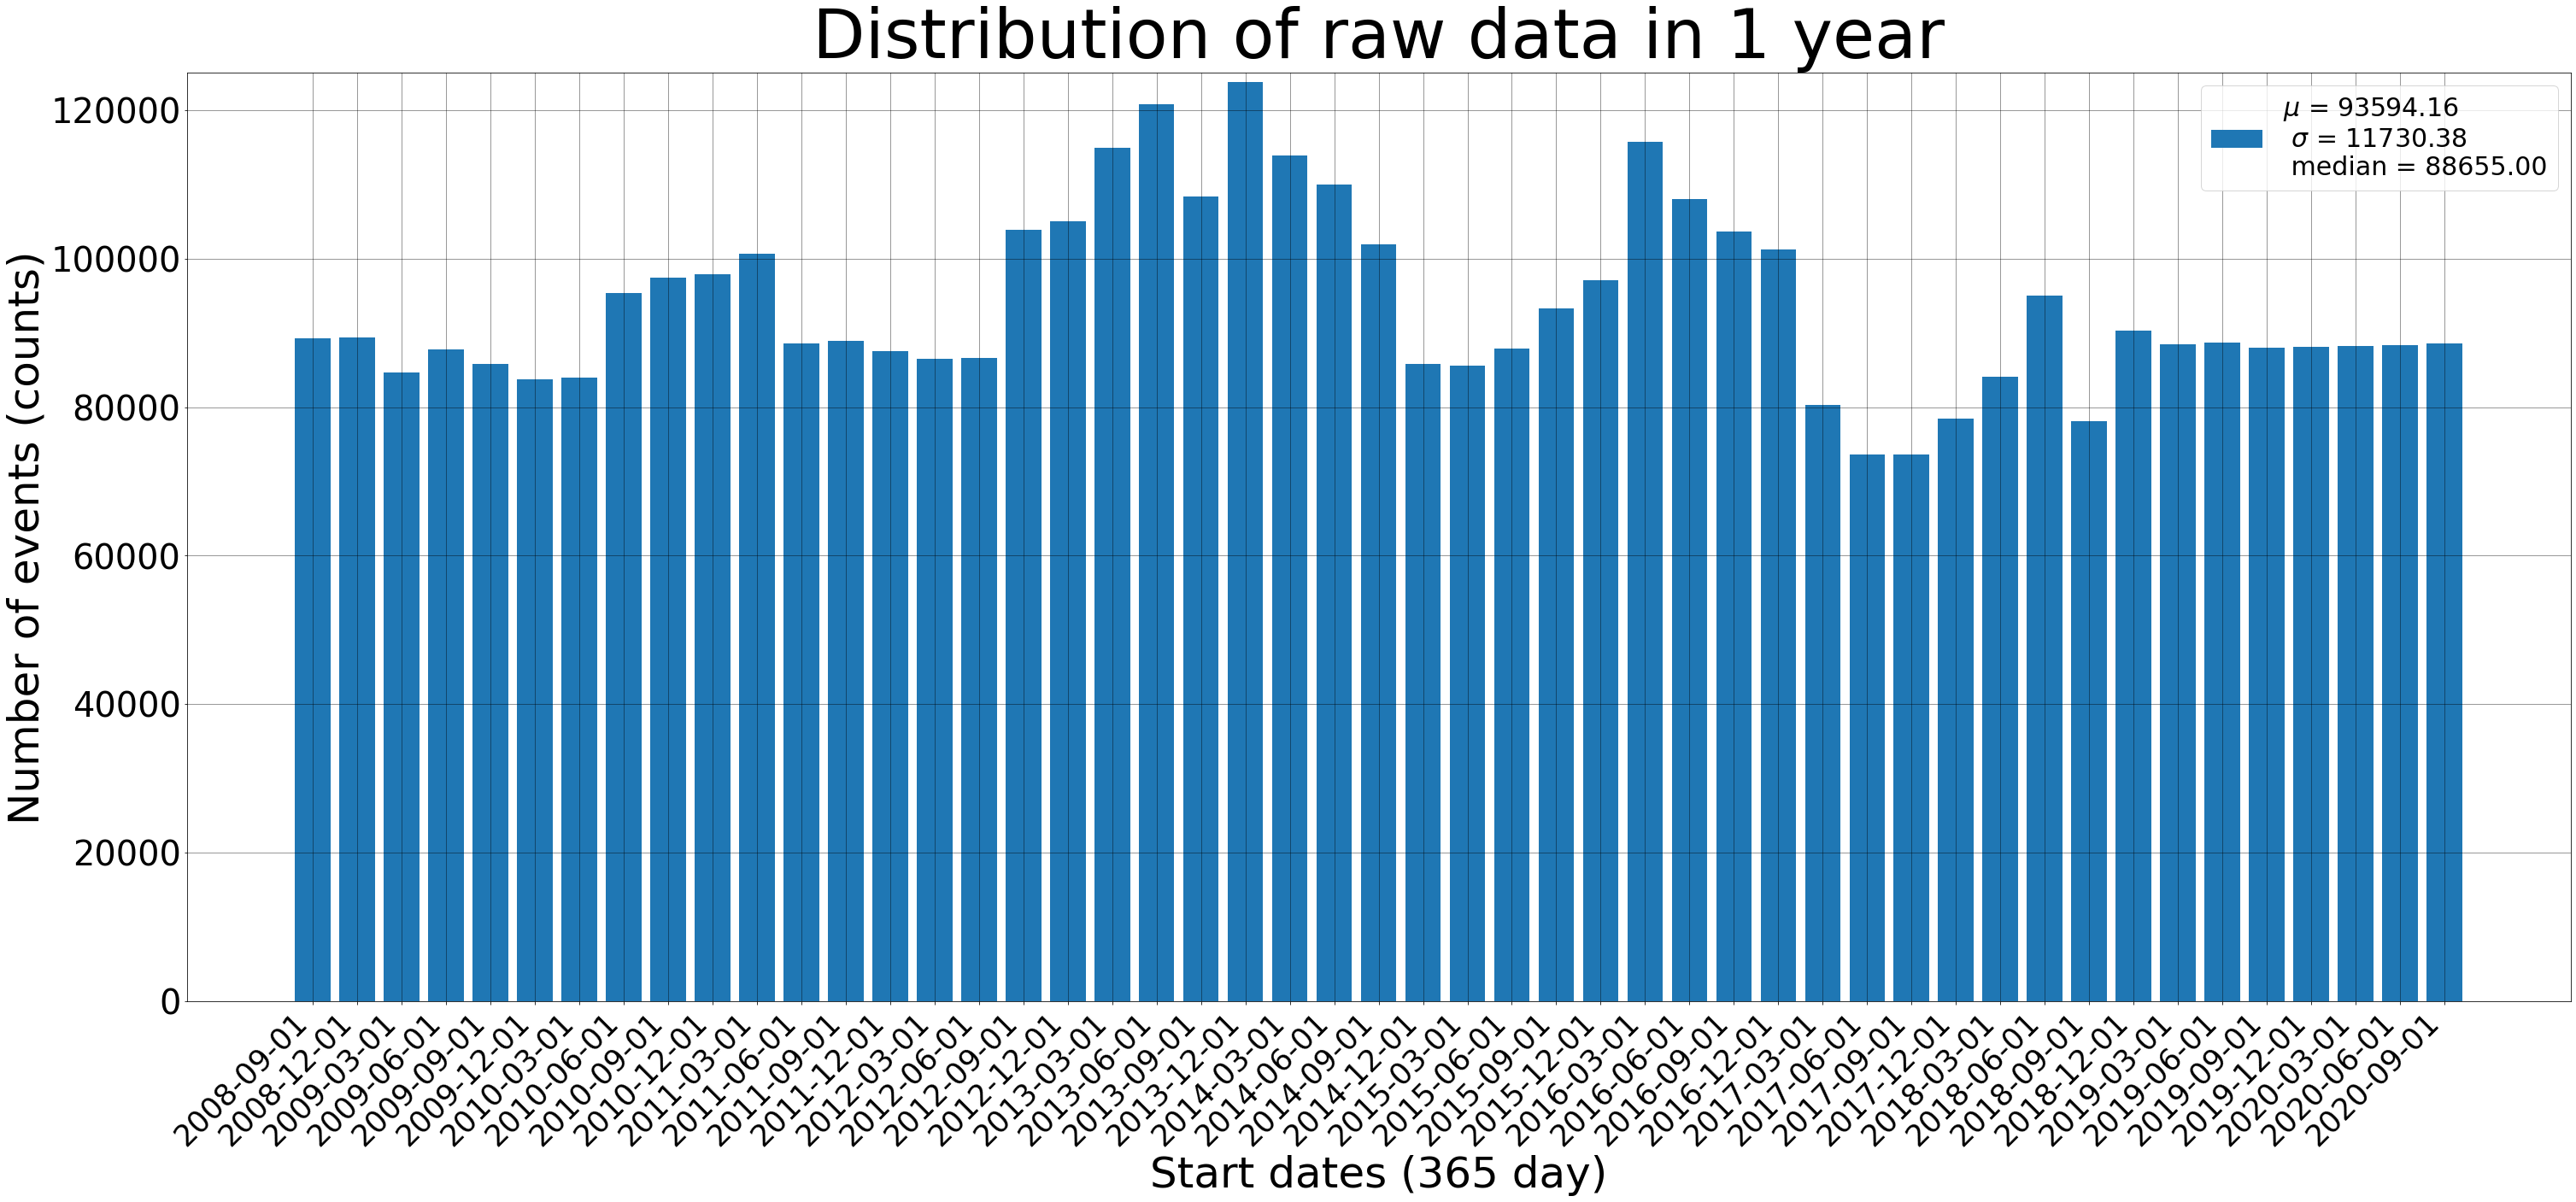

In [32]:
#making raw data's bar plot
fig, ax = plt.subplots(figsize=(50,20))
ax.bar(start, N_rawdata,width = 0.8) 

ax.set_xlabel("Start dates (365 day)",fontsize=50)
ax.set_ylabel("Number of events (counts)",fontsize=50)
ax.legend(["$\mu$ = %.2f\n $\sigma$ = %.2f\n median = %.2f" % (mean, std,median)], loc='upper right',fontsize=30)
#ax.legend([ %std],fontsize=40)
#ax.legend([ %(median)],fontsize=40)
ax.grid(alpha=1.5, c='black')
ax.set_ylim(0,125000)
ax.set_xticklabels(start,rotation=45,ha='right')
ax.tick_params(axis="x", labelsize=35)
ax.tick_params(axis="y", labelsize=40)
ax.set_title('Distribution of raw data in 1 year',fontsize = 80)

Text(0.5, 1.0, 'Distribution of filtered data in 1 year')

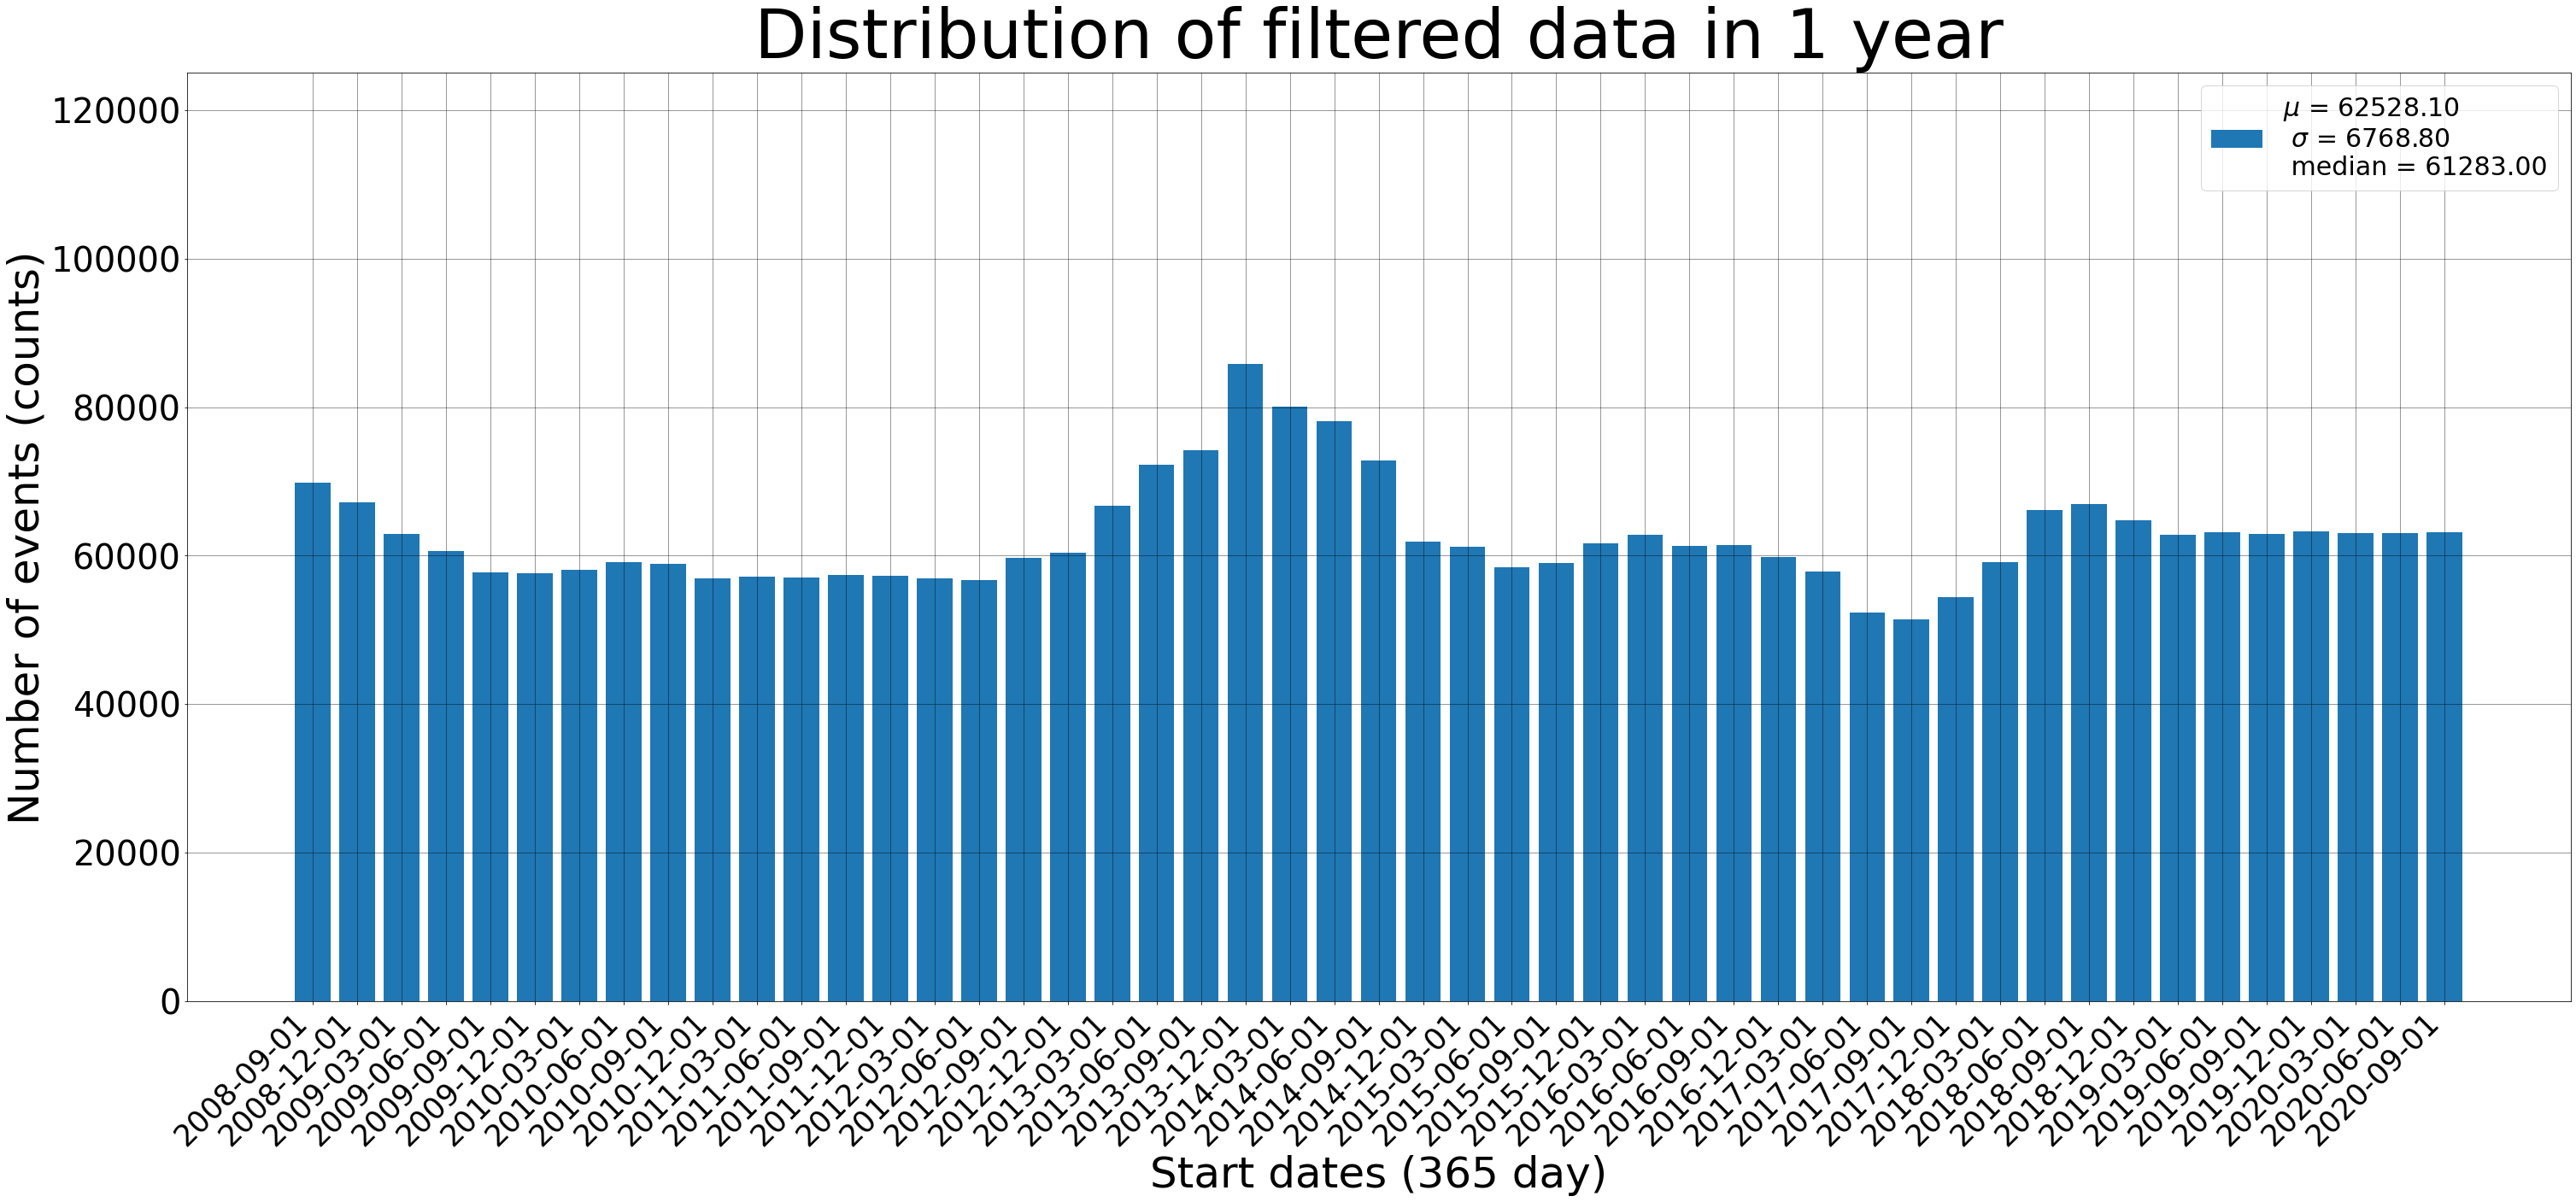

In [33]:
#making filtered data's bar plot
#statistics
#making raw data's bar plot

fig, ax = plt.subplots(figsize=(50,20))
ax.bar(start, N_filtereddata,width = 0.8) 

ax.set_xlabel("Start dates (365 day)",fontsize=50)
ax.set_ylabel("Number of events (counts)",fontsize=50)
ax.legend(["$\mu$ = %.2f\n $\sigma$ = %.2f\n median = %.2f" % (mean1, std1,median1)], loc='upper right',fontsize=30)
#ax.legend([ %std],fontsize=40)
#ax.legend([ %(median)],fontsize=40)
ax.grid(alpha=1.5, c='black')
ax.set_ylim(0,125000)
ax.set_xticklabels(start,rotation=45,ha='right')
ax.tick_params(axis="x", labelsize=35)
ax.tick_params(axis="y", labelsize=40)
ax.set_title('Distribution of filtered data in 1 year',fontsize = 80)

In [43]:
N_rawdata

[89269,
 89400,
 84621,
 87718,
 85807,
 83733,
 83959,
 95323,
 97437,
 97891,
 100602,
 88511,
 88896,
 87558,
 86485,
 86606,
 103906,
 105055,
 114947,
 120727,
 108326,
 123702,
 113825,
 110010,
 101941,
 85765,
 85522,
 87865,
 93242,
 97095,
 115741,
 107976,
 103602,
 101218,
 80258,
 73619,
 73606,
 78461,
 84136,
 94992,
 78062,
 90306,
 88443,
 88655,
 87993,
 88079,
 88272,
 88339,
 88612]

Text(0.5, 1.0, 'Frequency histogram of raw data collection')

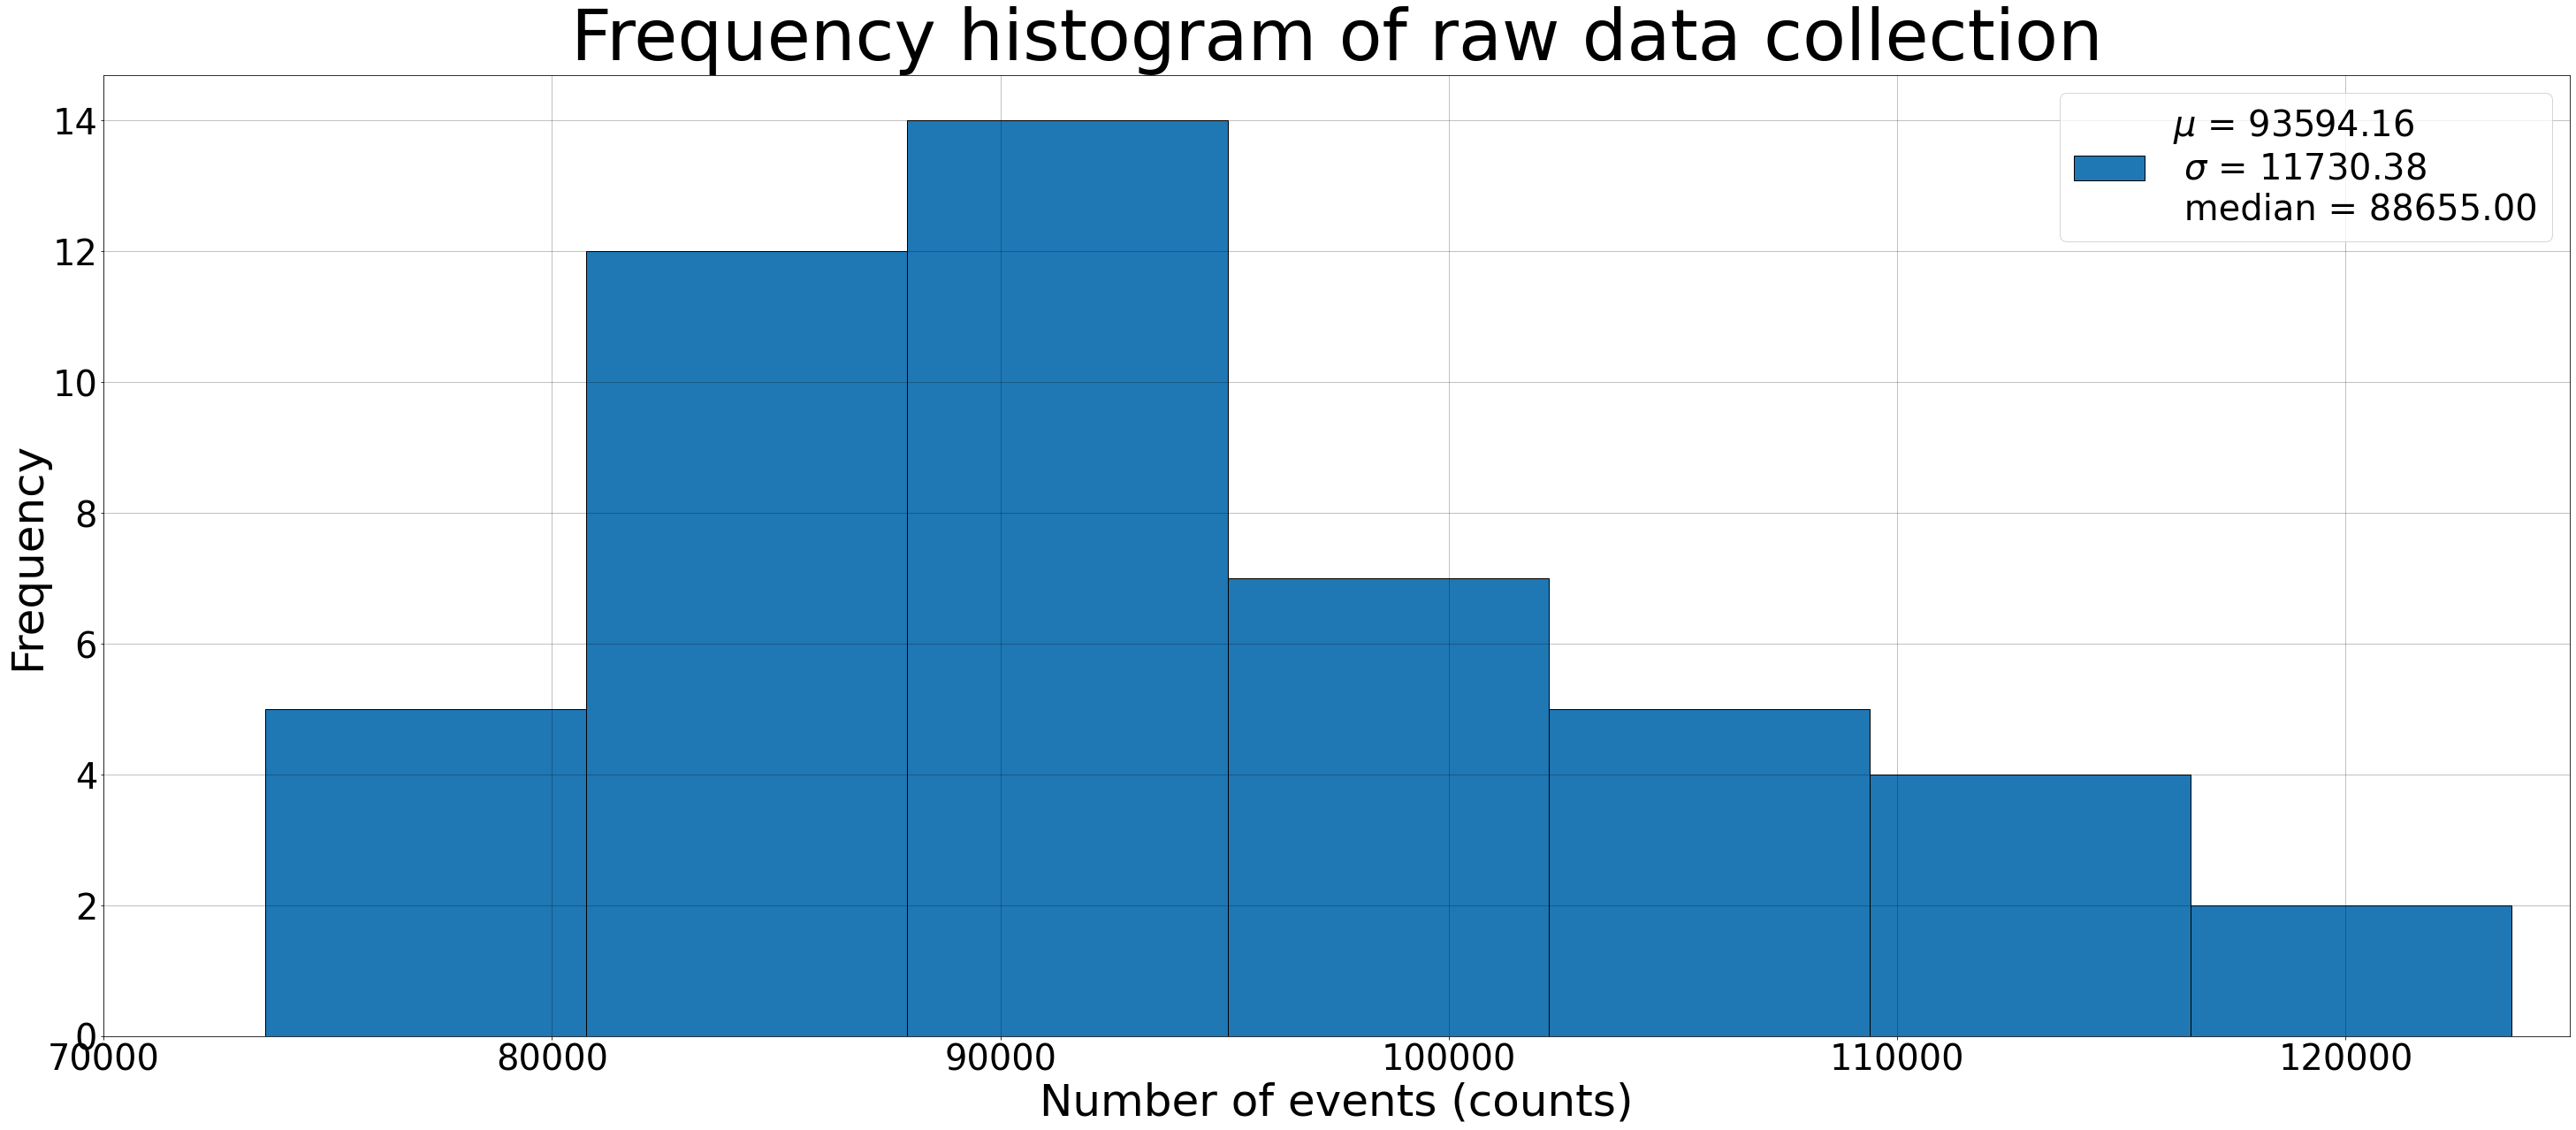

In [44]:
from scipy.stats import norm

mean,std=norm.fit(N_rawdata)

fig, ax = plt.subplots(figsize=(50,20))
ax.hist(N_rawdata,bins=7,label="$\mu$ = %0.2f\n $\sigma$ = %0.2f\n median = %0.2f" % (mean, std,median),edgecolor='black')
ax.set_xlabel("Number of events (counts)",fontsize=50)
ax.set_ylabel("Frequency",fontsize=50)
#ax.set_ylim(0,475)
#ax.legend(['mean = 176.39, standard deviation = 42.84, median = 160.0'], loc='upper right',fontsize=30)
#ax.legend([ %std],fontsize=40)
#ax.legend([ %(median)],fontsize=40)
ax.grid(alpha=0.3, c='black')
ax.legend(loc='upper right',fontsize=40)
#ax.set_ylim(0,6.5)
ax.set_xlim(70000,125000)
ax.tick_params(axis="x", labelsize=40)
ax.tick_params(axis="y", labelsize=40)
ax.set_title('Frequency histogram of raw data collection',fontsize = 80)

Check normalized to 1 1.0


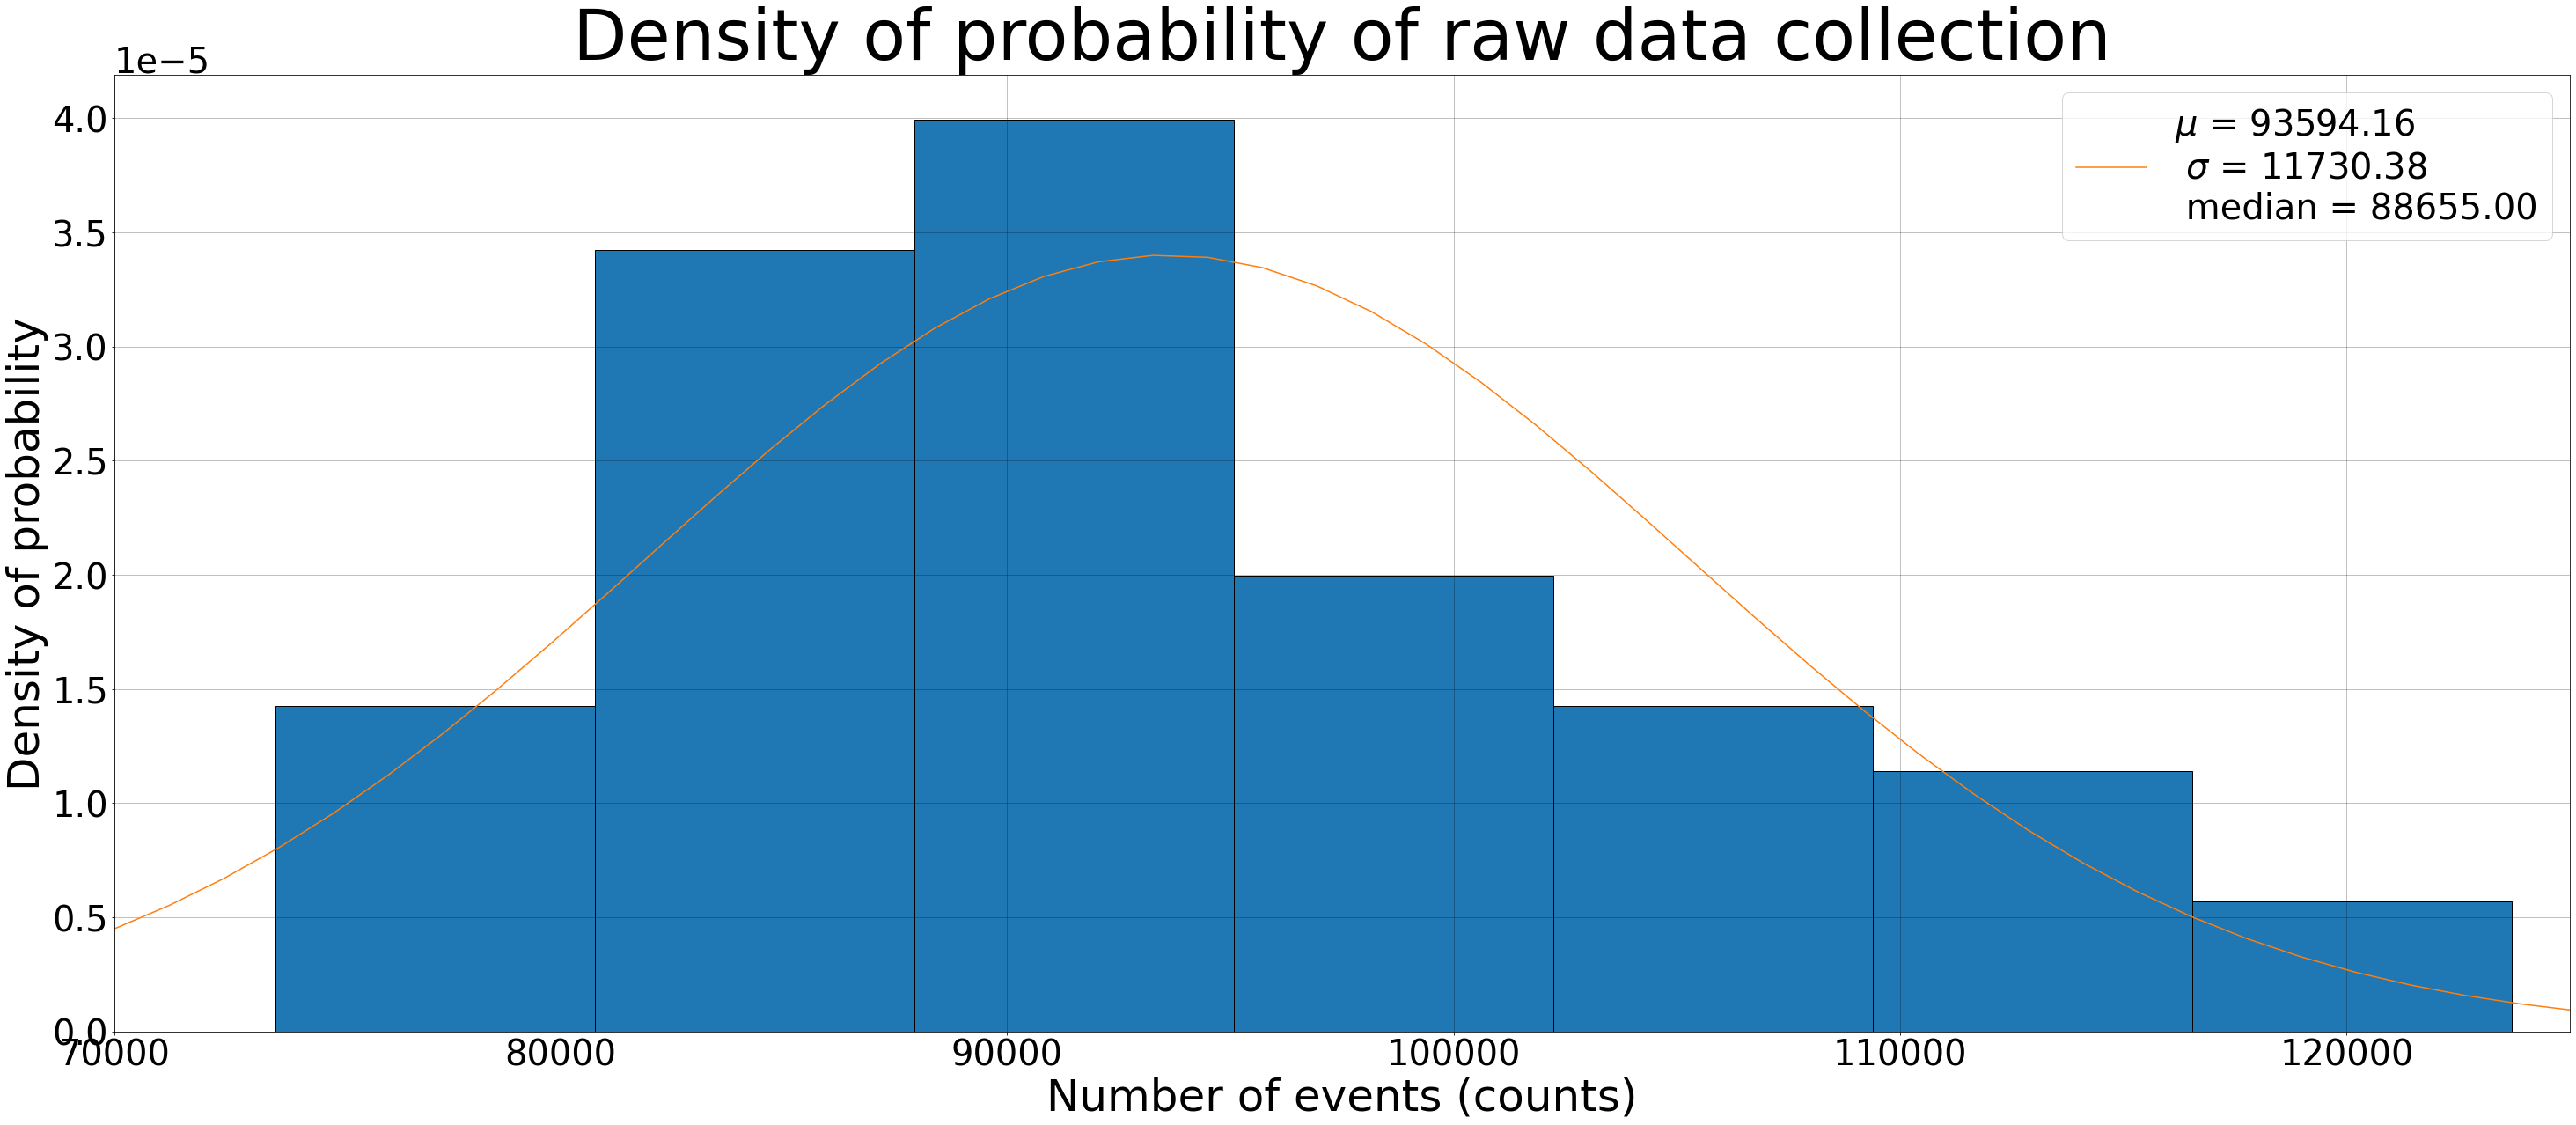

In [35]:
from scipy.stats import norm

mean,std=norm.fit(N_rawdata)

x = np.linspace(70000,130000)
y = norm.pdf(x, mean, std)

fig, ax = plt.subplots(figsize=(50,20))
pdf, bins, patches = ax.hist(N_rawdata,bins=7,density=True,edgecolor='black')
ax.plot(x, y,label="$\mu$ = %s\n $\sigma$ = %s\n median = %0.2f" % (np.around(mean,2), np.around(std,2),median))
ax.set_xlabel("Number of events (counts)",fontsize=50)
ax.set_ylabel("Density of probability",fontsize=50)
#ax.set_ylim(0,475)
#ax.legend(['mean = 176.39, standard deviation = 42.84, median = 160.0'], loc='upper right',fontsize=30)
#ax.legend([ %std],fontsize=40)
#ax.legend([ %(median)],fontsize=40)
ax.grid(alpha=0.3, c='black')
ax.legend(loc='upper right',fontsize=40)
#ax.set_ylim(0,0.05)
ax.set_xlim(70000,125000)
ax.tick_params(axis="x", labelsize=40)
ax.tick_params(axis="y", labelsize=40)
ax.yaxis.offsetText.set_fontsize(40)
ax.set_title('Density of probability of raw data collection',fontsize = 80)
print('Check normalized to 1', np.sum(pdf * np.diff(bins)))

Text(0.5, 1.0, 'Frequency histogram of filtered data collection')

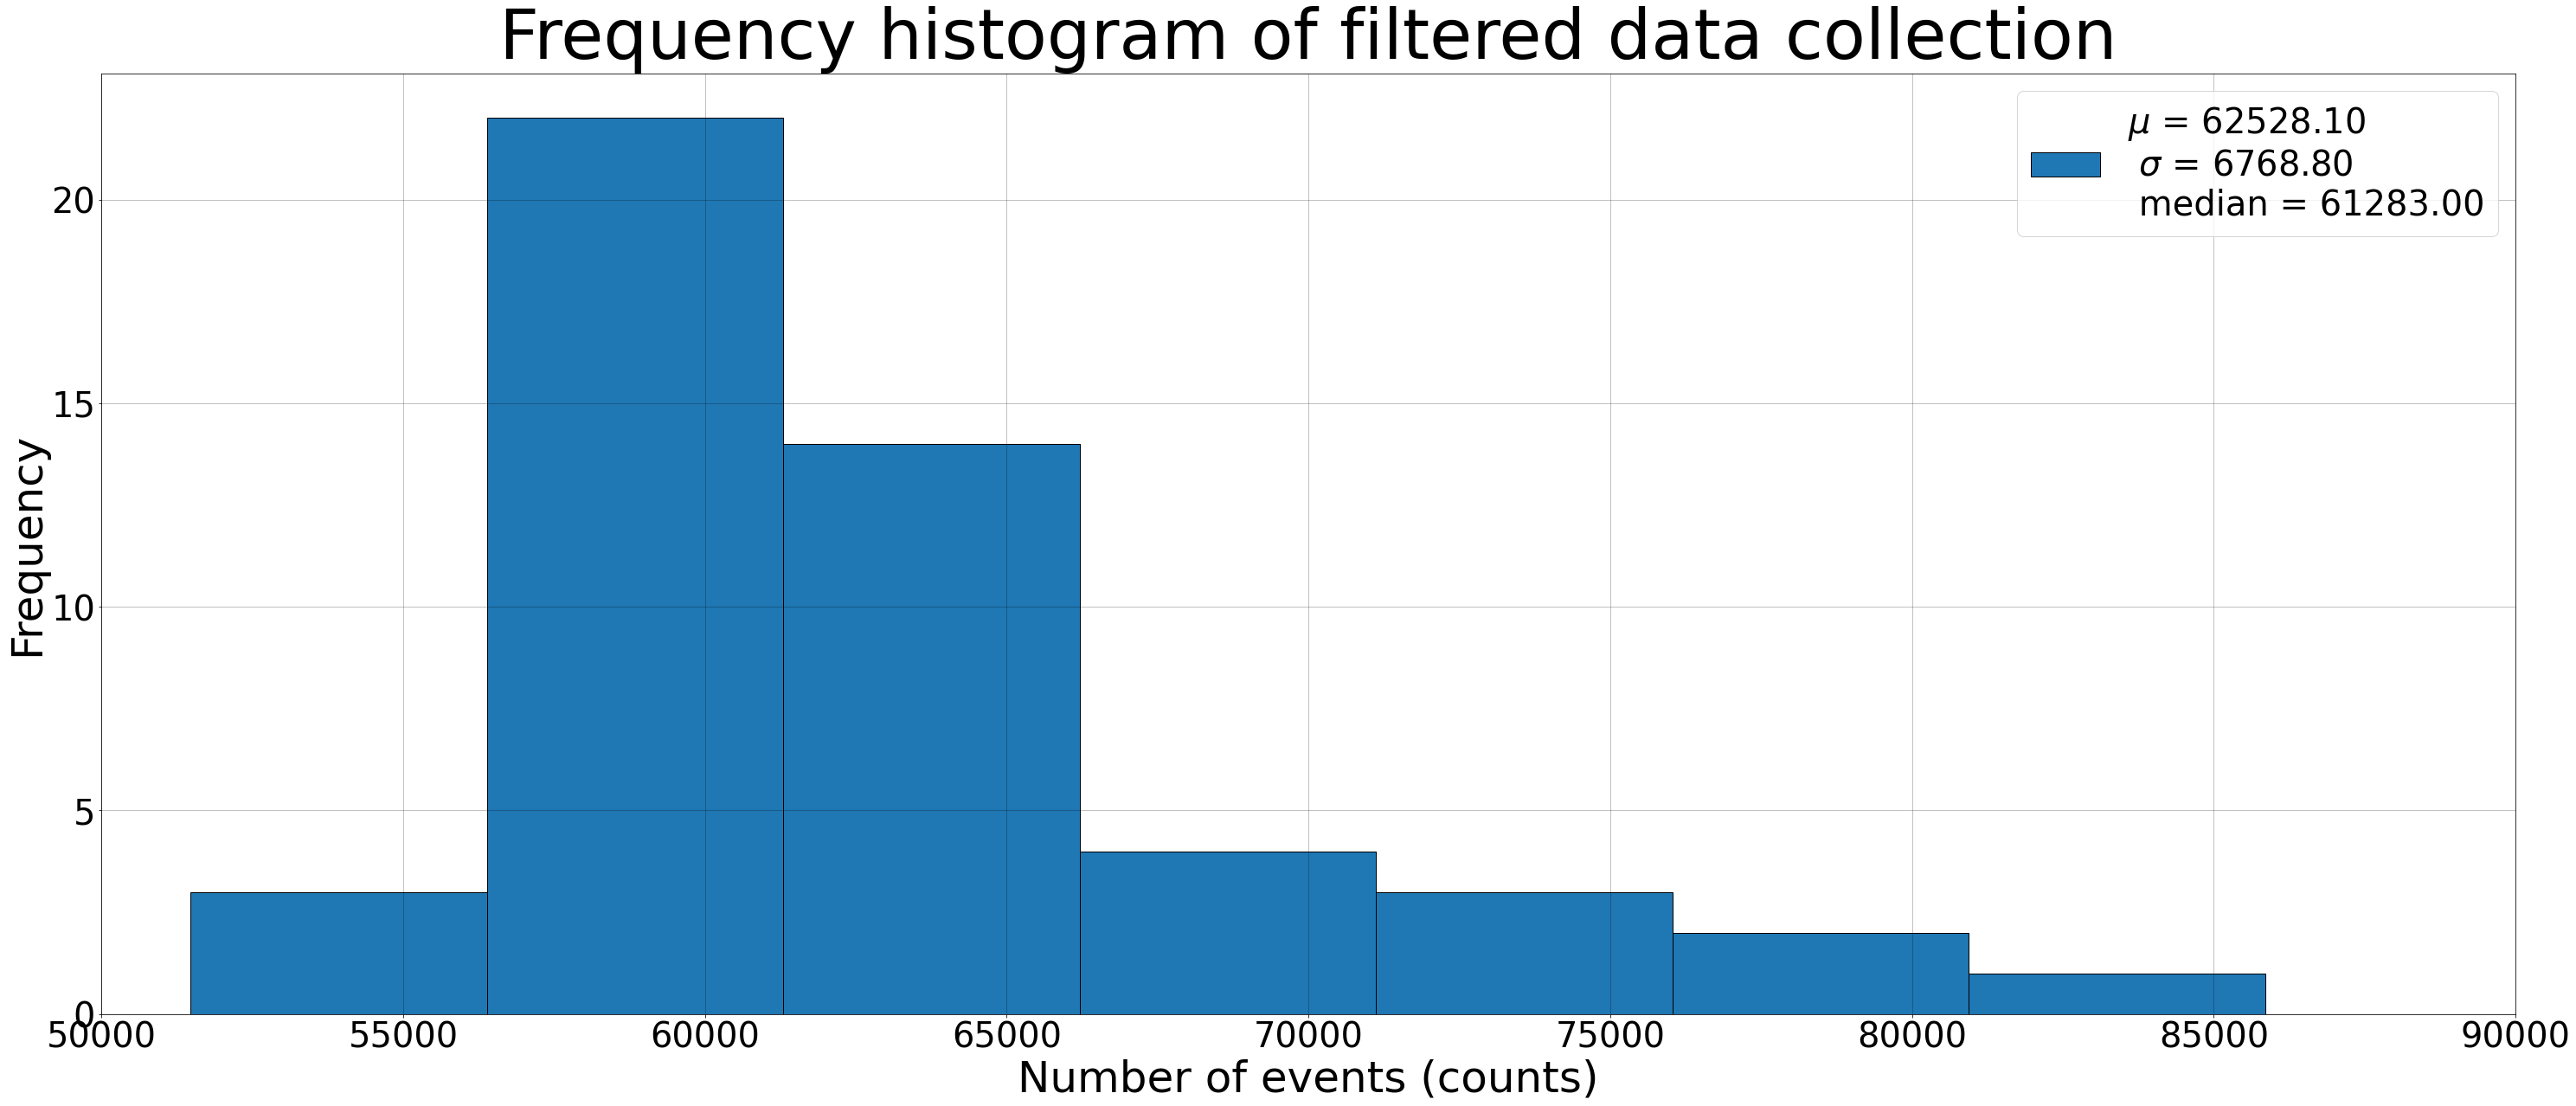

In [36]:
from scipy.stats import norm

mean,std=norm.fit(N_filtereddata)

fig, ax = plt.subplots(figsize=(50,20))
ax.hist(N_filtereddata,bins=7,label="$\mu$ = %0.2f\n $\sigma$ = %0.2f\n median = %0.2f" % (mean1, std1,median1),edgecolor='black')
ax.set_xlabel("Number of events (counts)",fontsize=50)
ax.set_ylabel("Frequency",fontsize=50)
#ax.set_ylim(0,475)
#ax.legend(['mean = 176.39, standard deviation = 42.84, median = 160.0'], loc='upper right',fontsize=30)
#ax.legend([ %std],fontsize=40)
#ax.legend([ %(median)],fontsize=40)
ax.grid(alpha=0.3, c='black')
ax.legend(loc='upper right',fontsize=40)
#ax.set_ylim(0,6.5)
ax.set_xlim(50000,90000)
ax.tick_params(axis="x", labelsize=40)
ax.tick_params(axis="y", labelsize=40)
ax.set_title('Frequency histogram of filtered data collection',fontsize = 80)

Check normalized to 1 1.0


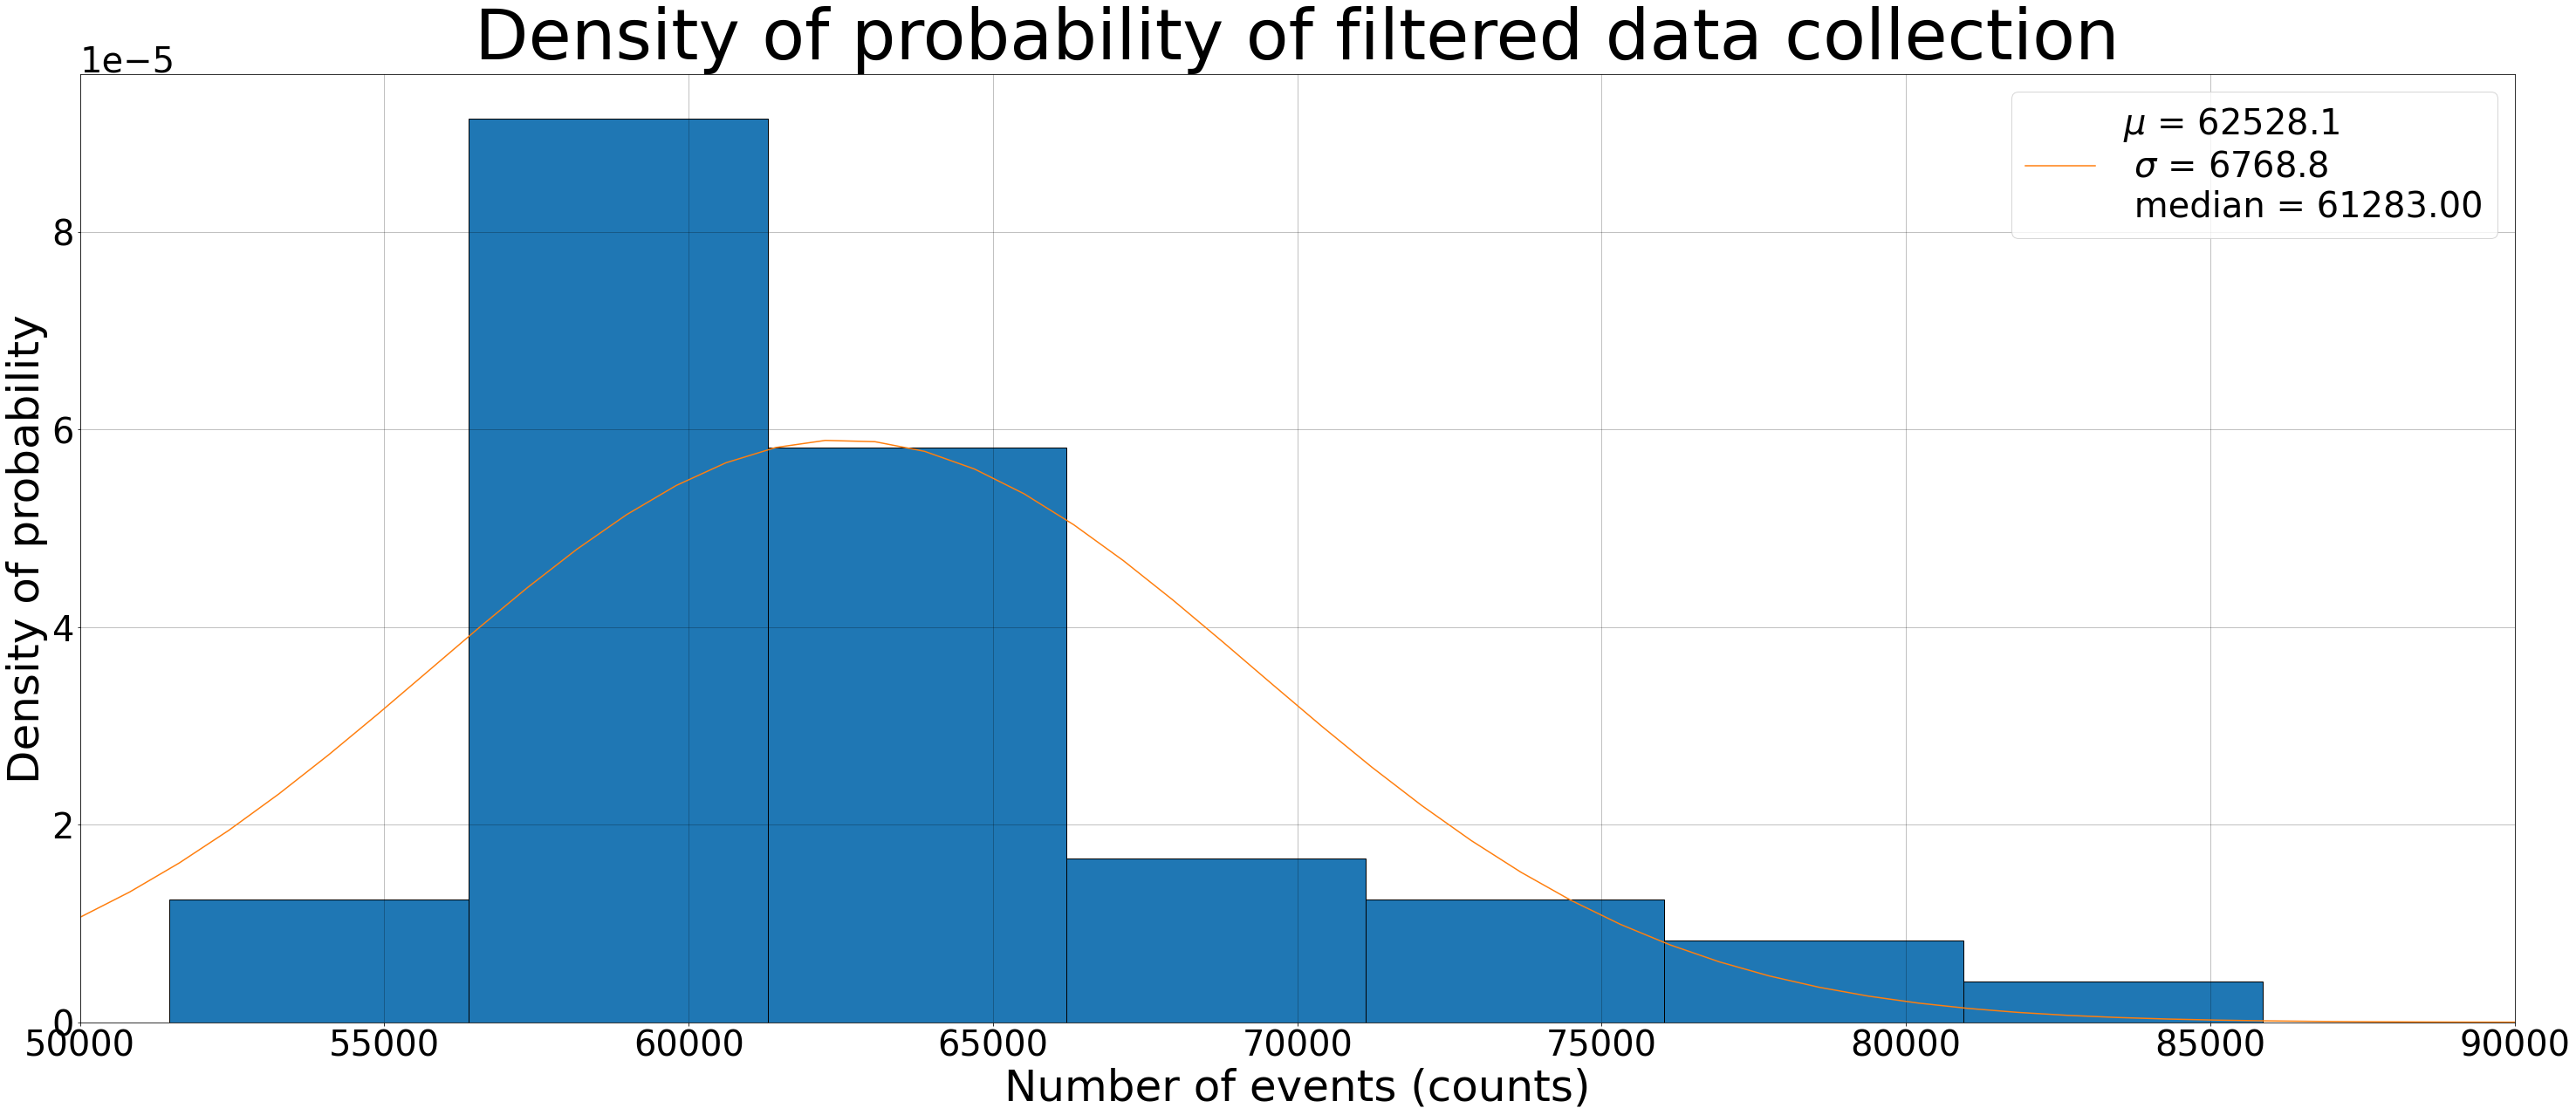

In [37]:


mean,std=norm.fit(N_filtereddata)

x = np.linspace(50000,90000)
y = norm.pdf(x, mean1, std1)

fig, ax = plt.subplots(figsize=(50,20))
pdf, bins, patches = ax.hist(N_filtereddata,bins=7,density=True,edgecolor='black')
ax.plot(x, y,label="$\mu$ = %s\n $\sigma$ = %s\n median = %0.2f" % (np.around(mean1,2), np.around(std1,2),median1))
ax.set_xlabel("Number of events (counts)",fontsize=50)
ax.set_ylabel("Density of probability",fontsize=50)
#ax.set_ylim(0,475)
#ax.legend(['mean = 176.39, standard deviation = 42.84, median = 160.0'], loc='upper right',fontsize=30)
#ax.legend([ %std],fontsize=40)
#ax.legend([ %(median)],fontsize=40)
ax.grid(alpha=0.3, c='black')
ax.legend(loc='upper right',fontsize=40)
#ax.set_ylim(0,0.05)
ax.set_xlim(50000,90000)
ax.tick_params(axis="x", labelsize=40)
ax.tick_params(axis="y", labelsize=40)
ax.yaxis.offsetText.set_fontsize(40)
ax.set_title('Density of probability of filtered data collection',fontsize = 80)
print('Check normalized to 1', np.sum(pdf * np.diff(bins)))

In [38]:
x = np.linspace(100,350)
print(x)

[100.         105.10204082 110.20408163 115.30612245 120.40816327
 125.51020408 130.6122449  135.71428571 140.81632653 145.91836735
 151.02040816 156.12244898 161.2244898  166.32653061 171.42857143
 176.53061224 181.63265306 186.73469388 191.83673469 196.93877551
 202.04081633 207.14285714 212.24489796 217.34693878 222.44897959
 227.55102041 232.65306122 237.75510204 242.85714286 247.95918367
 253.06122449 258.16326531 263.26530612 268.36734694 273.46938776
 278.57142857 283.67346939 288.7755102  293.87755102 298.97959184
 304.08163265 309.18367347 314.28571429 319.3877551  324.48979592
 329.59183673 334.69387755 339.79591837 344.89795918 350.        ]


In [39]:
#Calculate bin
print(np.sum(N_rawdata))
print(np.sum(N_filtereddata))
print('bin size of raw data = ',1 + 3.322*np.log10(np.sum(N_rawdata)))
print('bin size of filtered data = ',1 + 3.322*np.log10(np.sum(N_filtereddata)))

4586114
3063877
bin size of raw data =  23.129319778633736
bin size of filtered data =  22.54739334651772


/opt/anaconda/envs/fermi/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  import sys
/opt/anaconda/envs/fermi/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/opt/anaconda/envs/fermi/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


IndexError: list index out of range

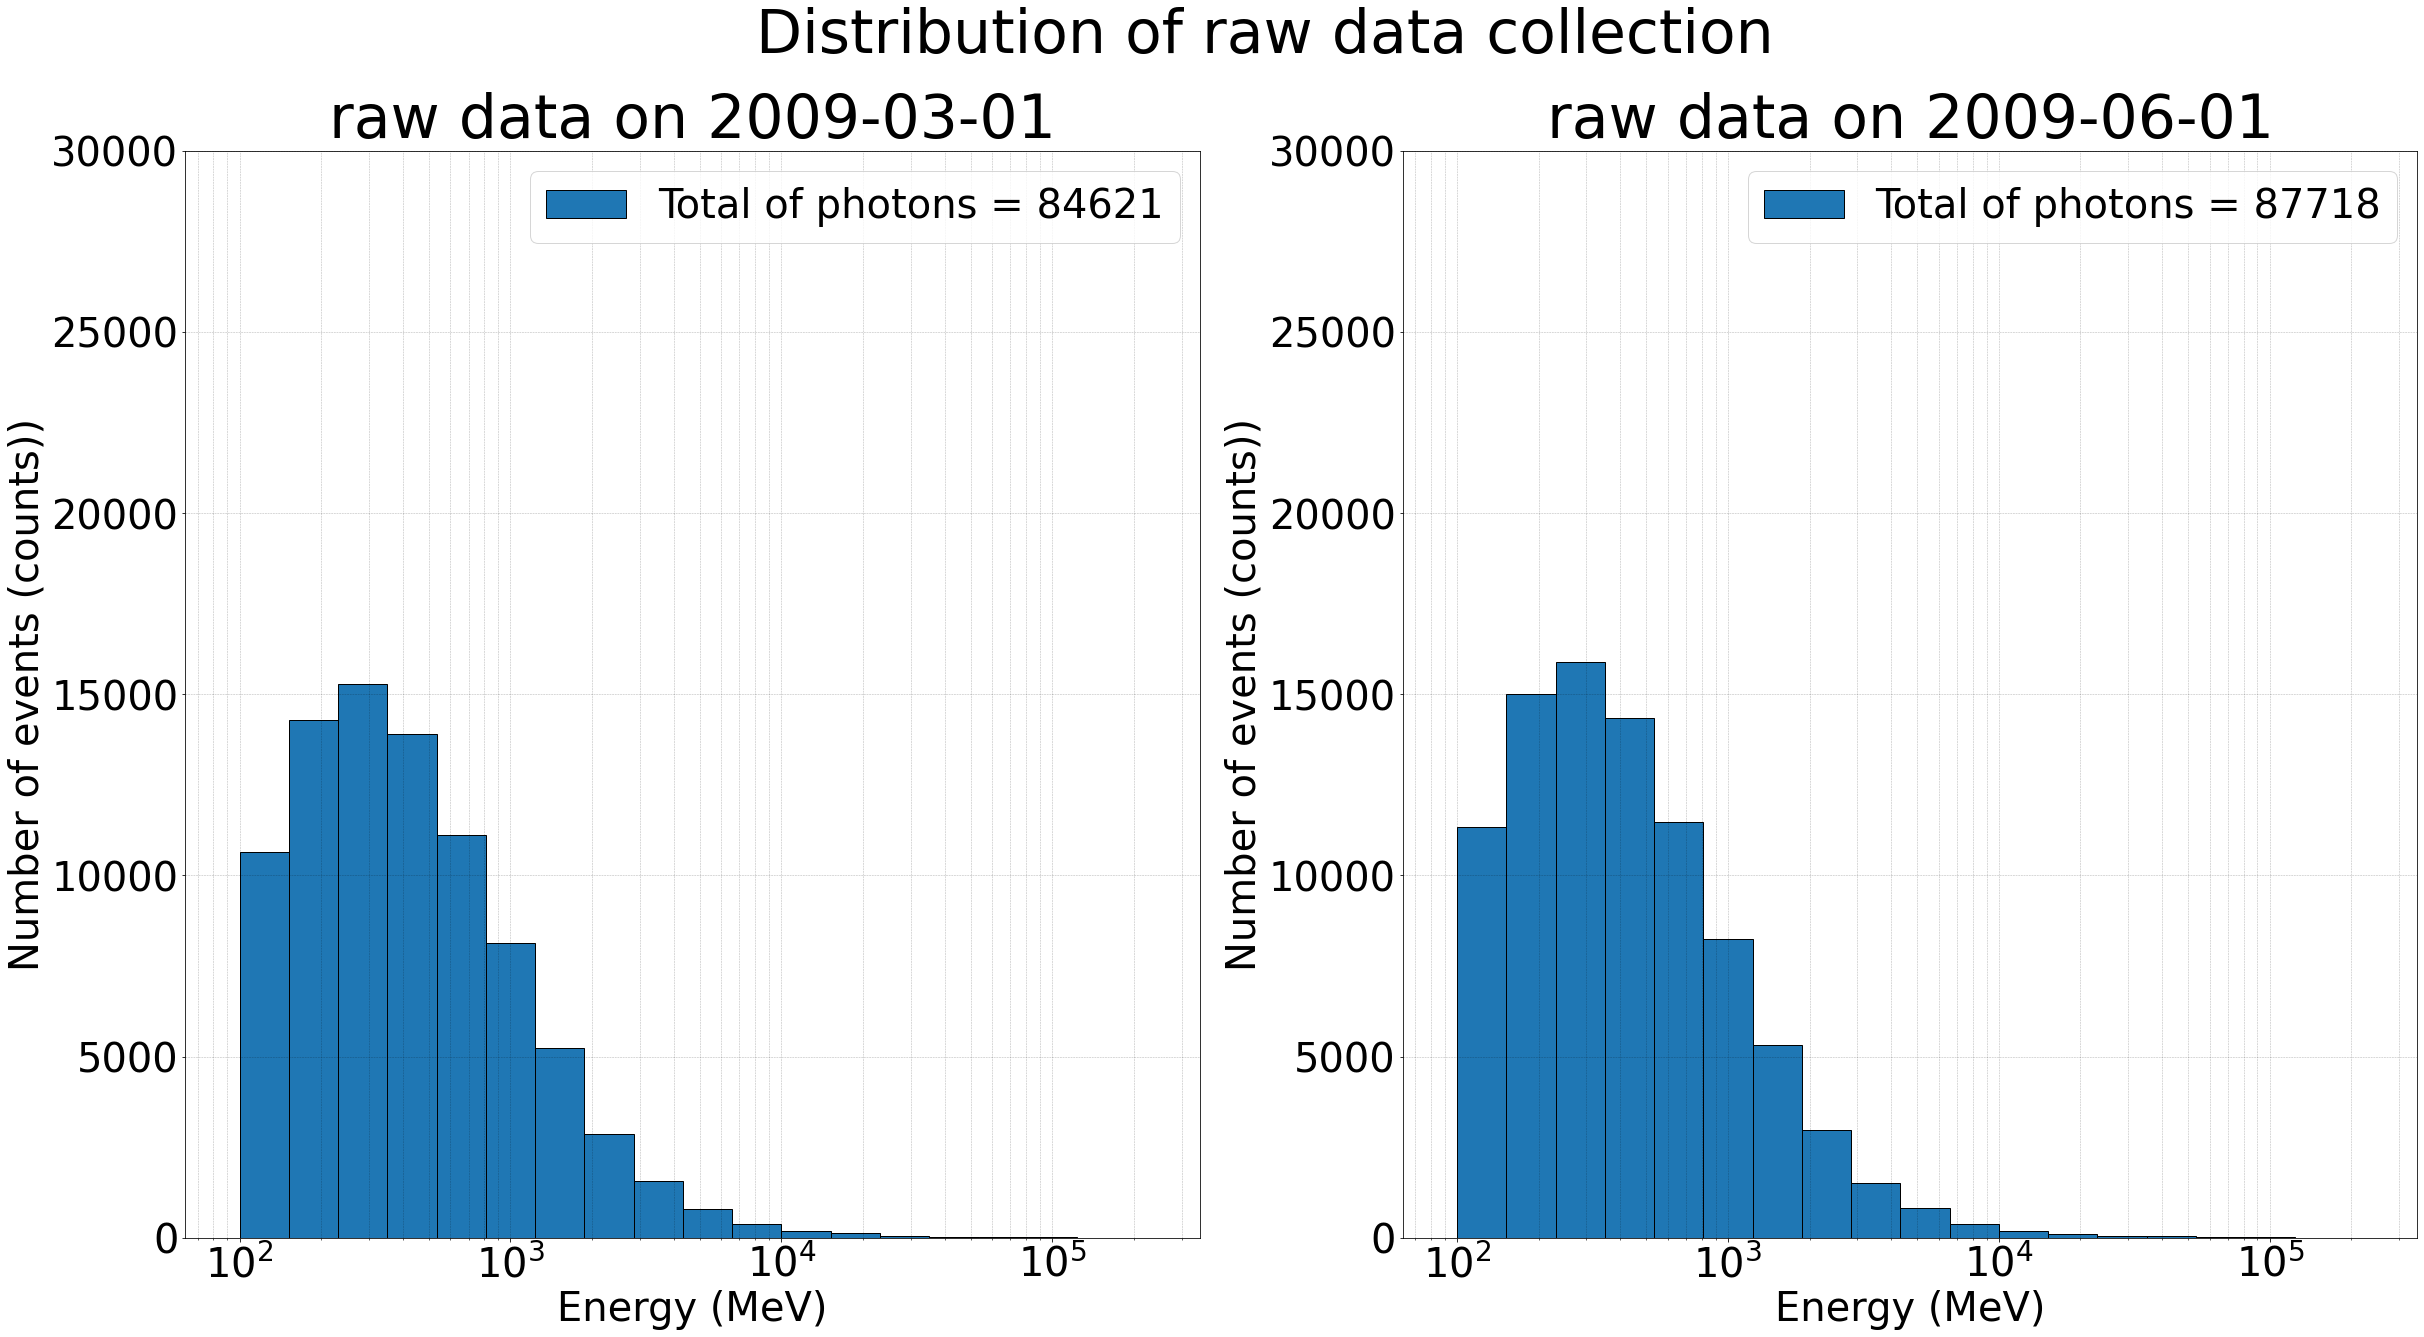

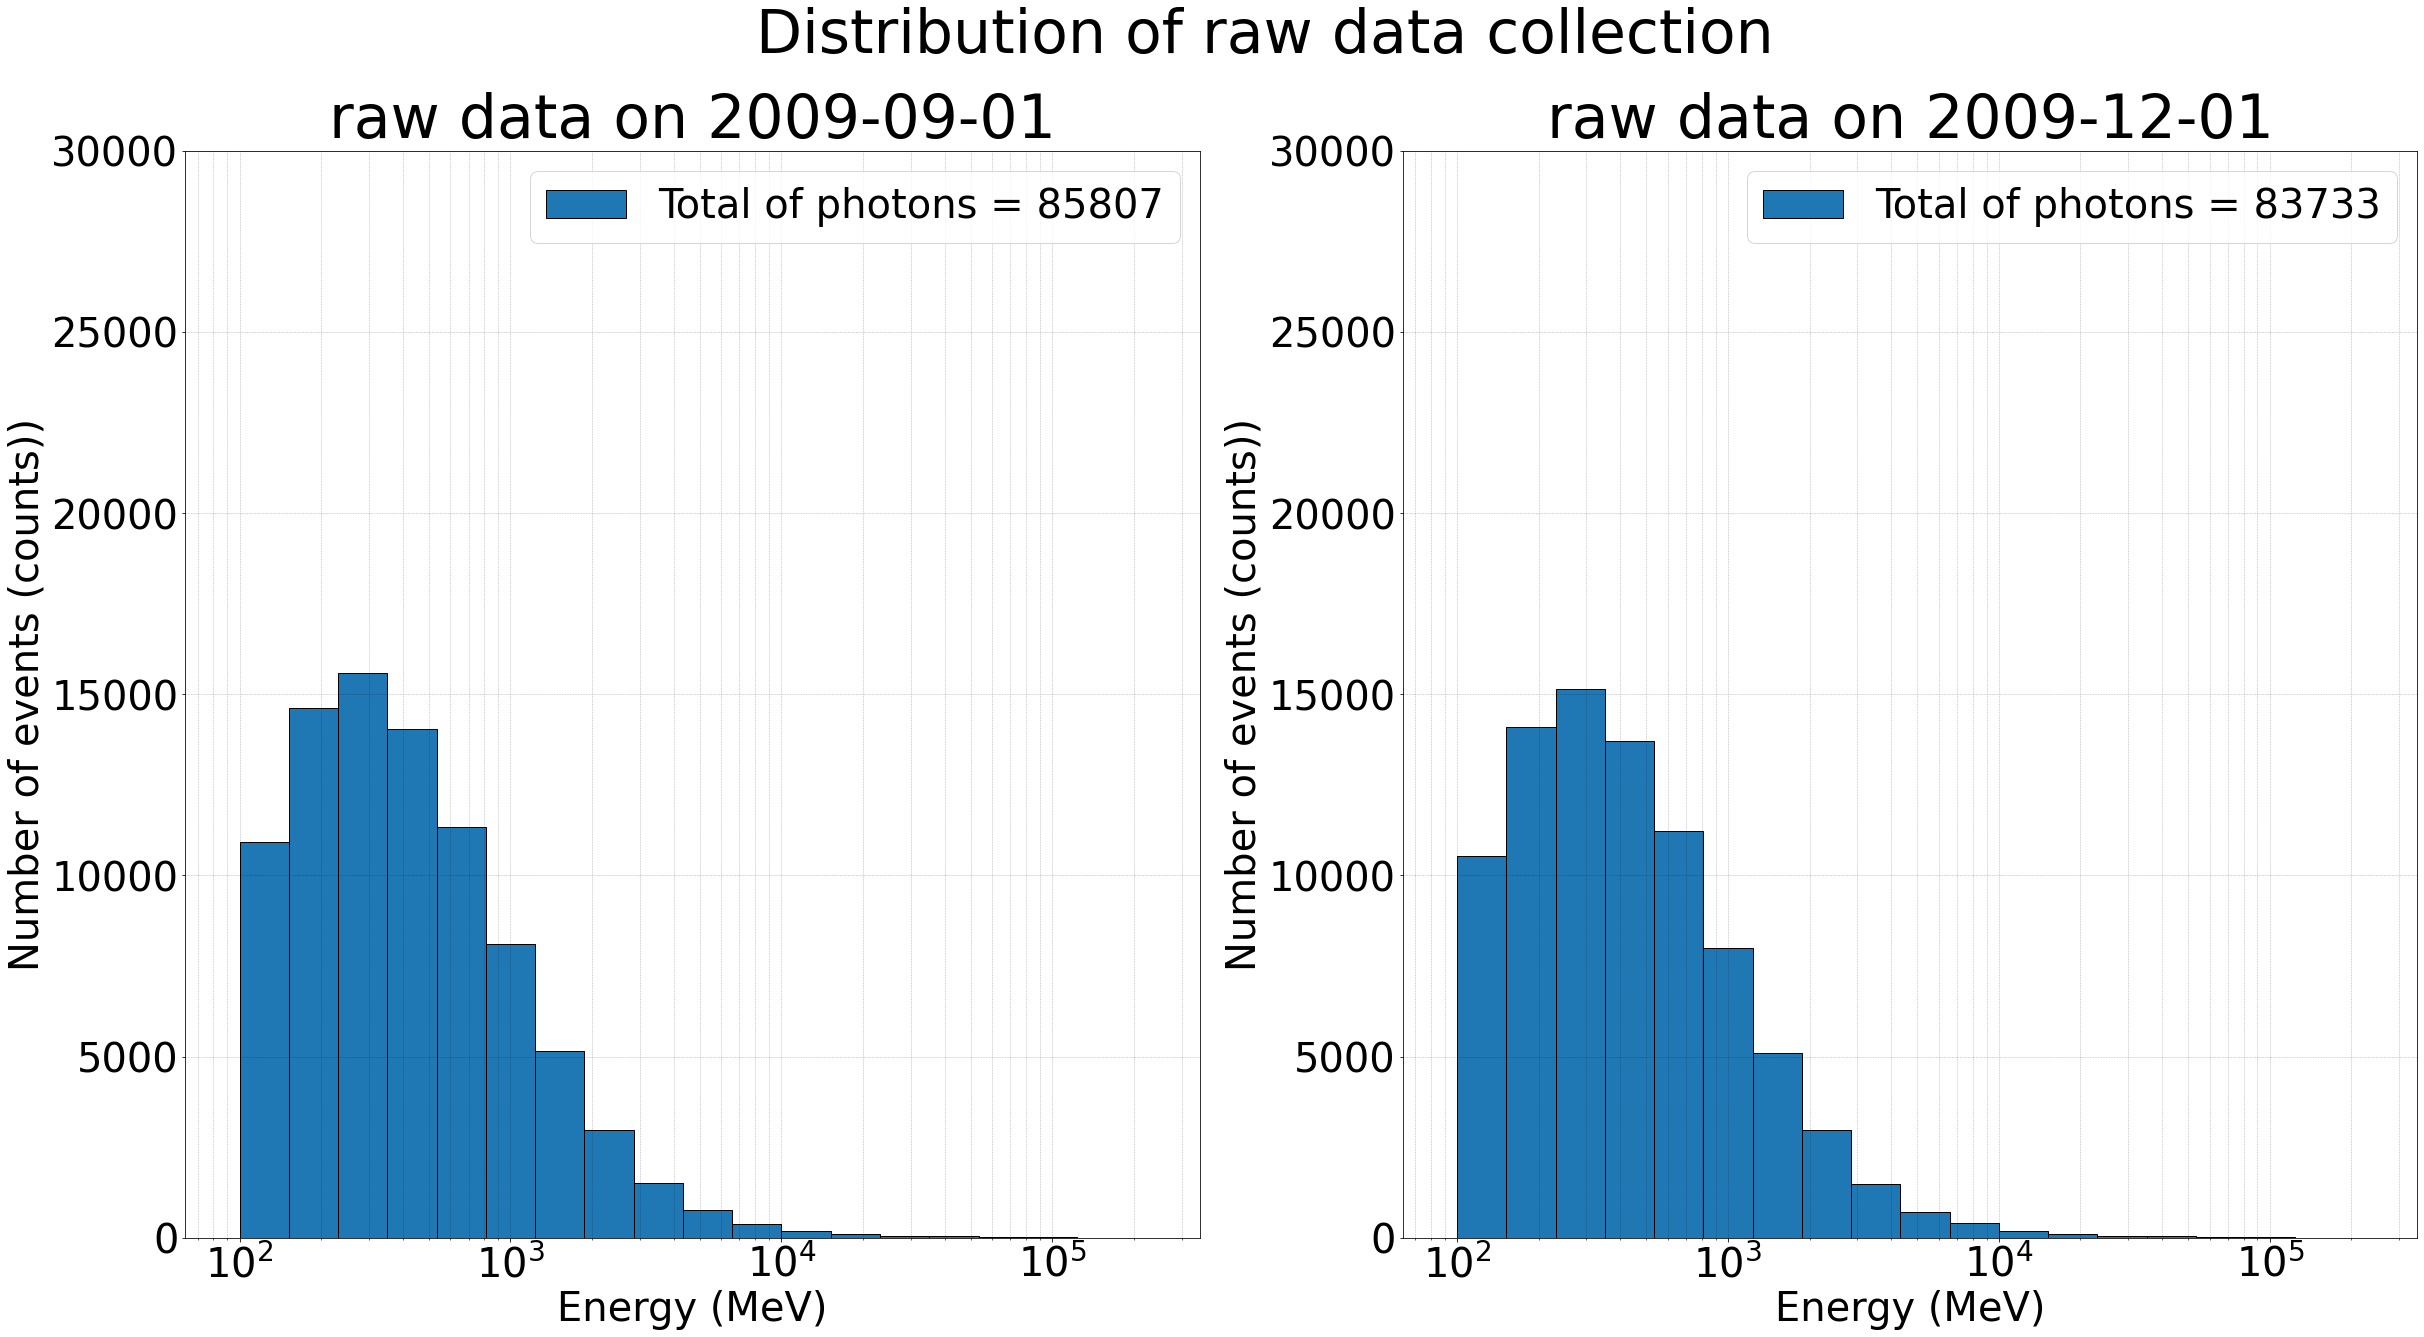

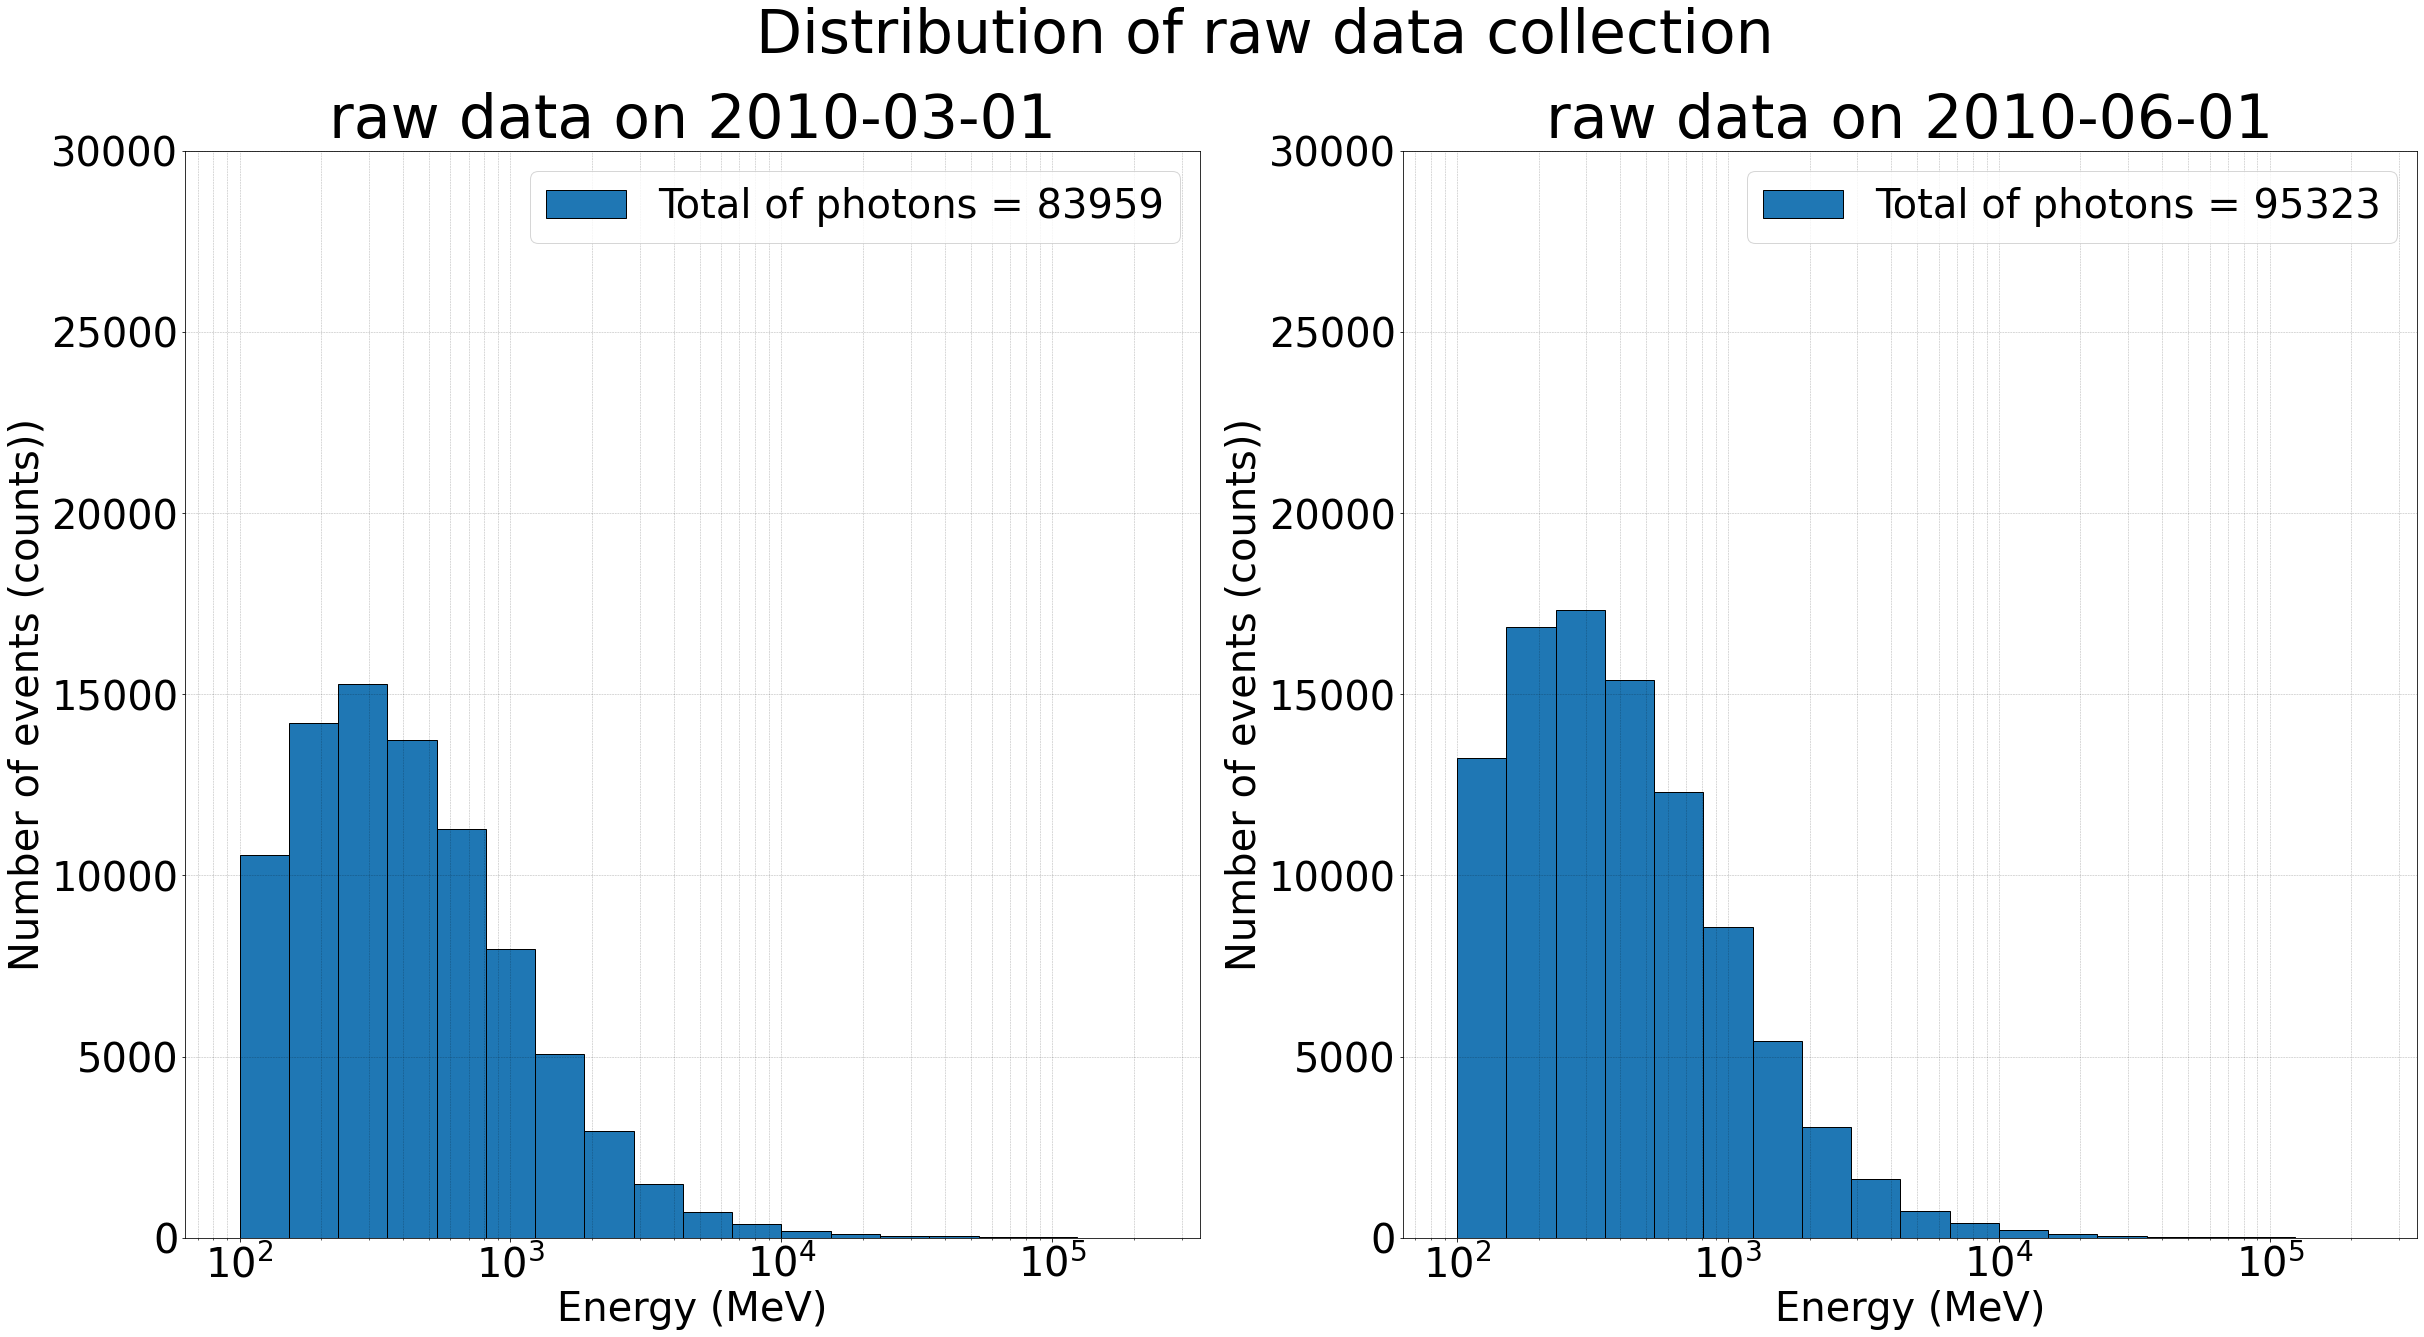

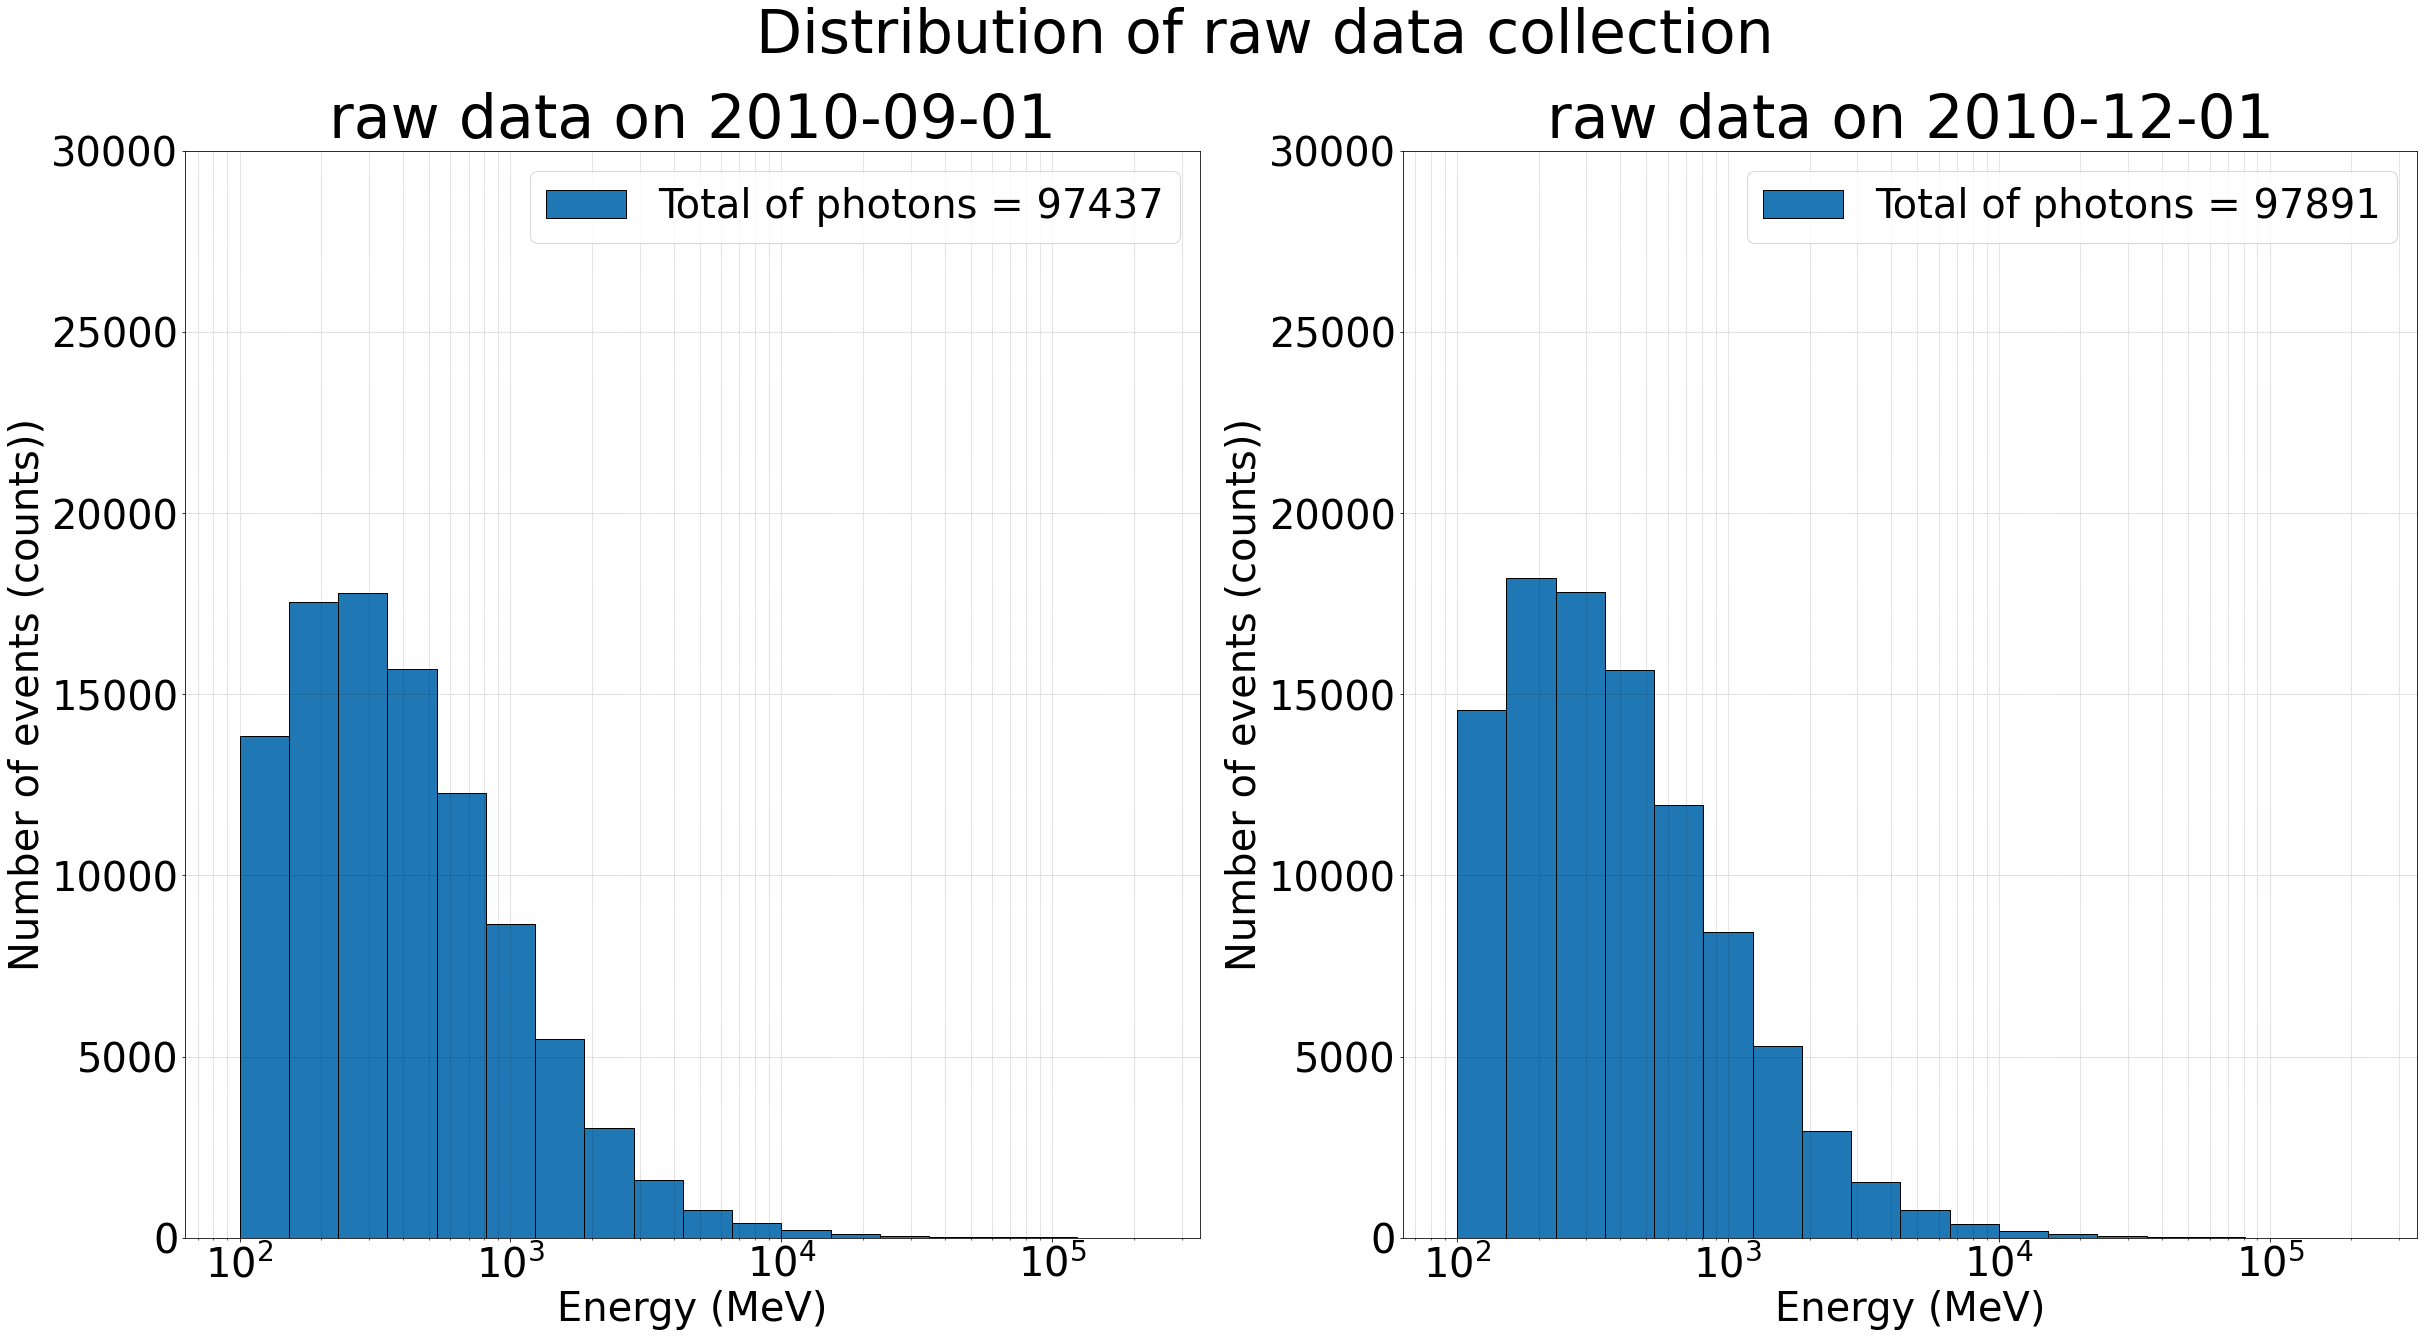

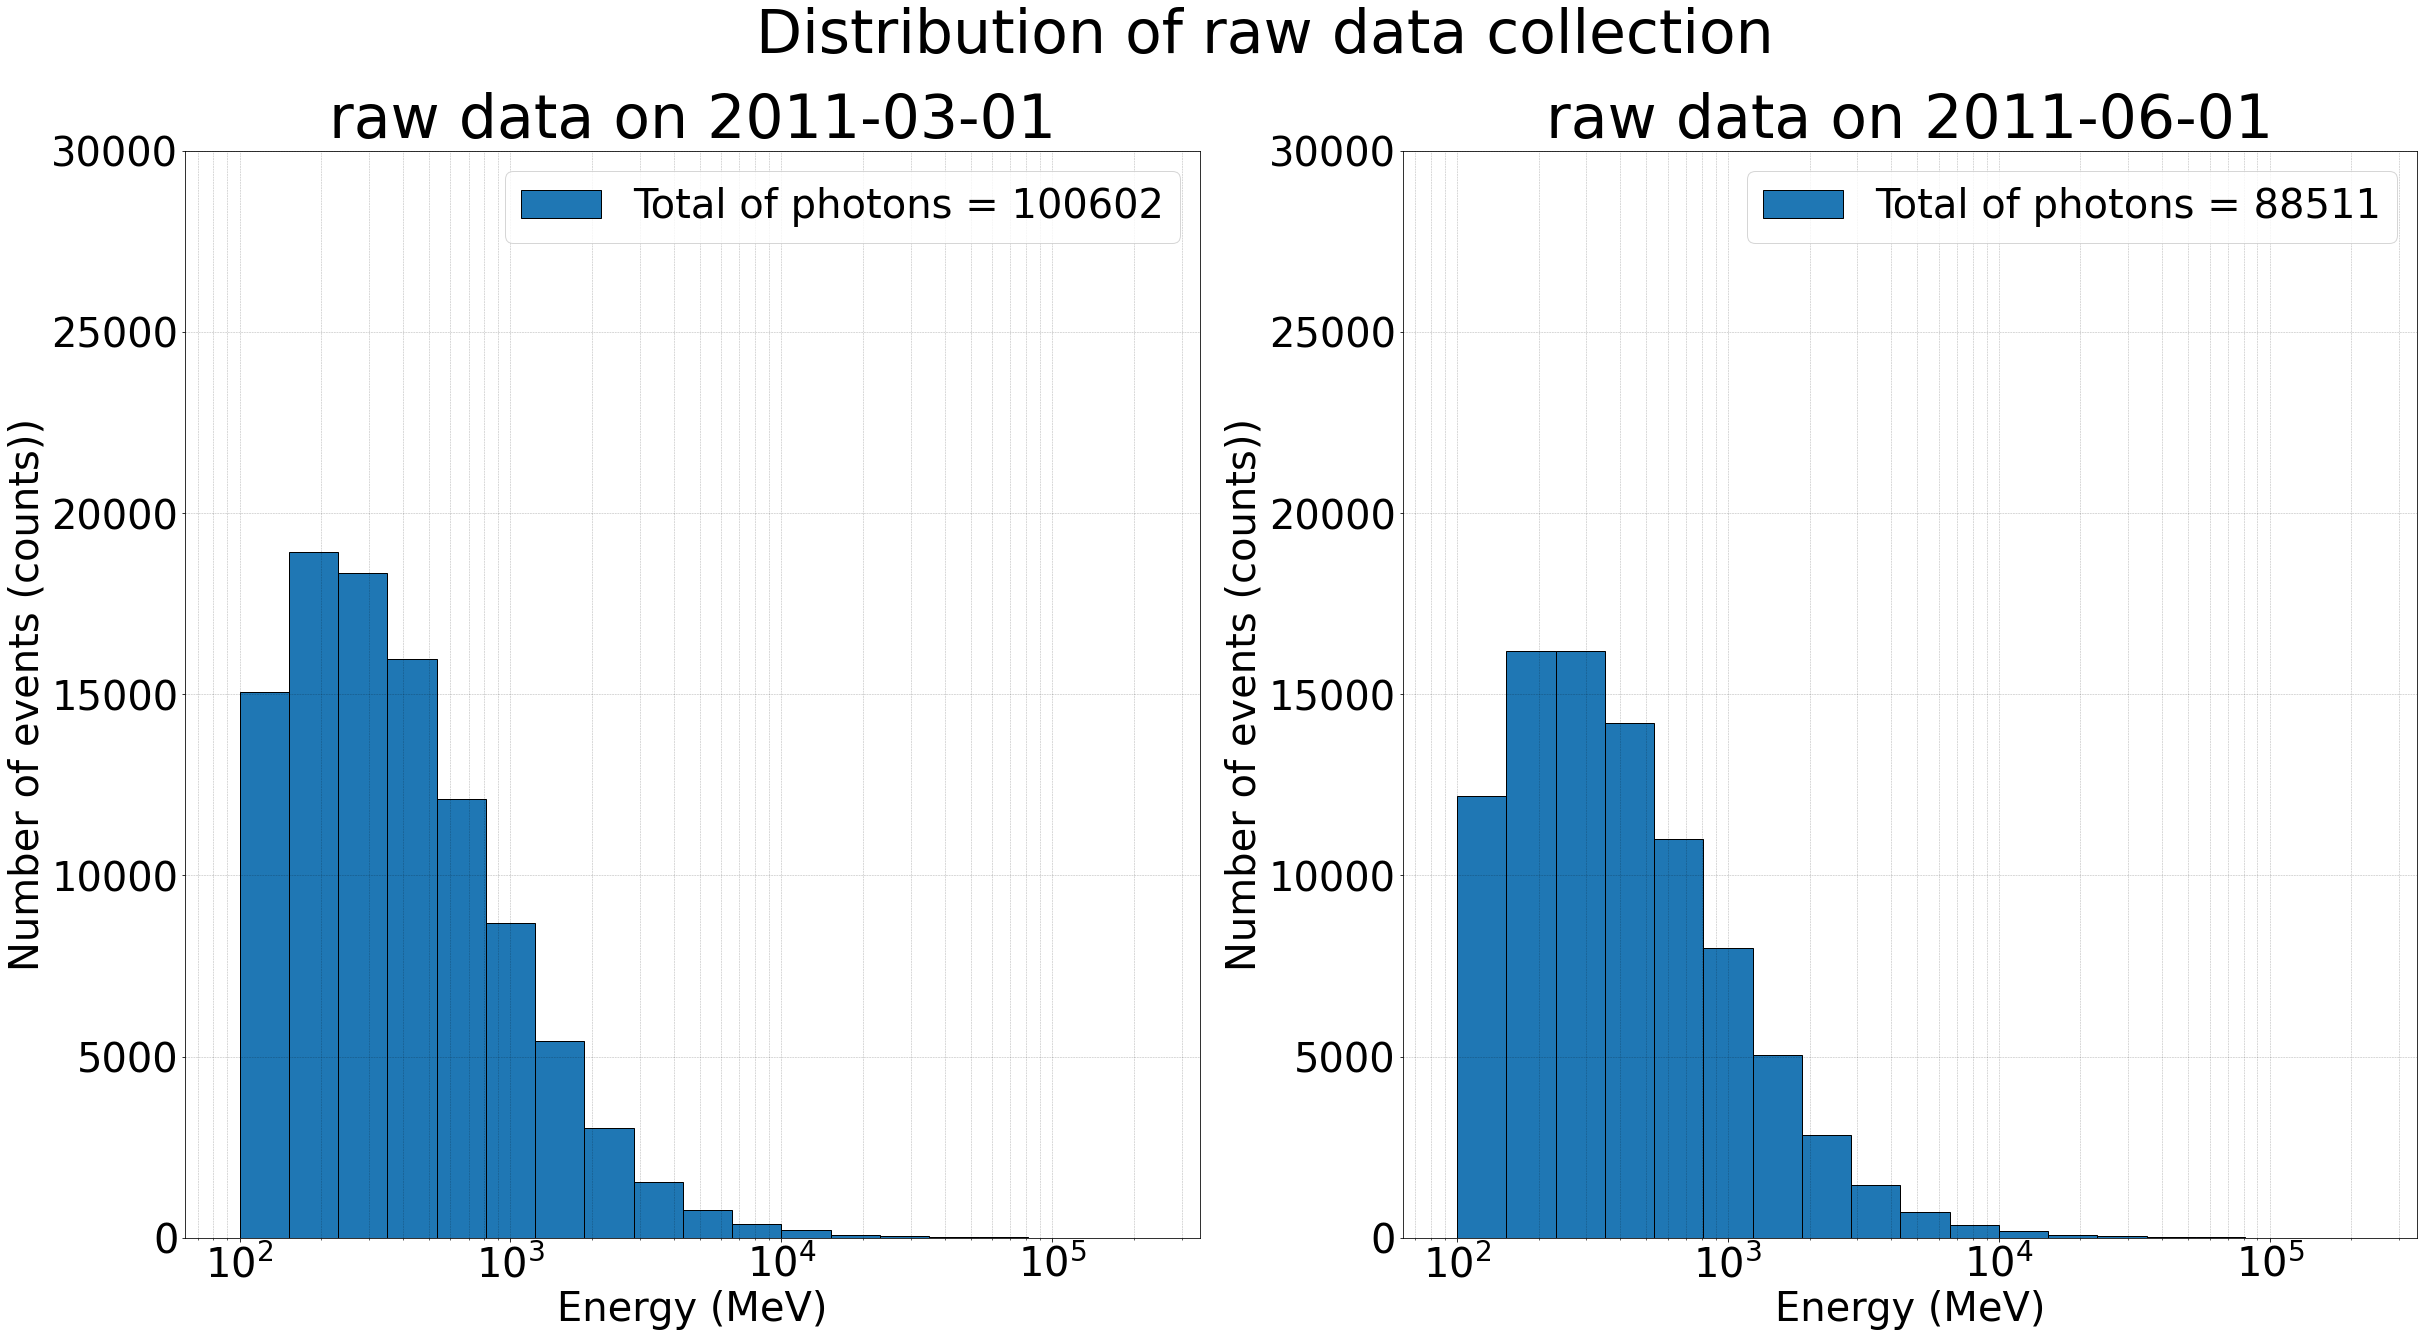

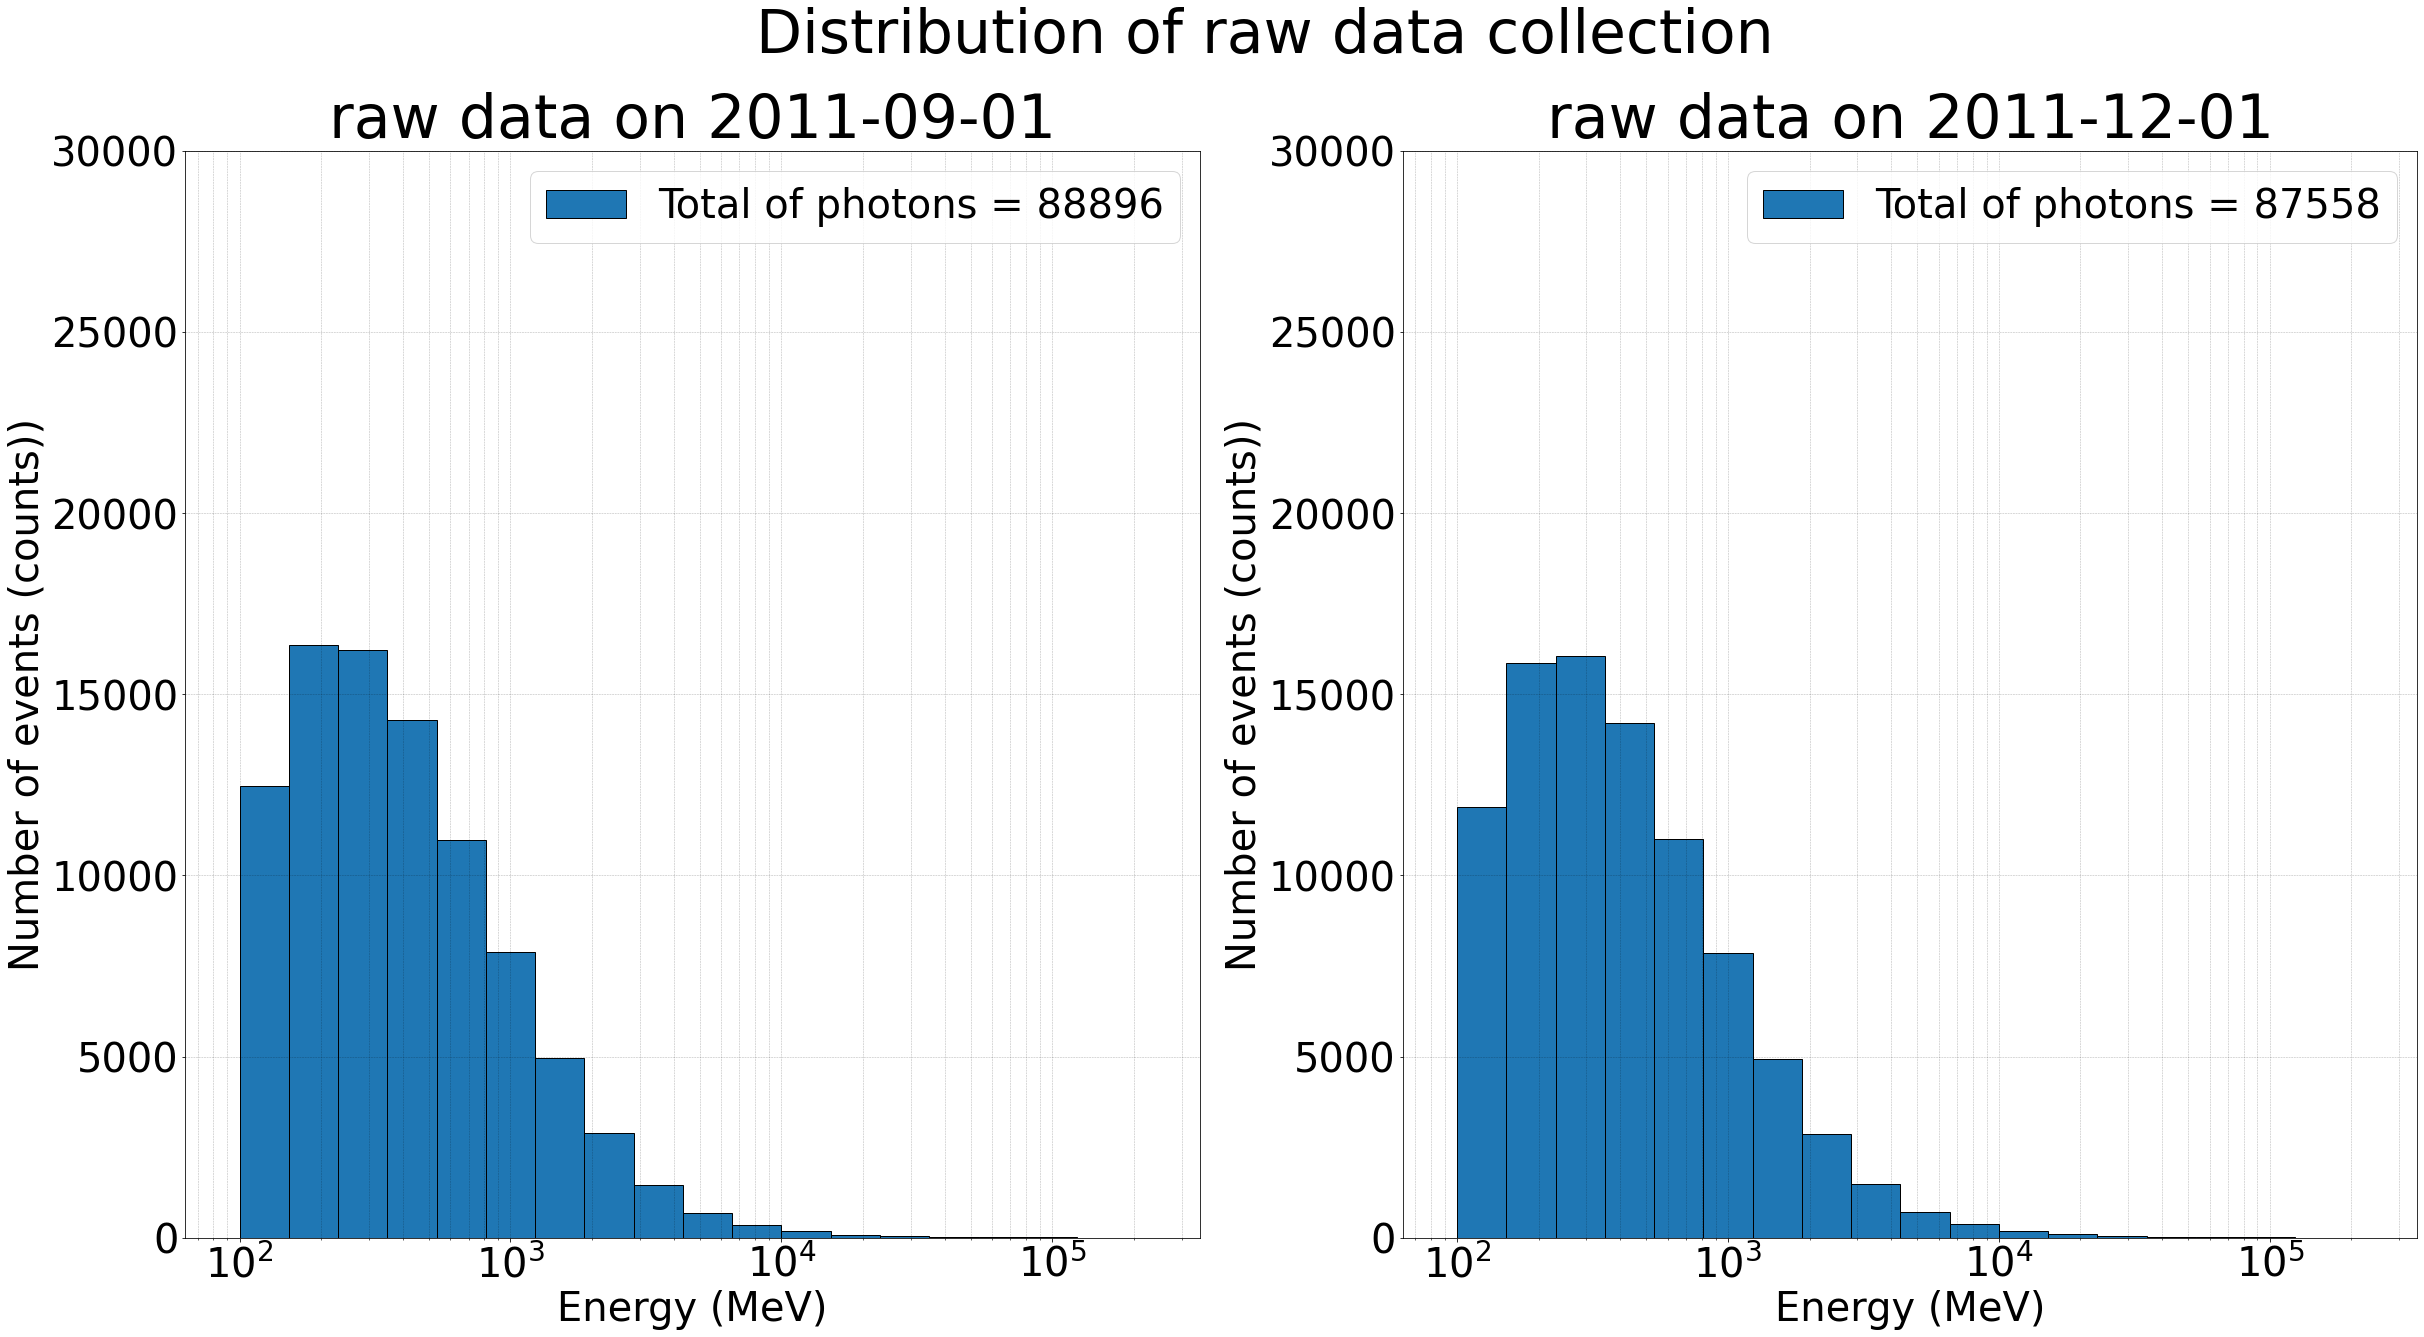

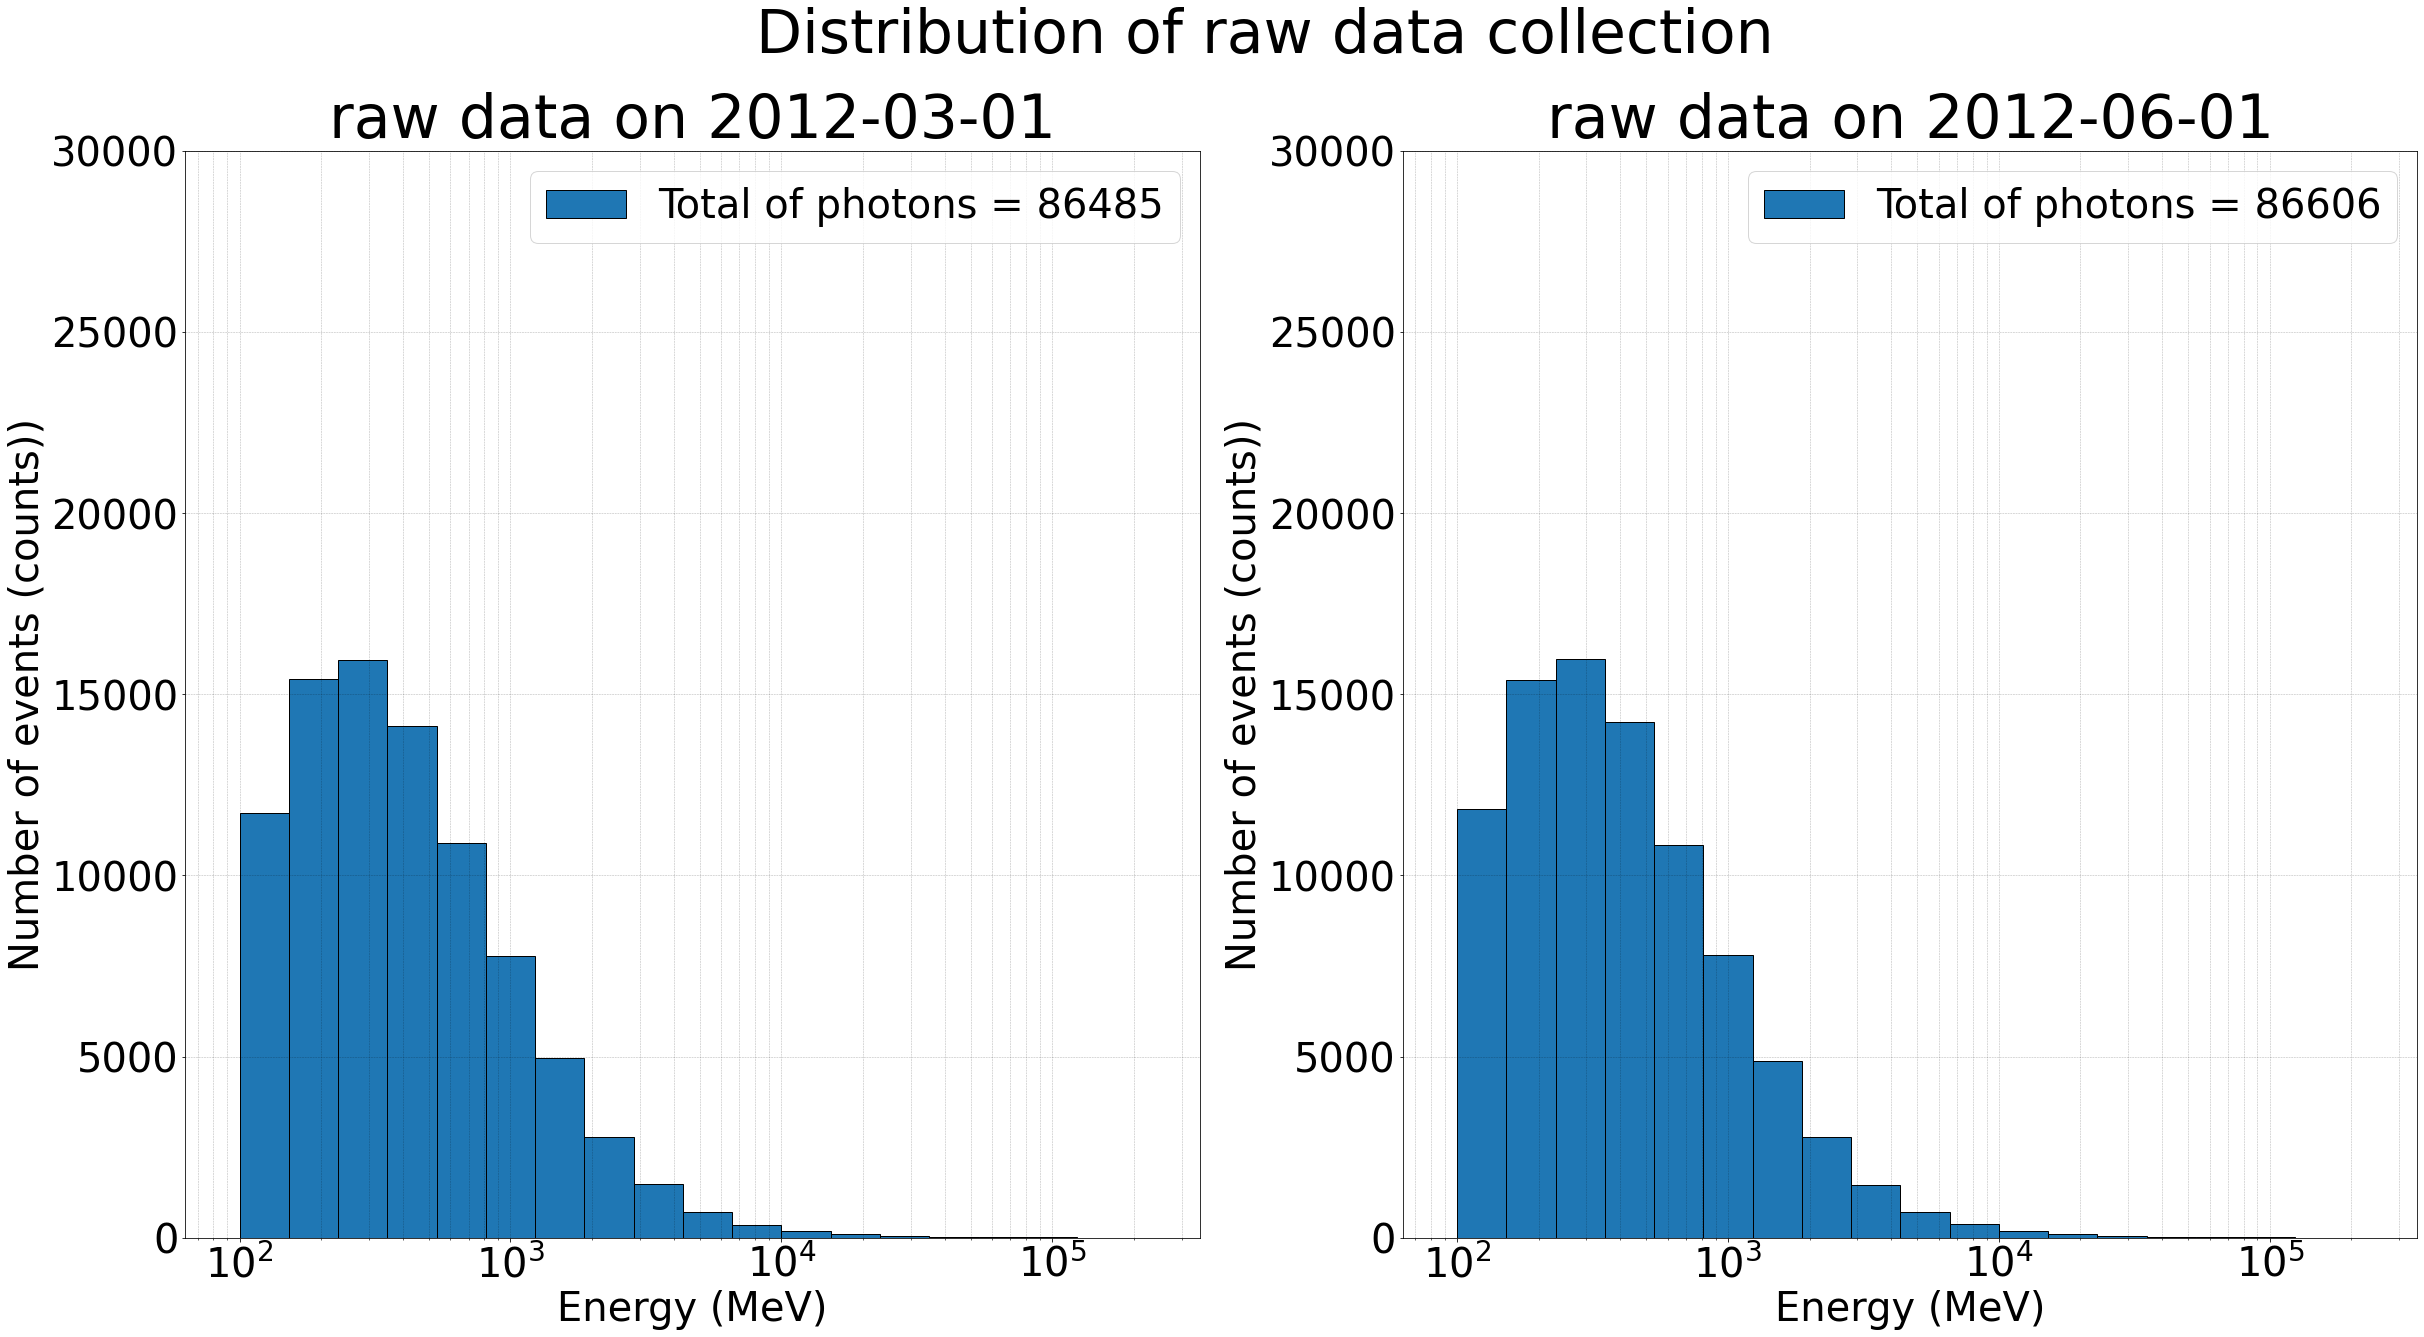

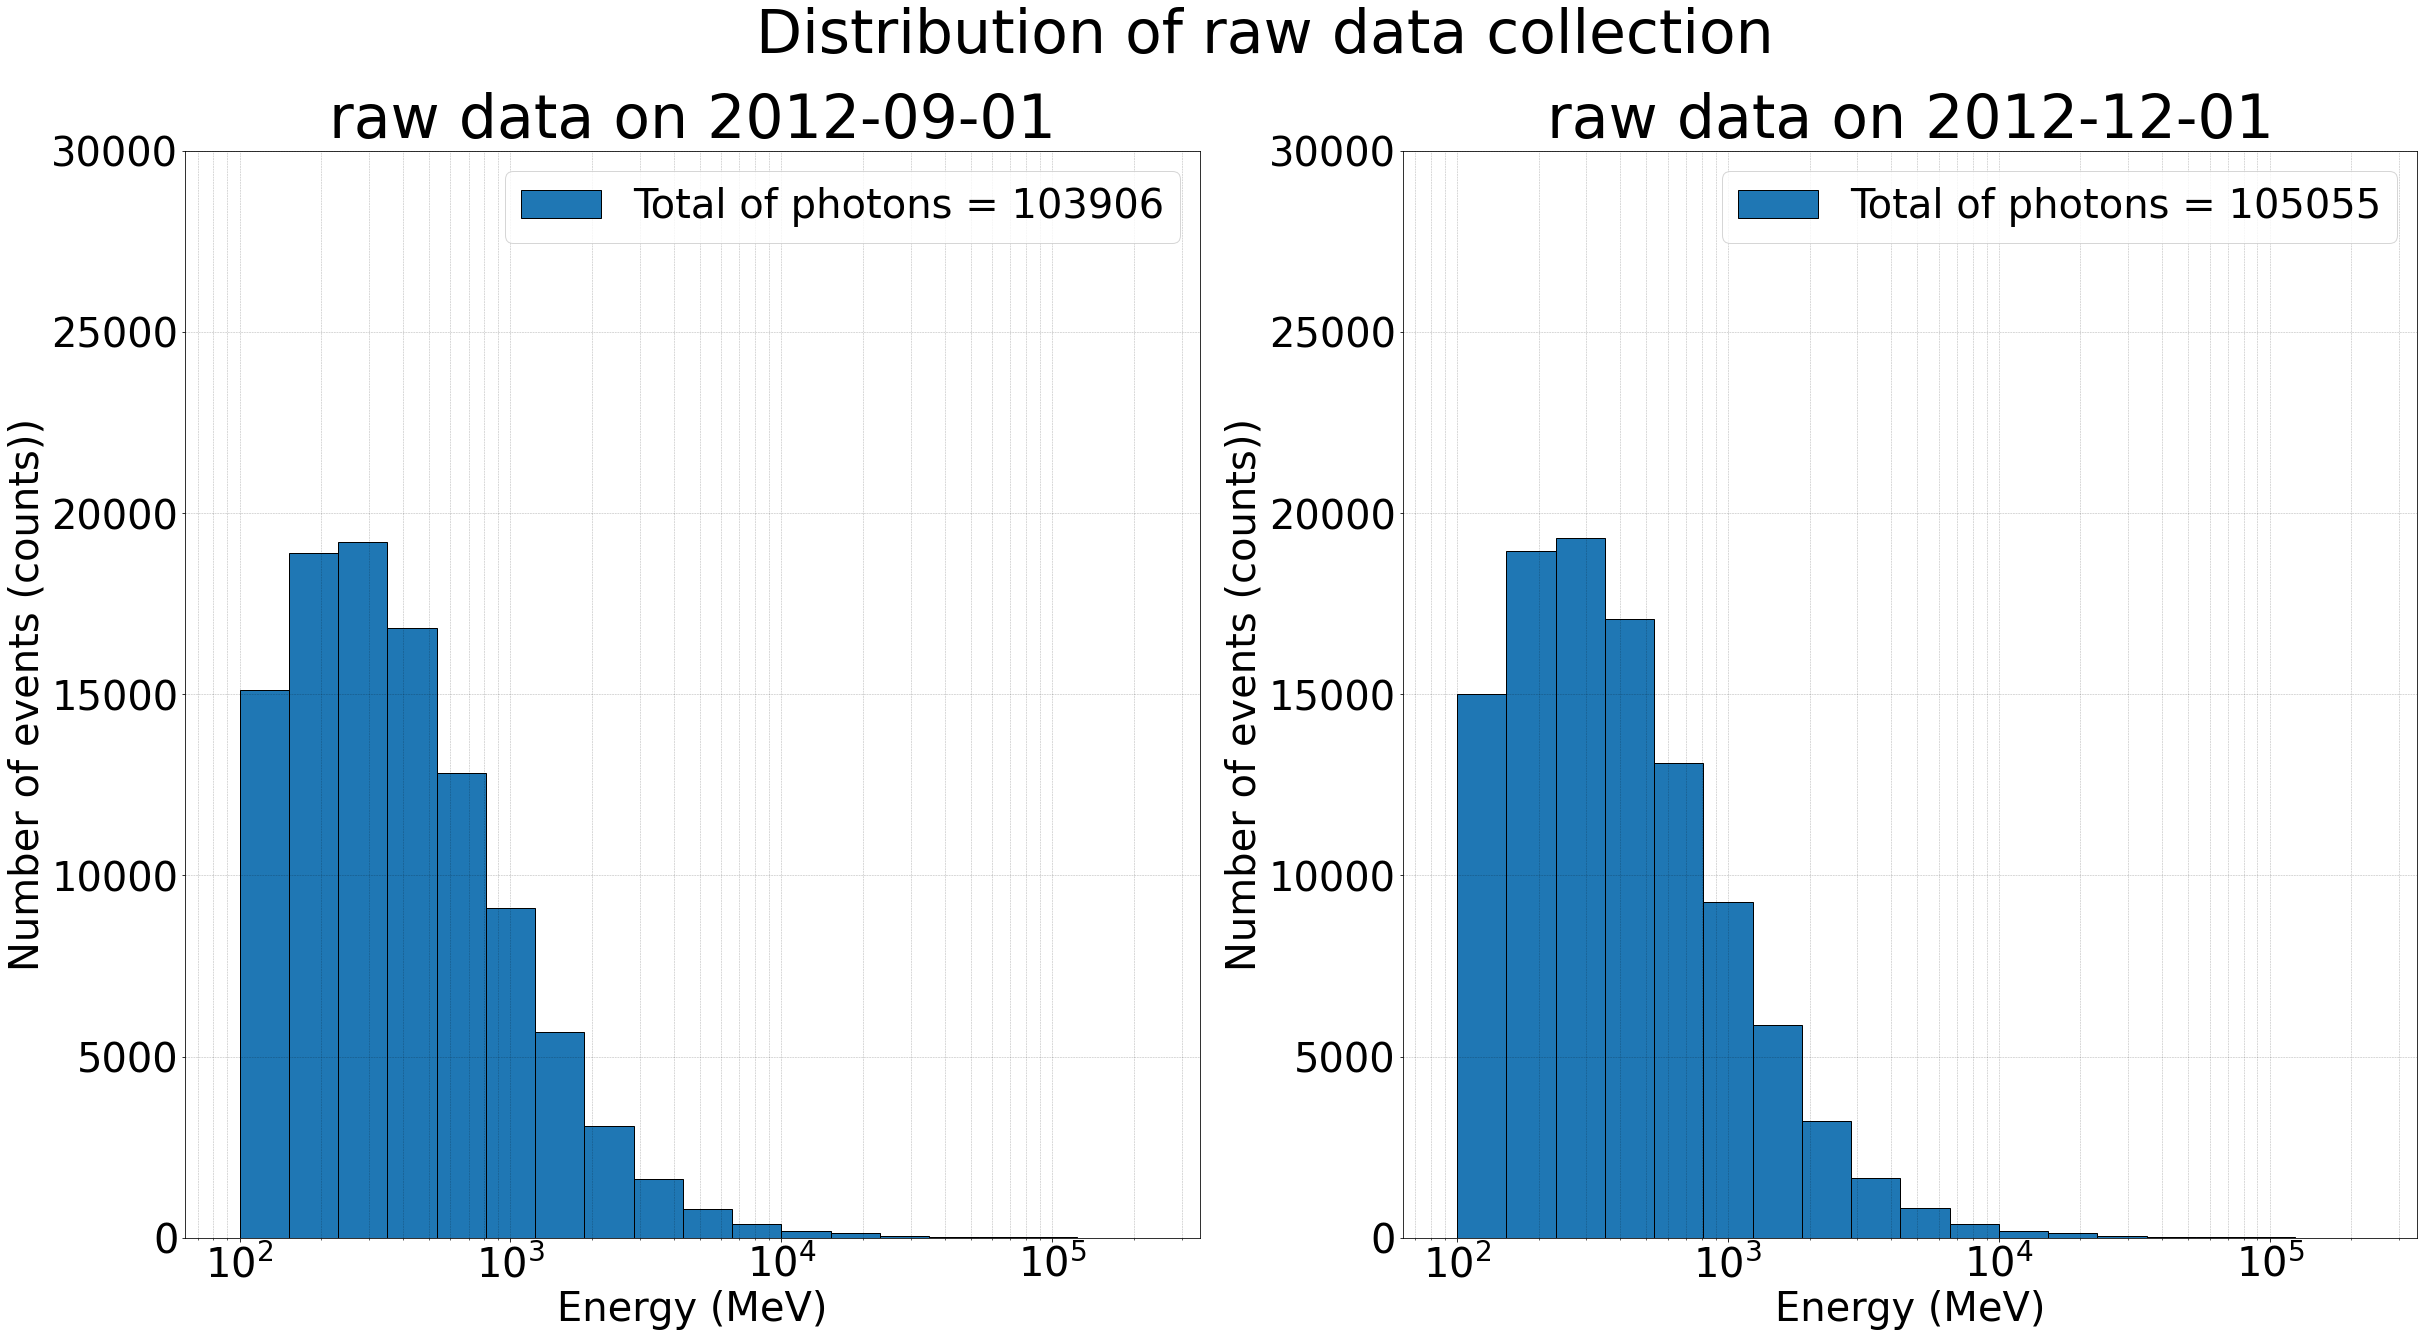

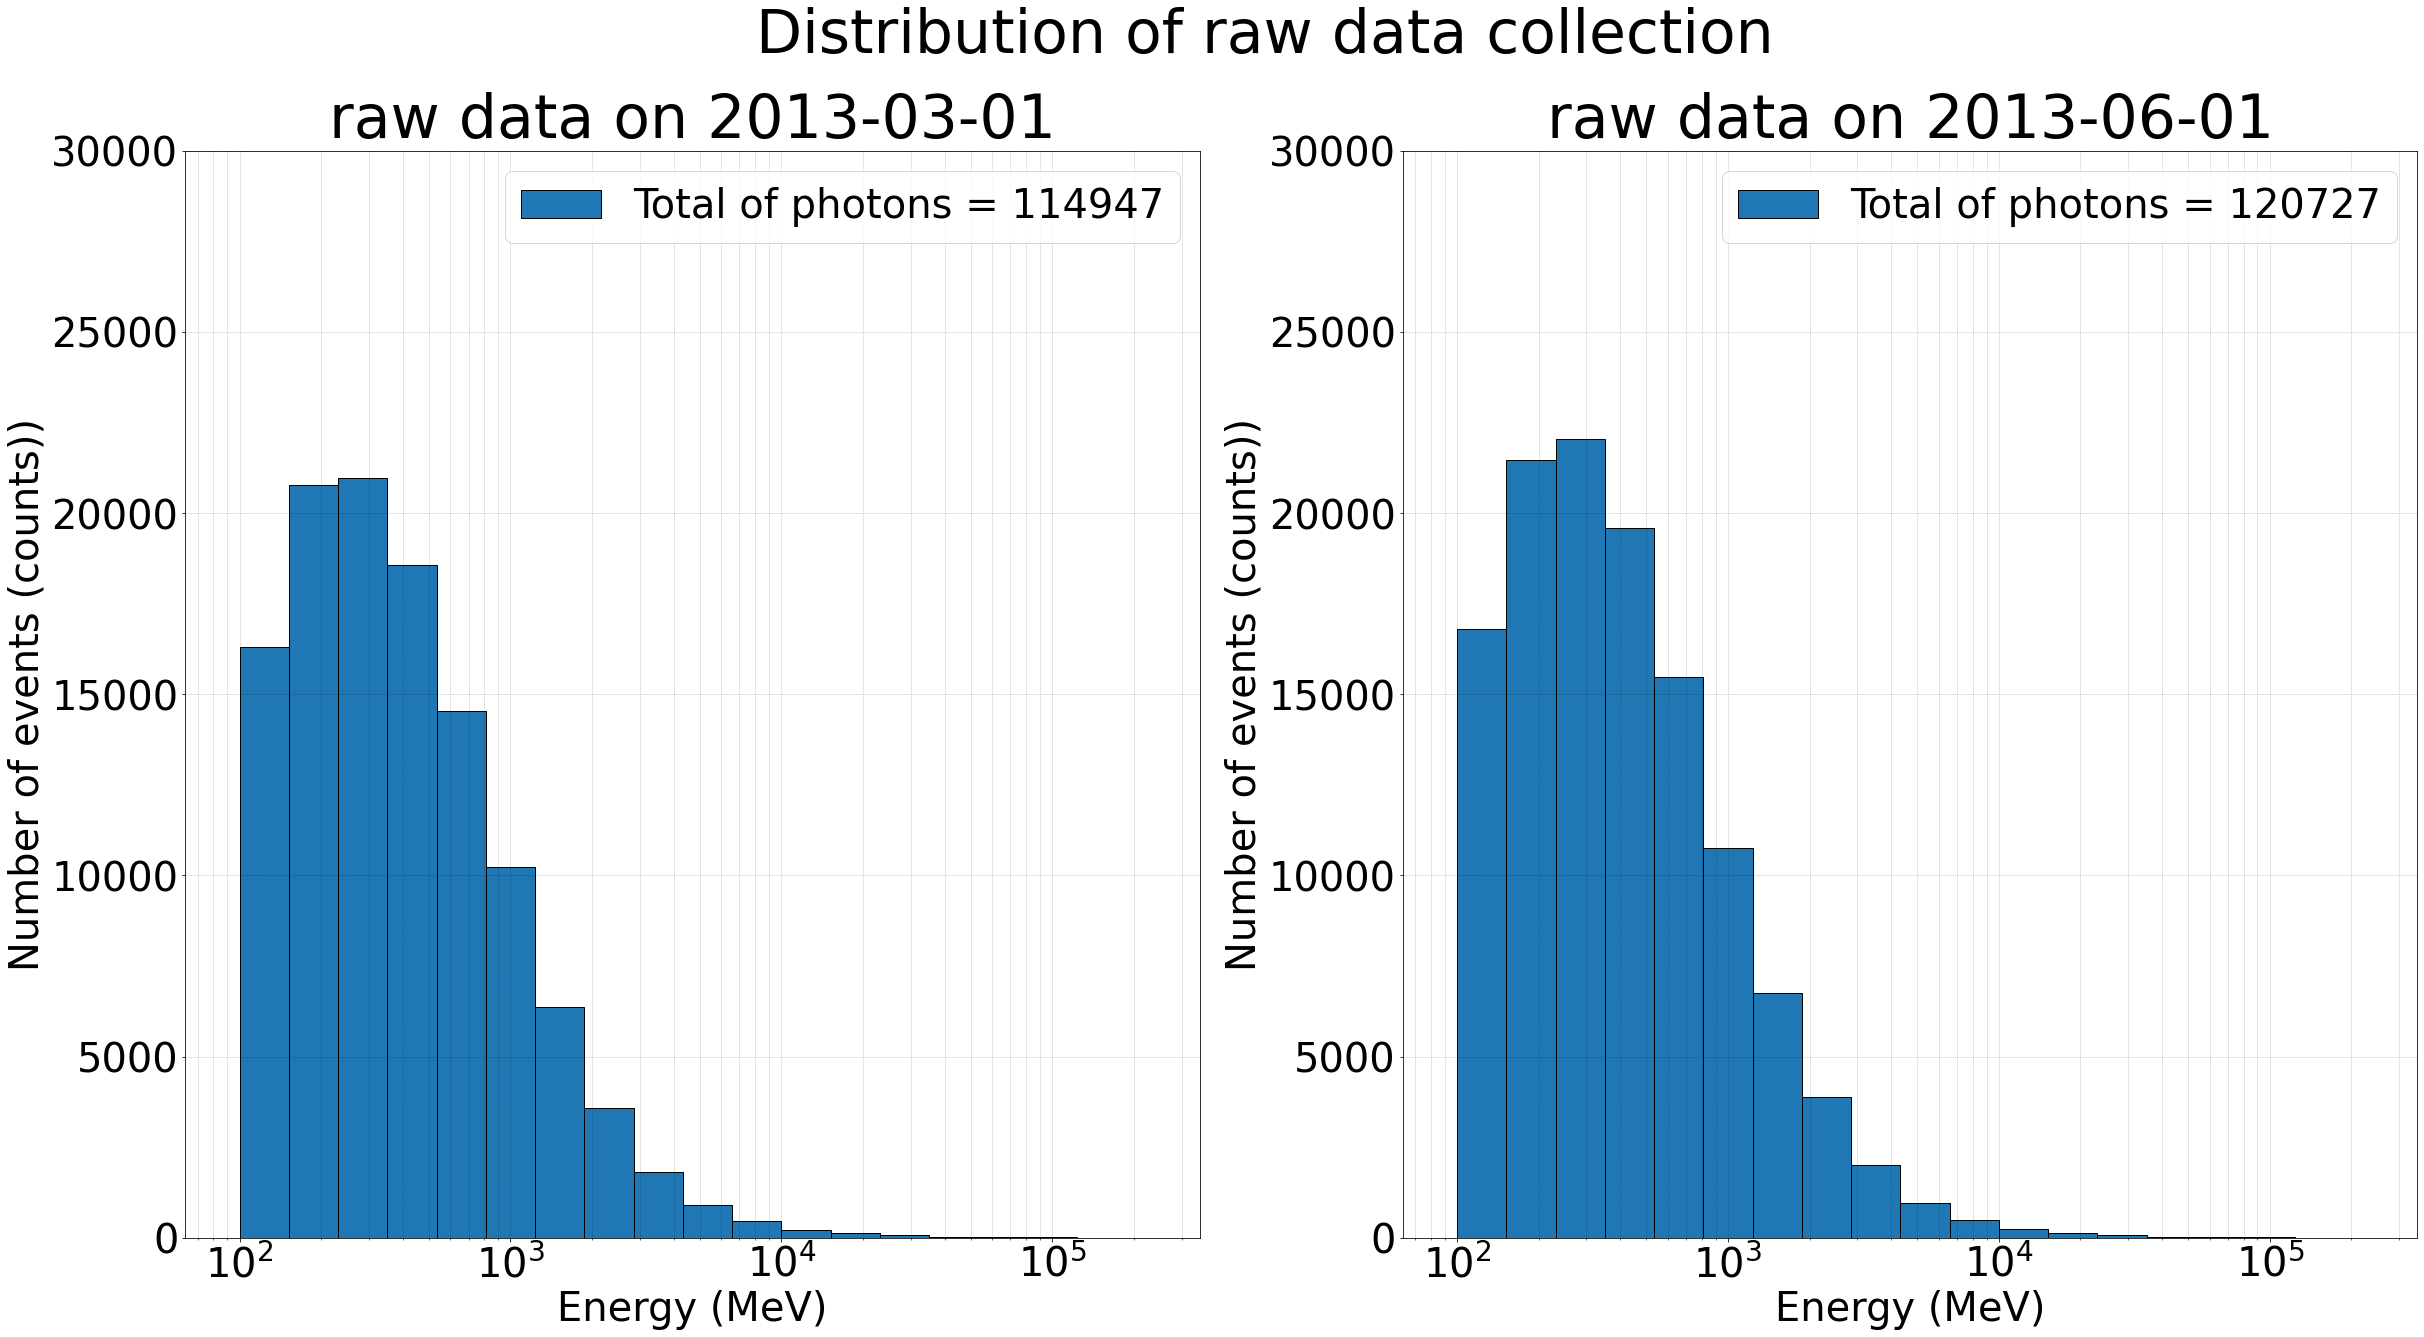

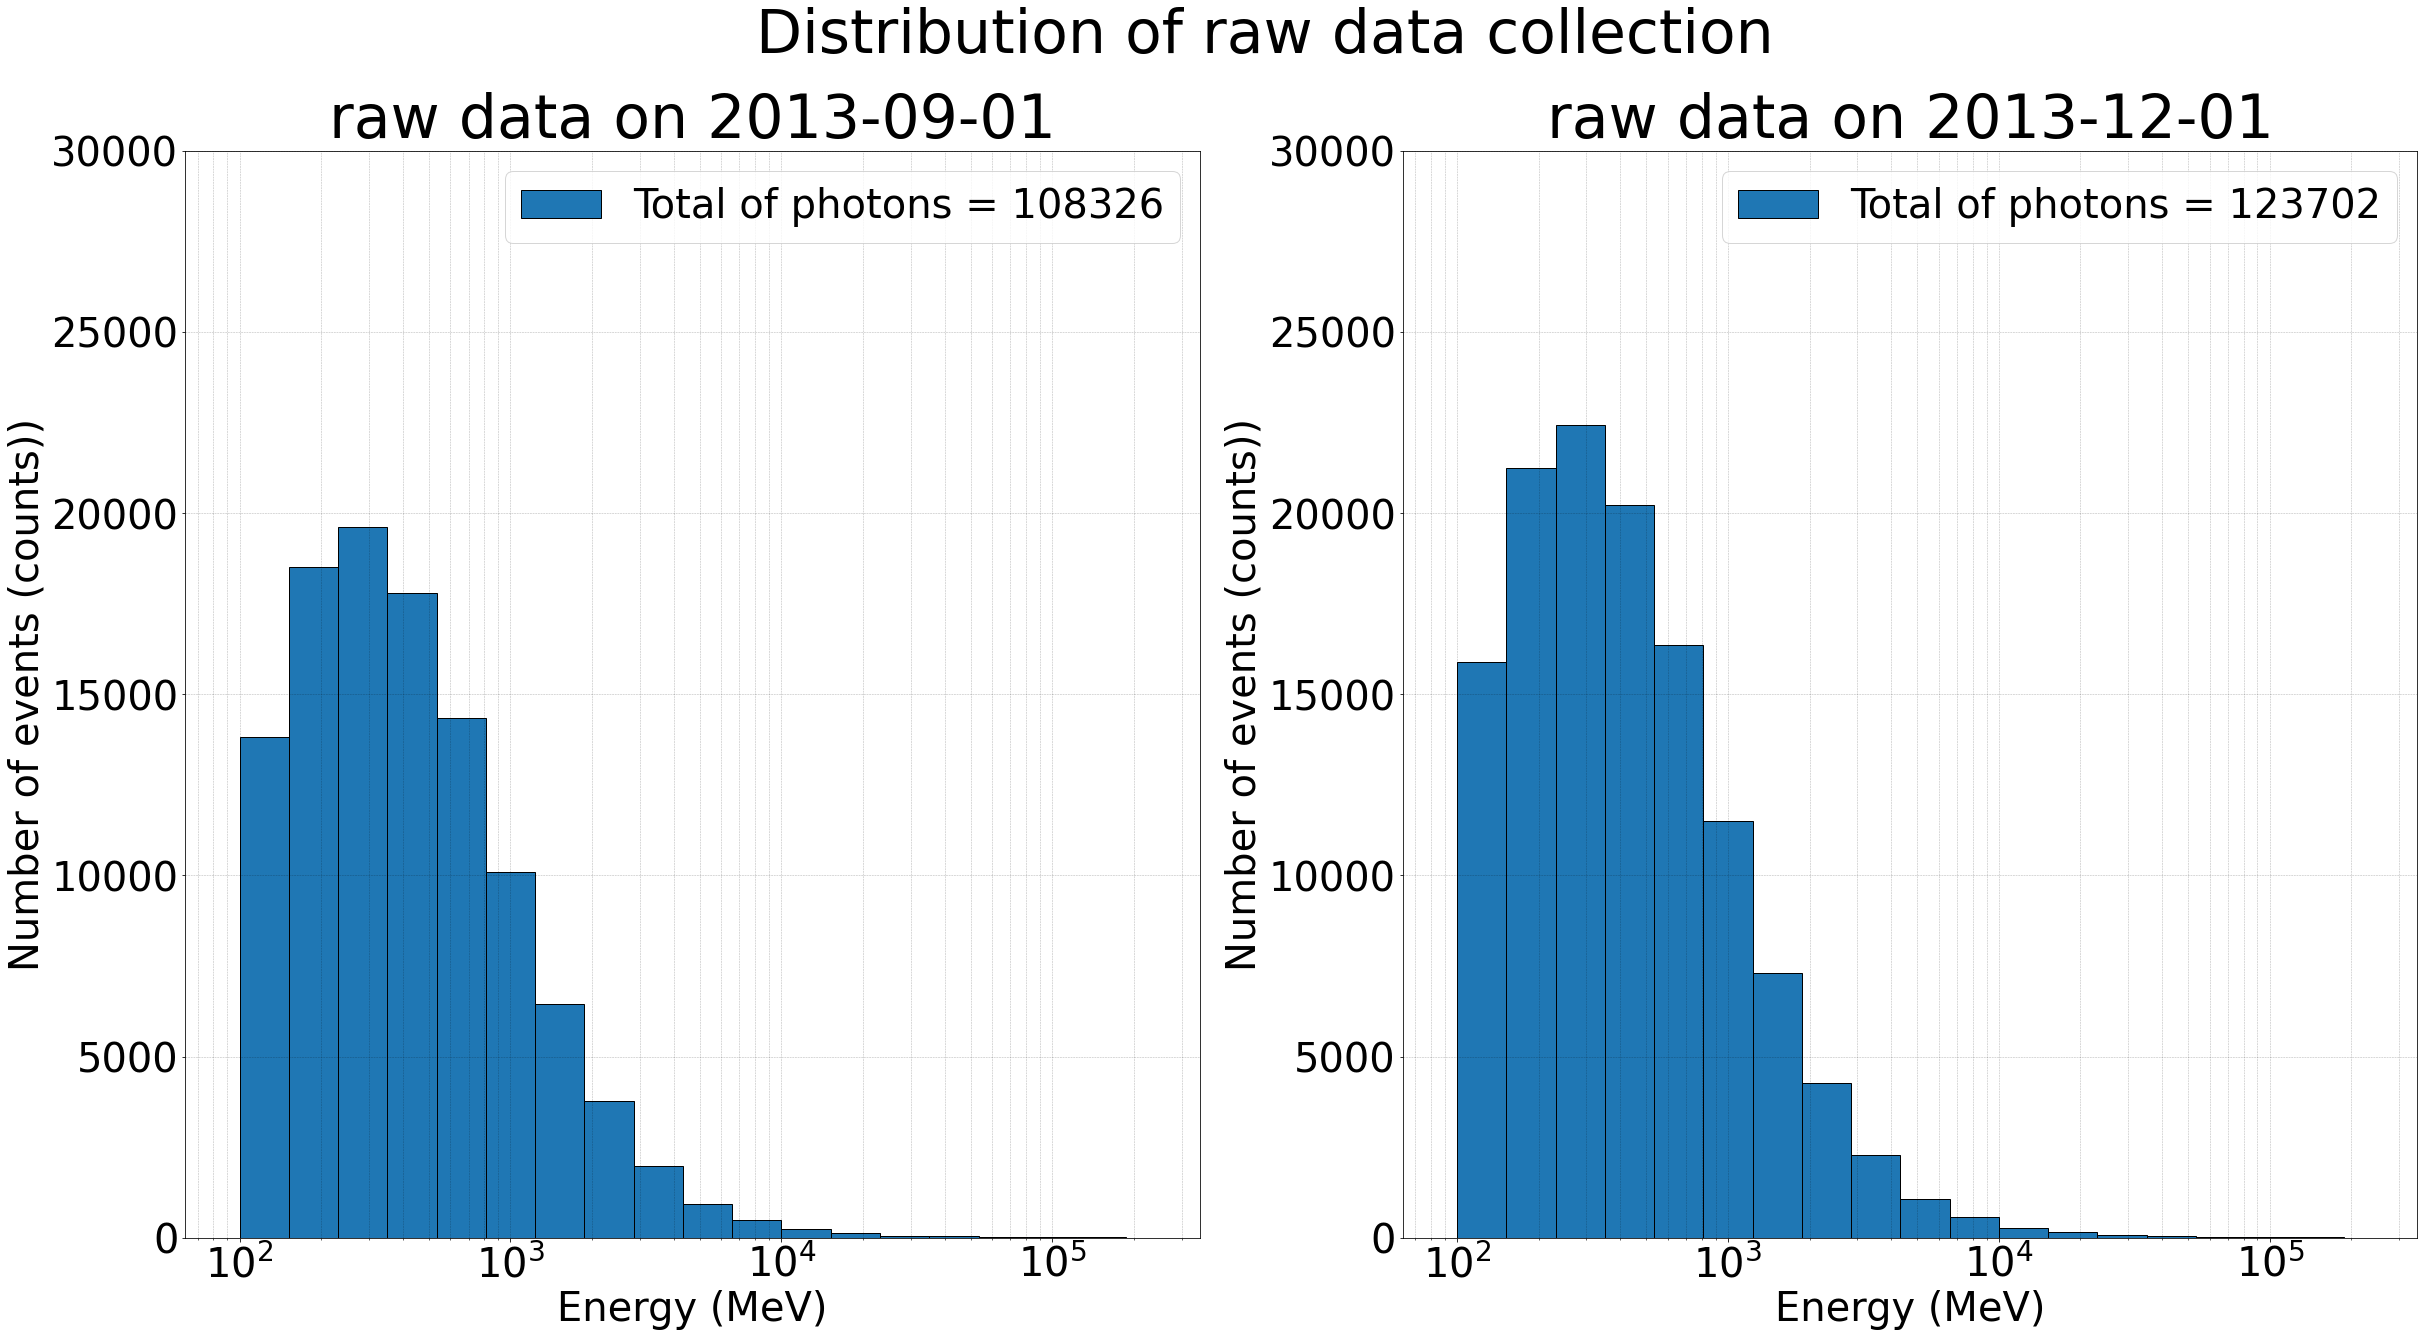

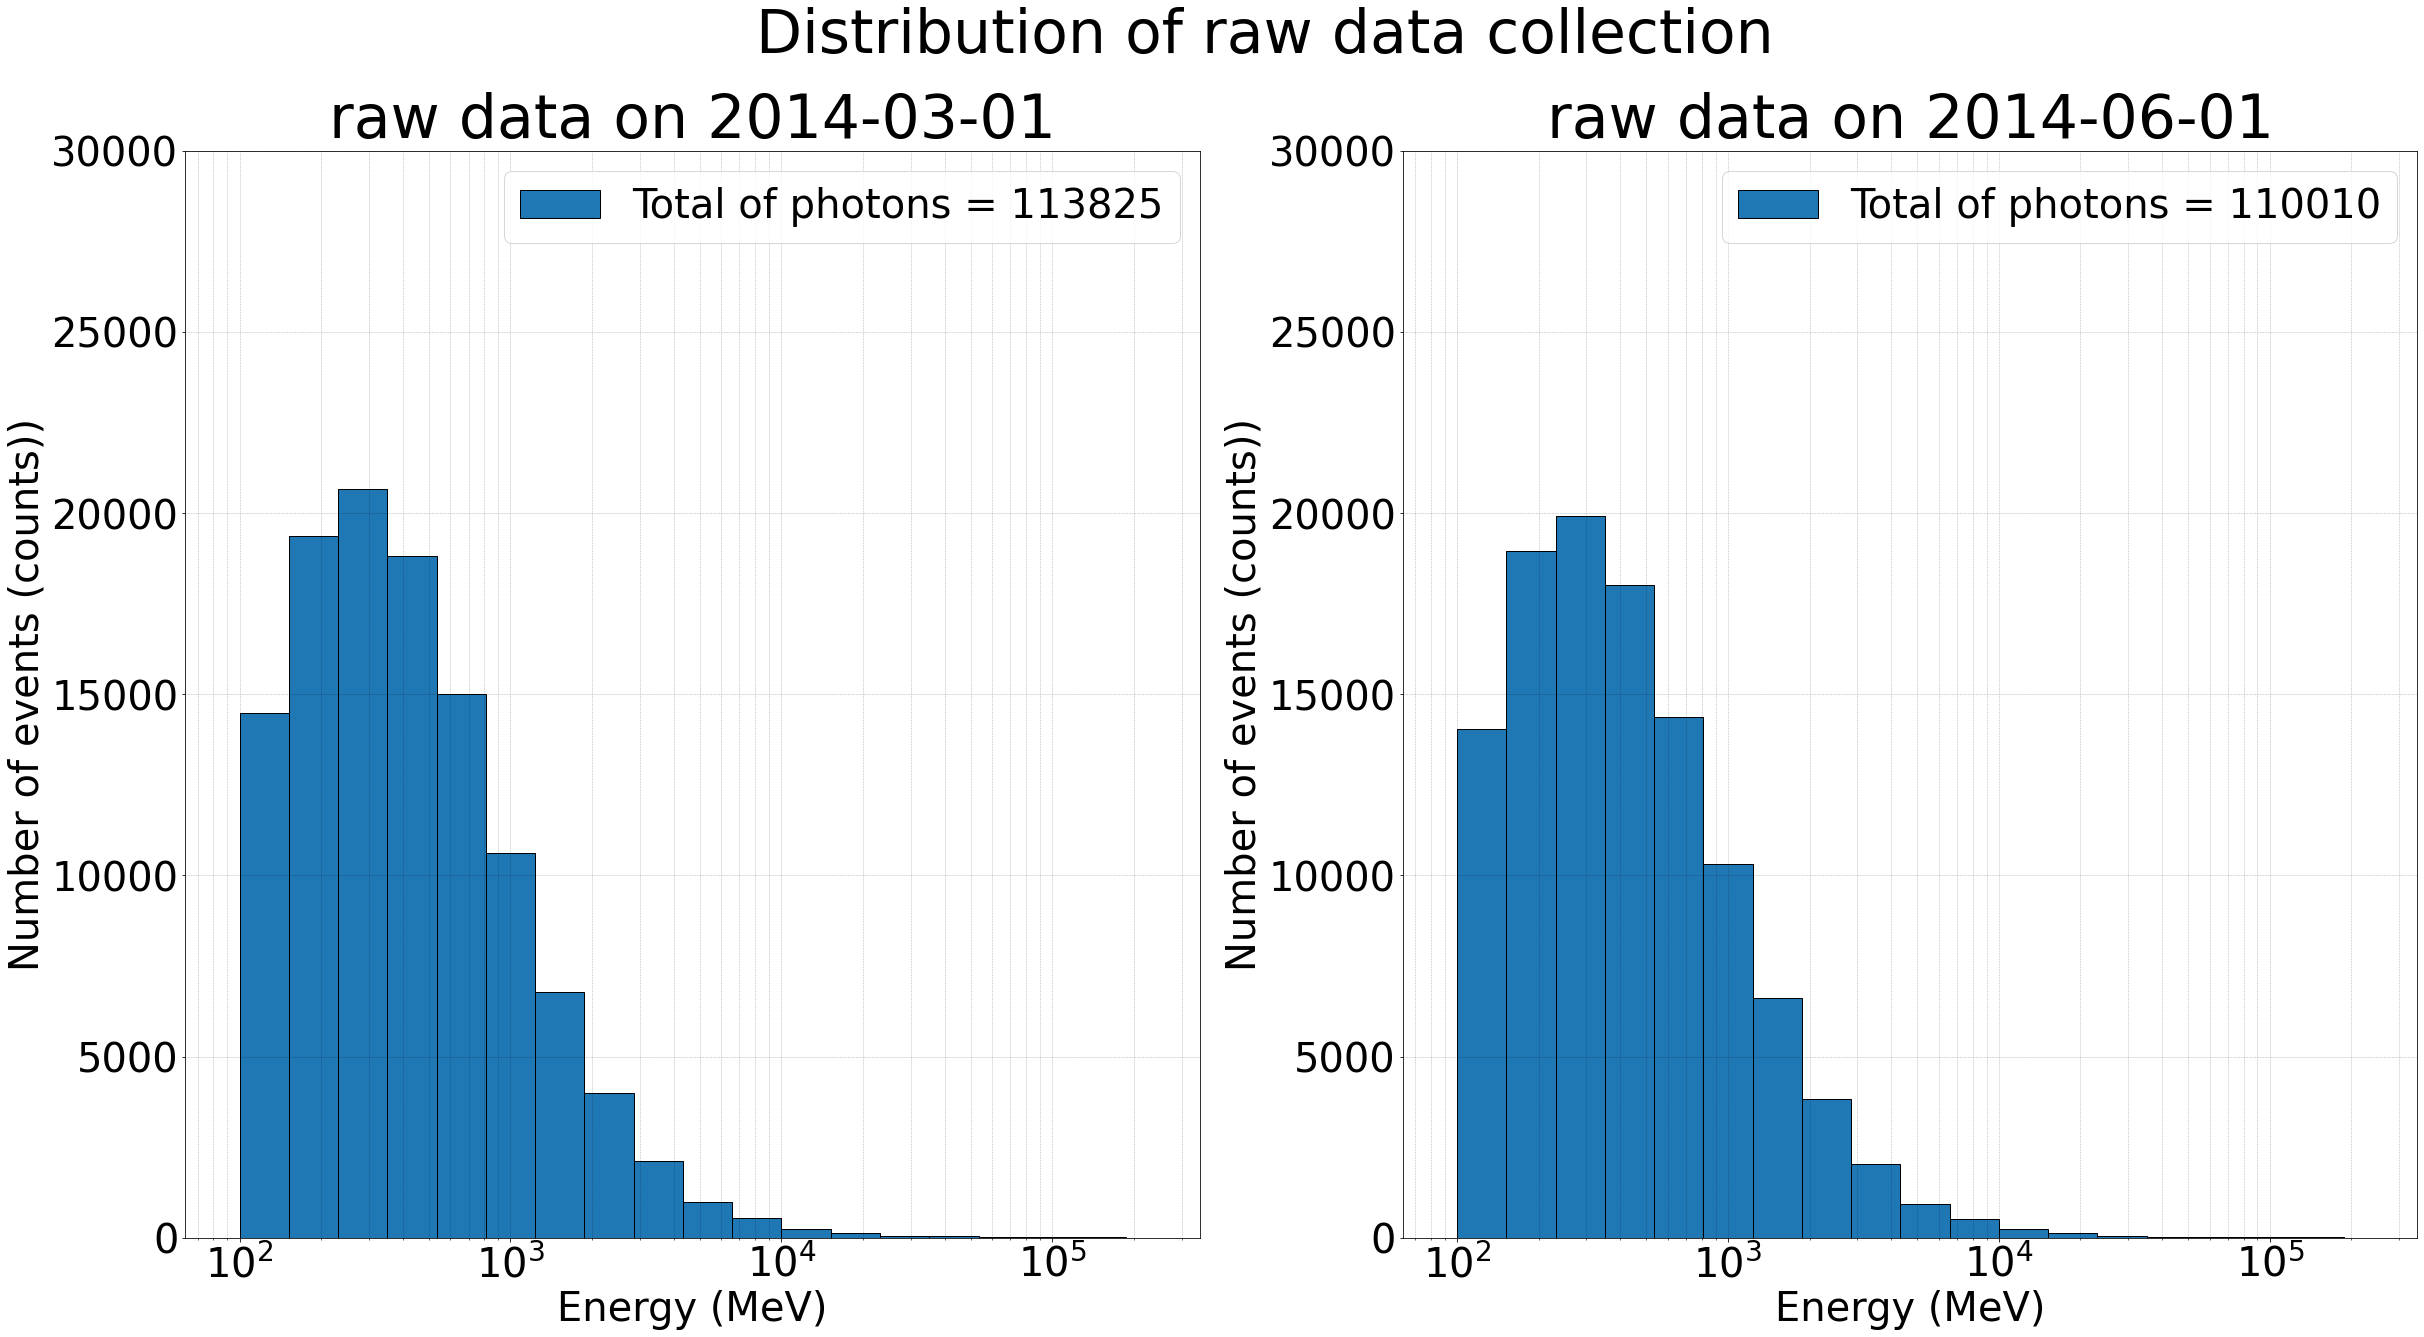

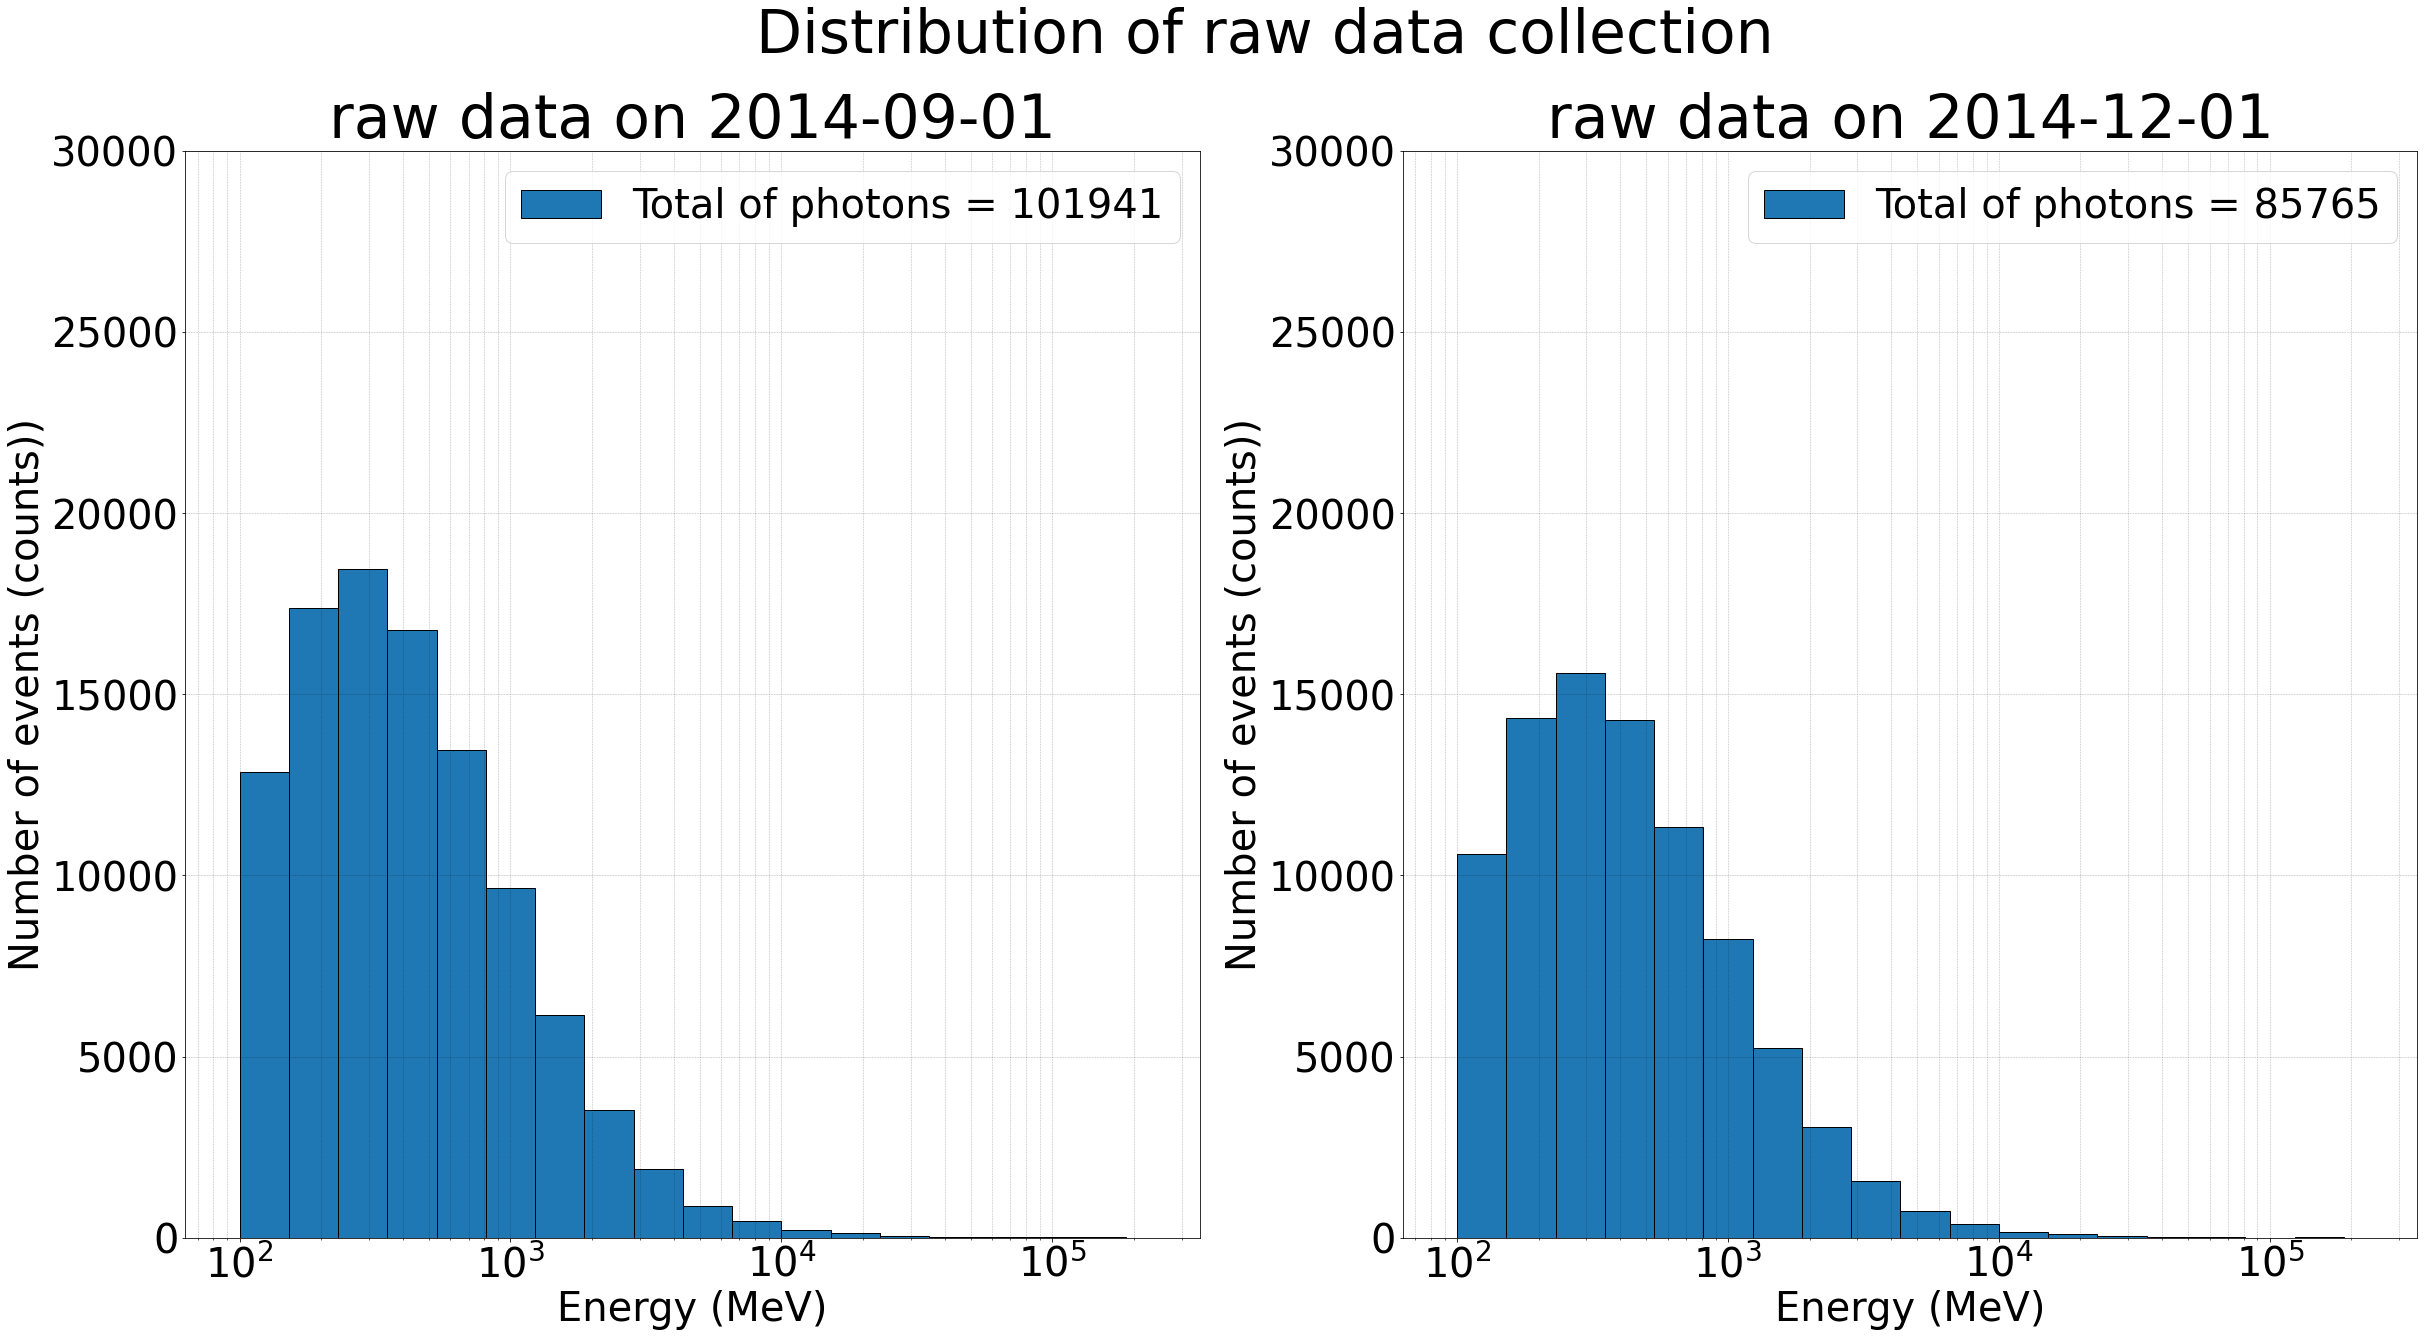

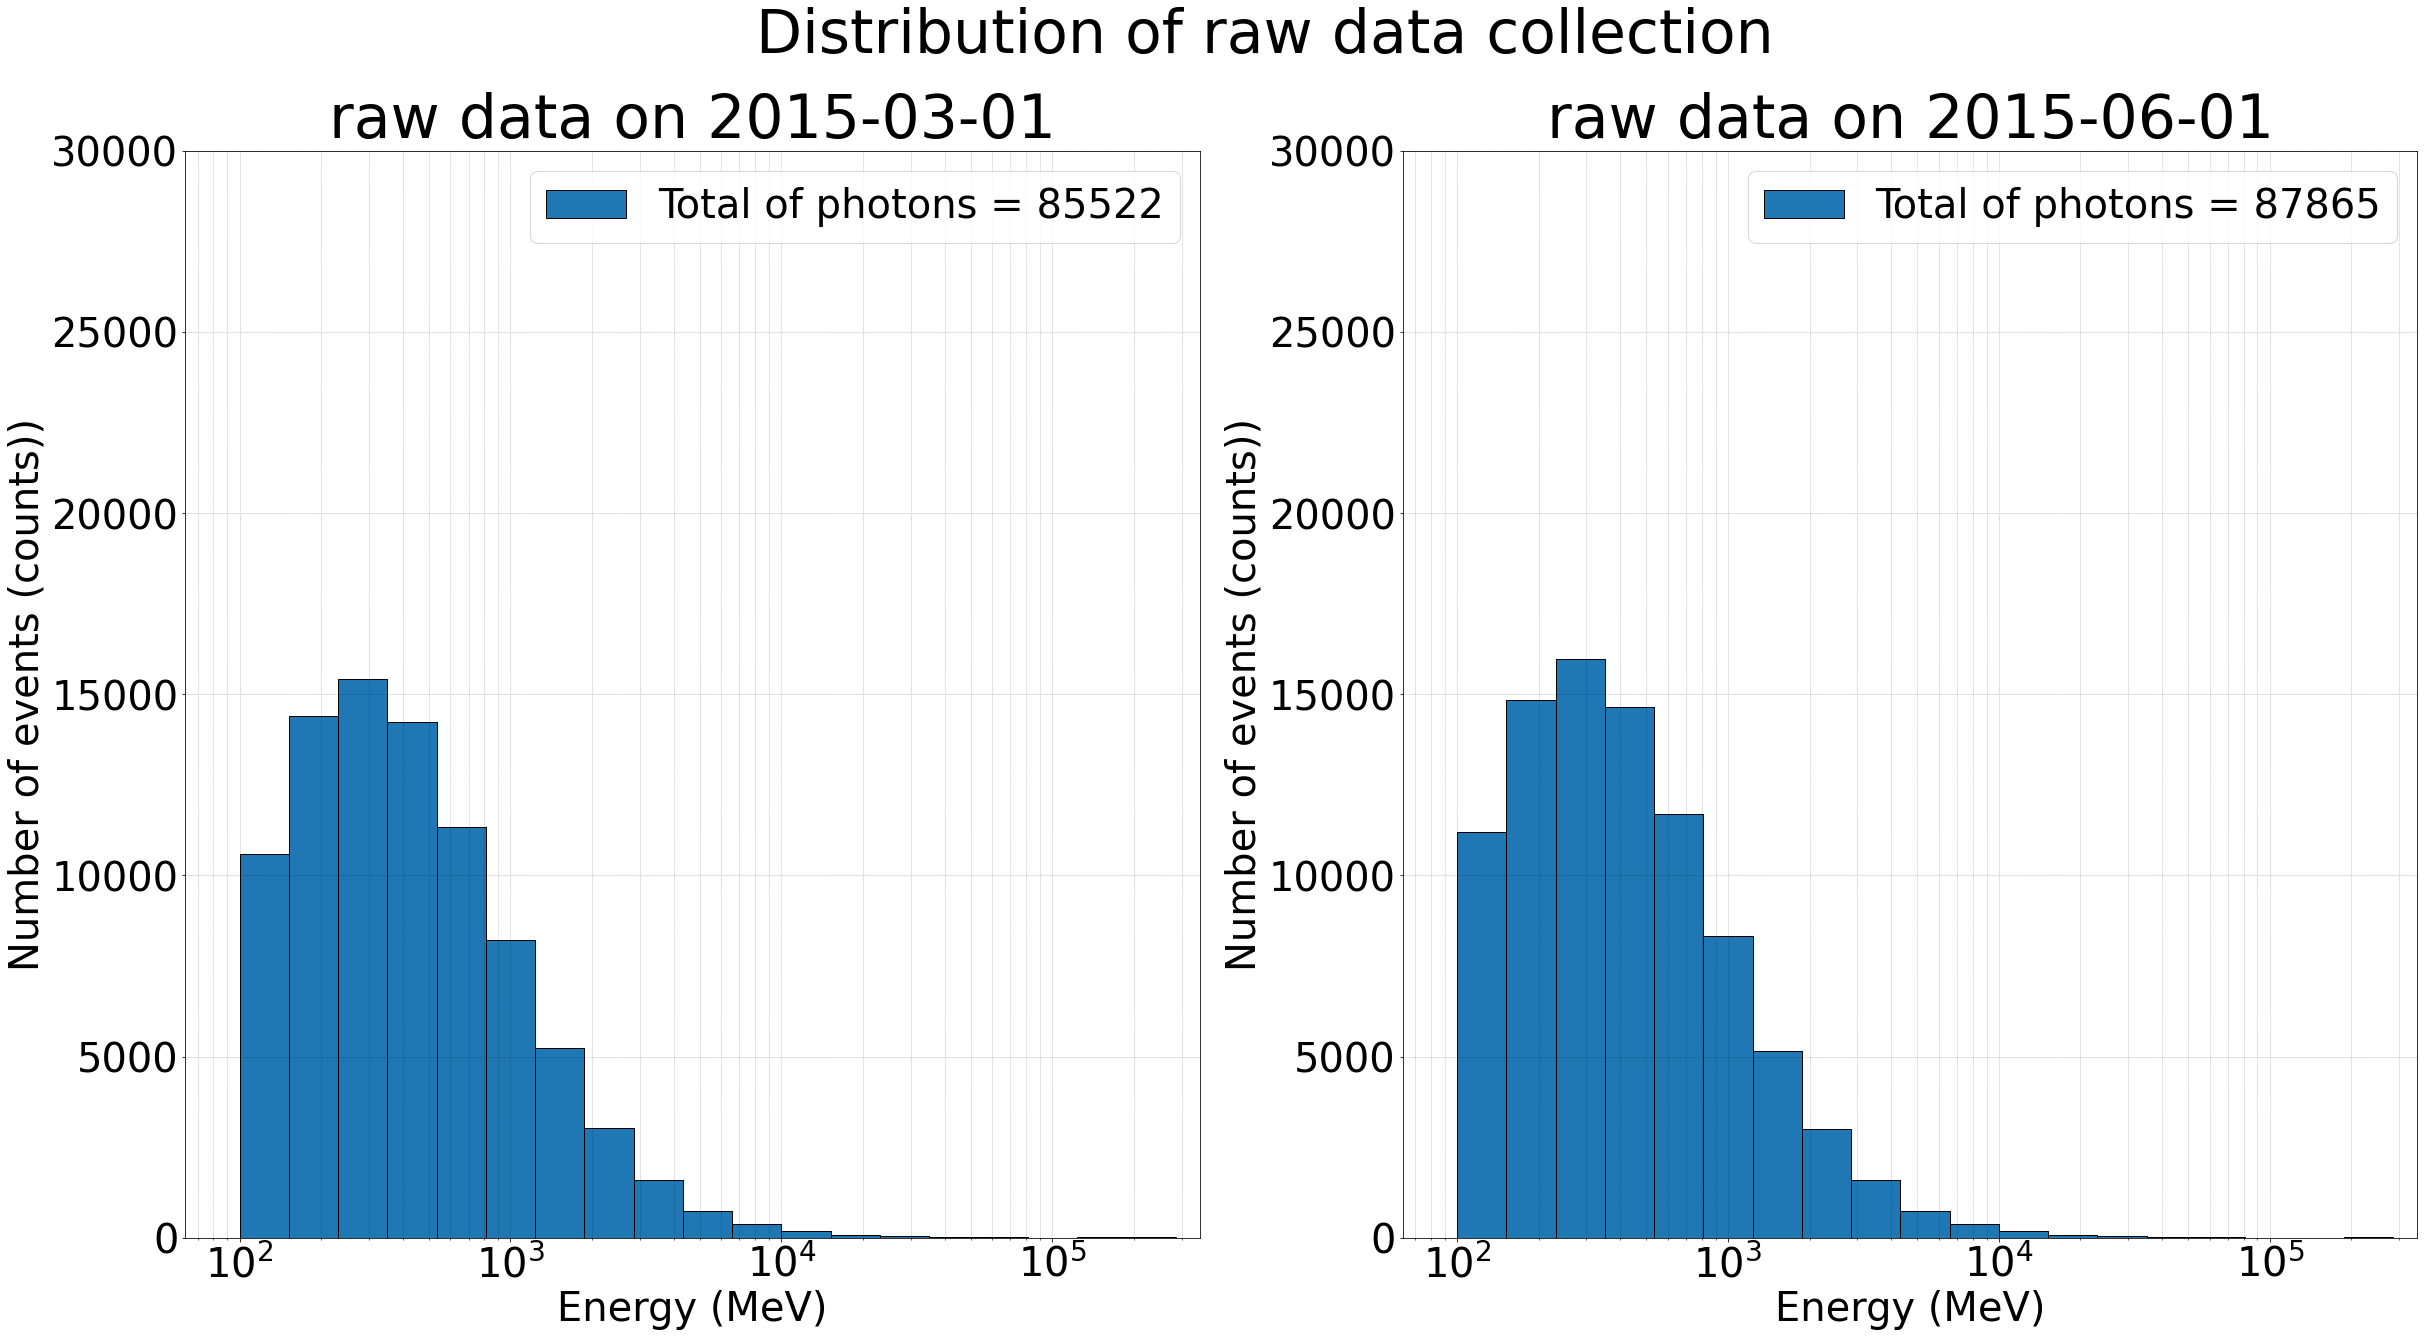

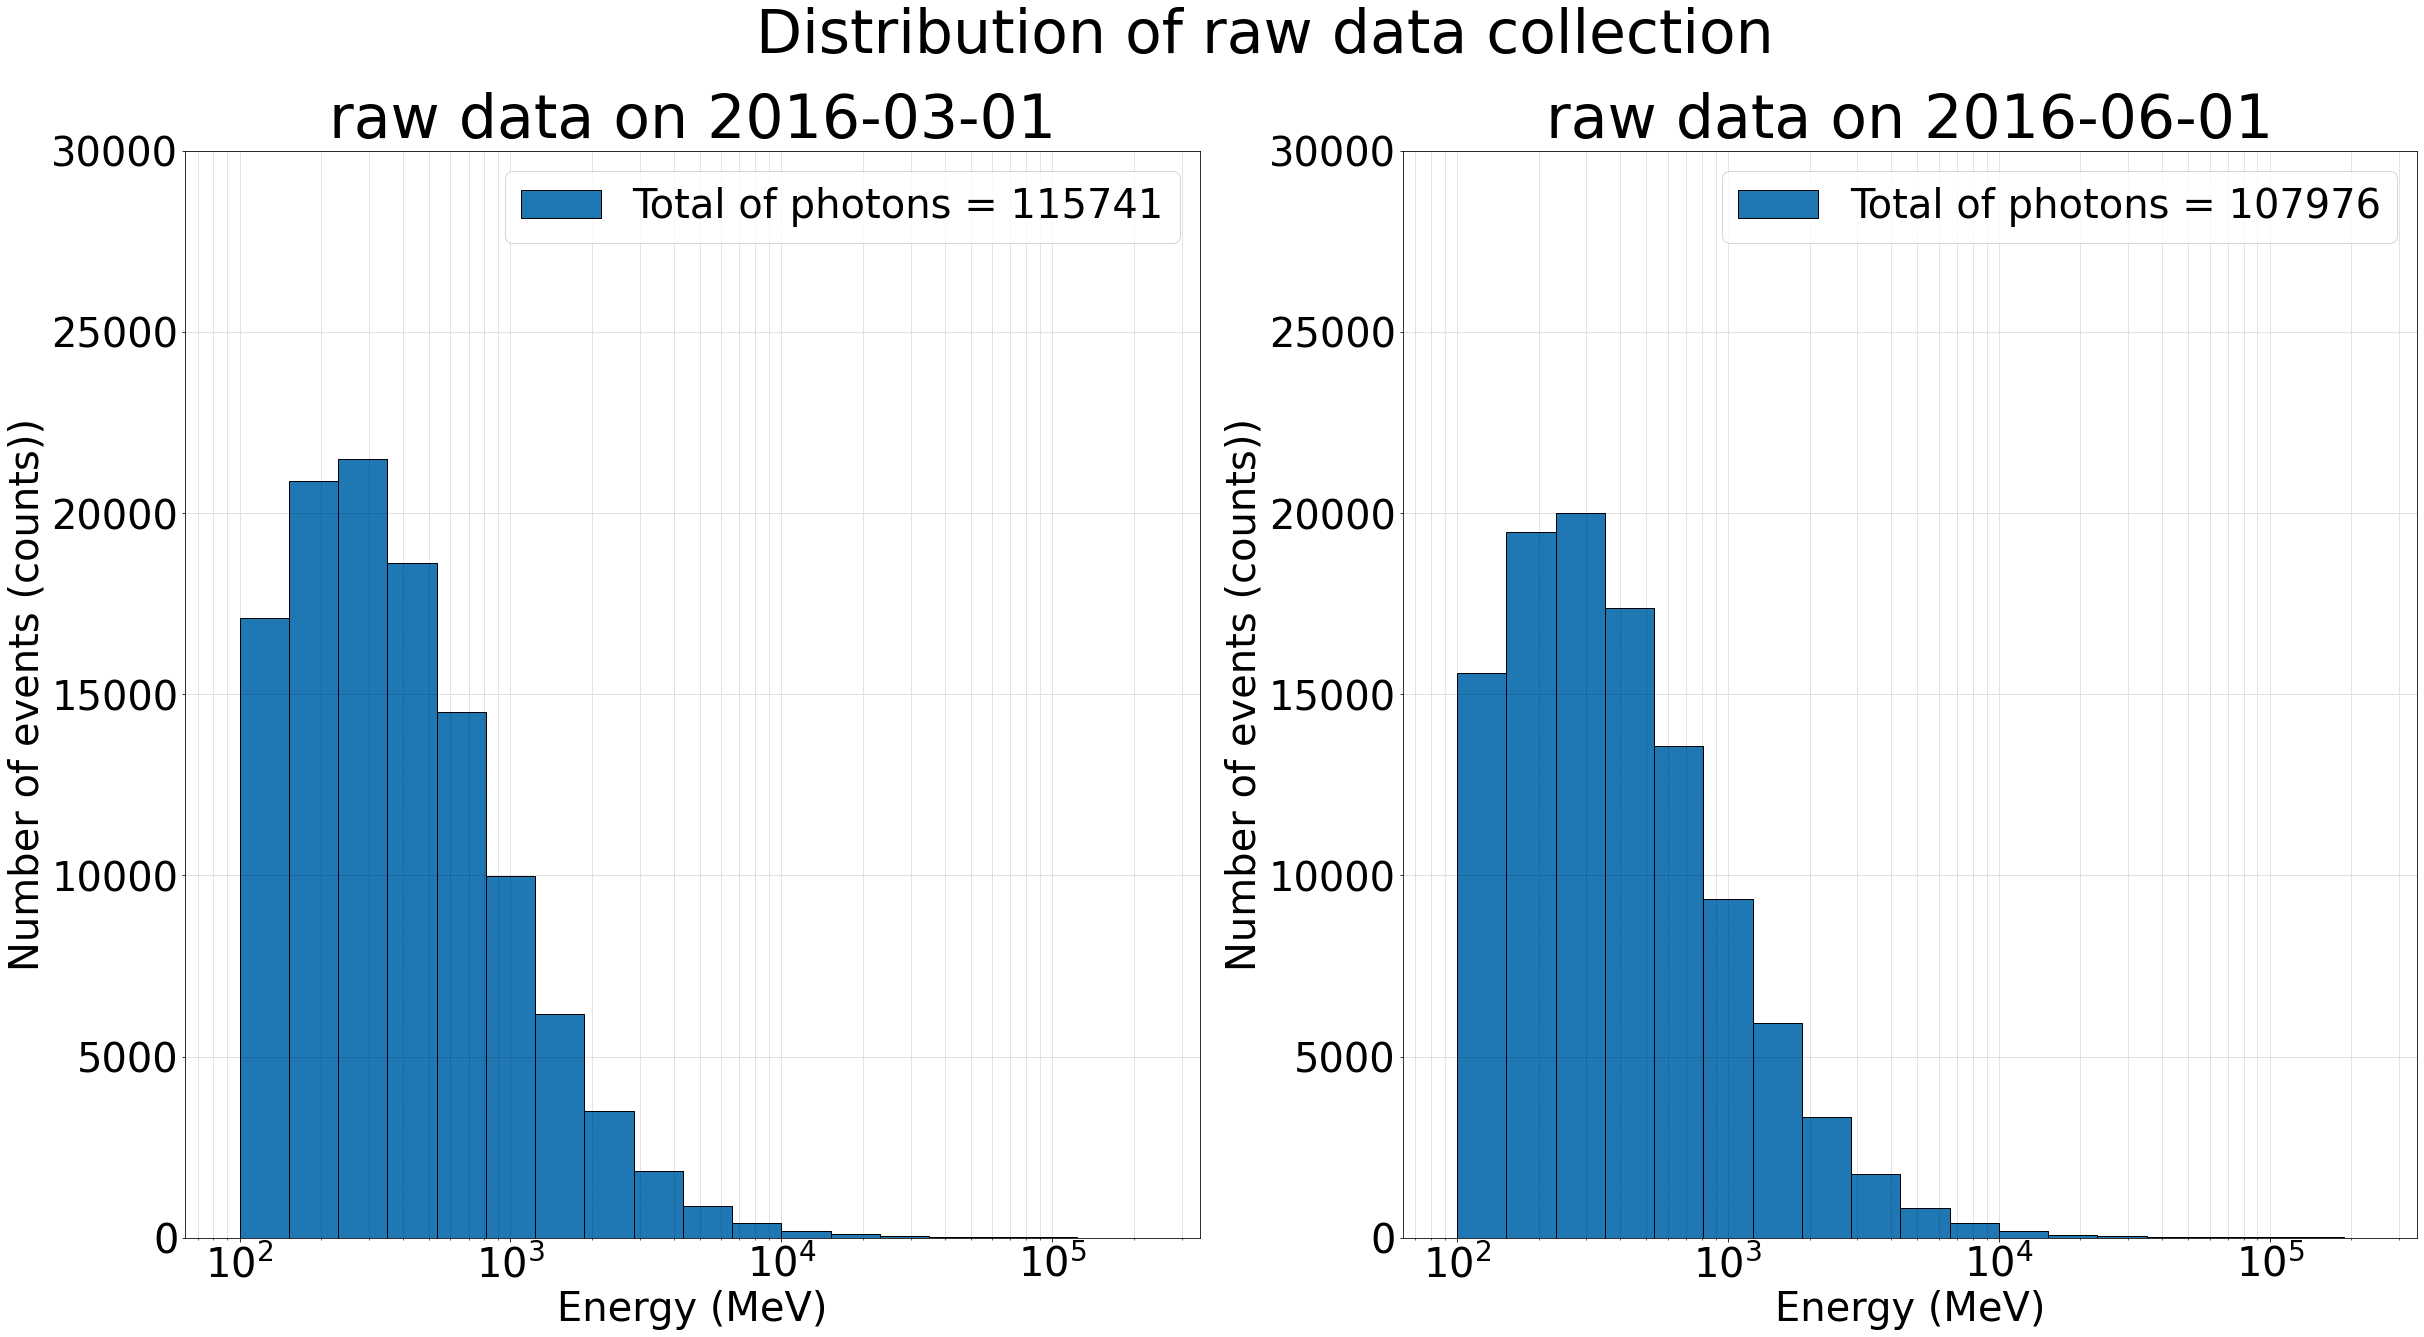

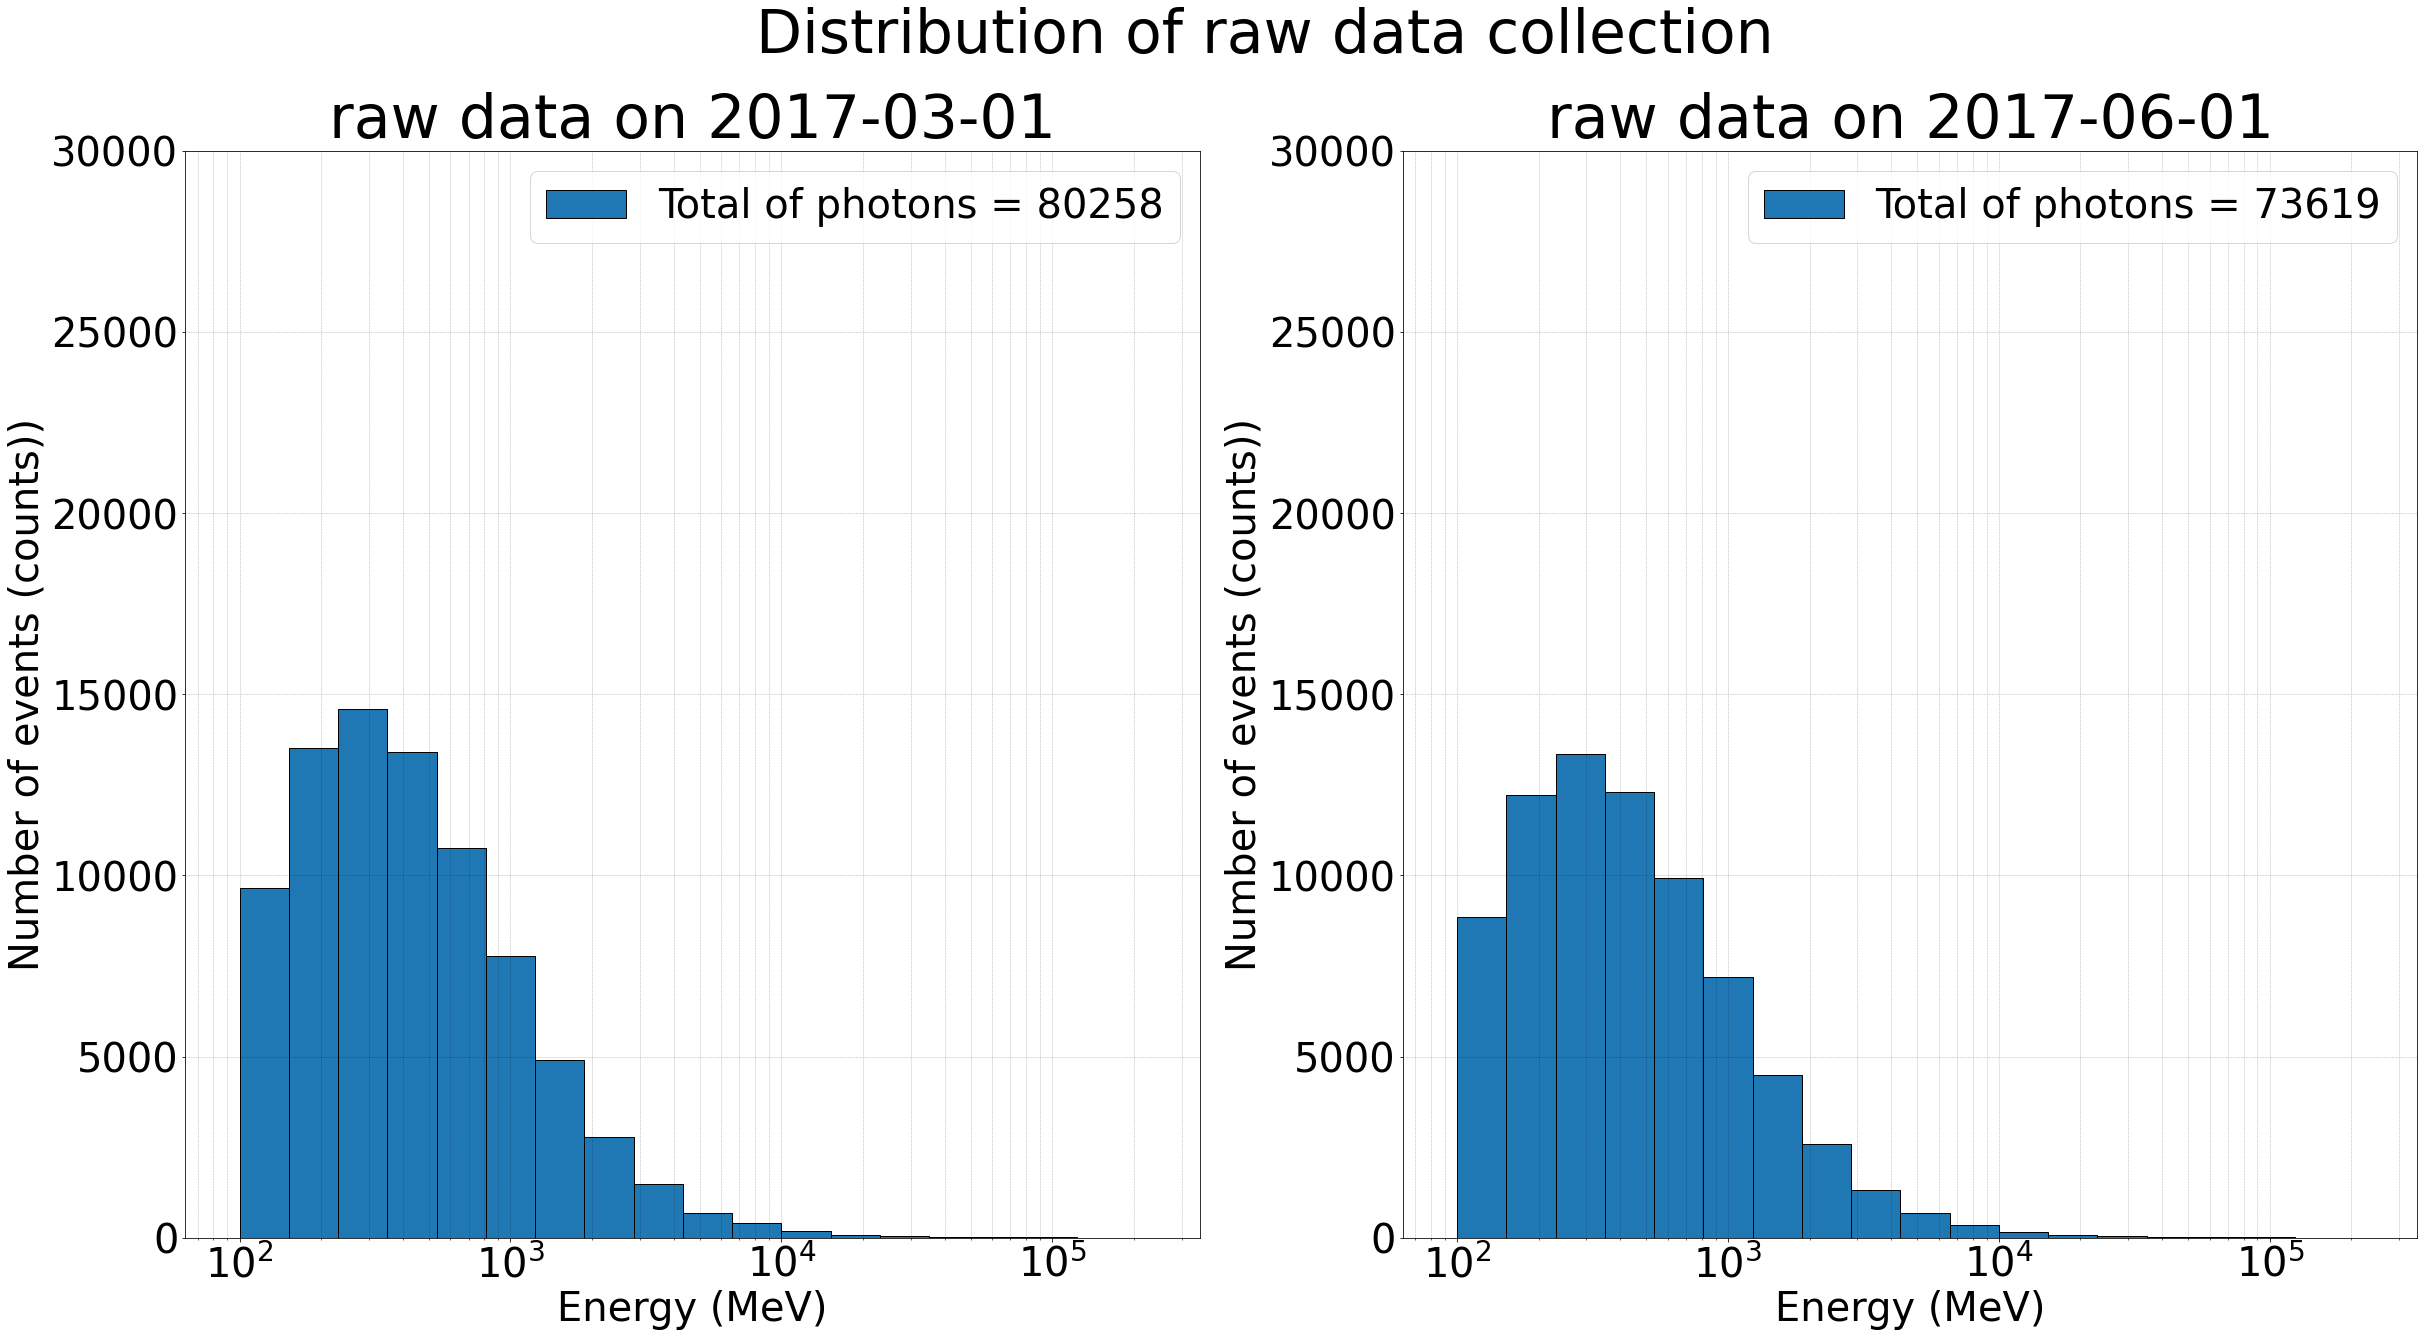

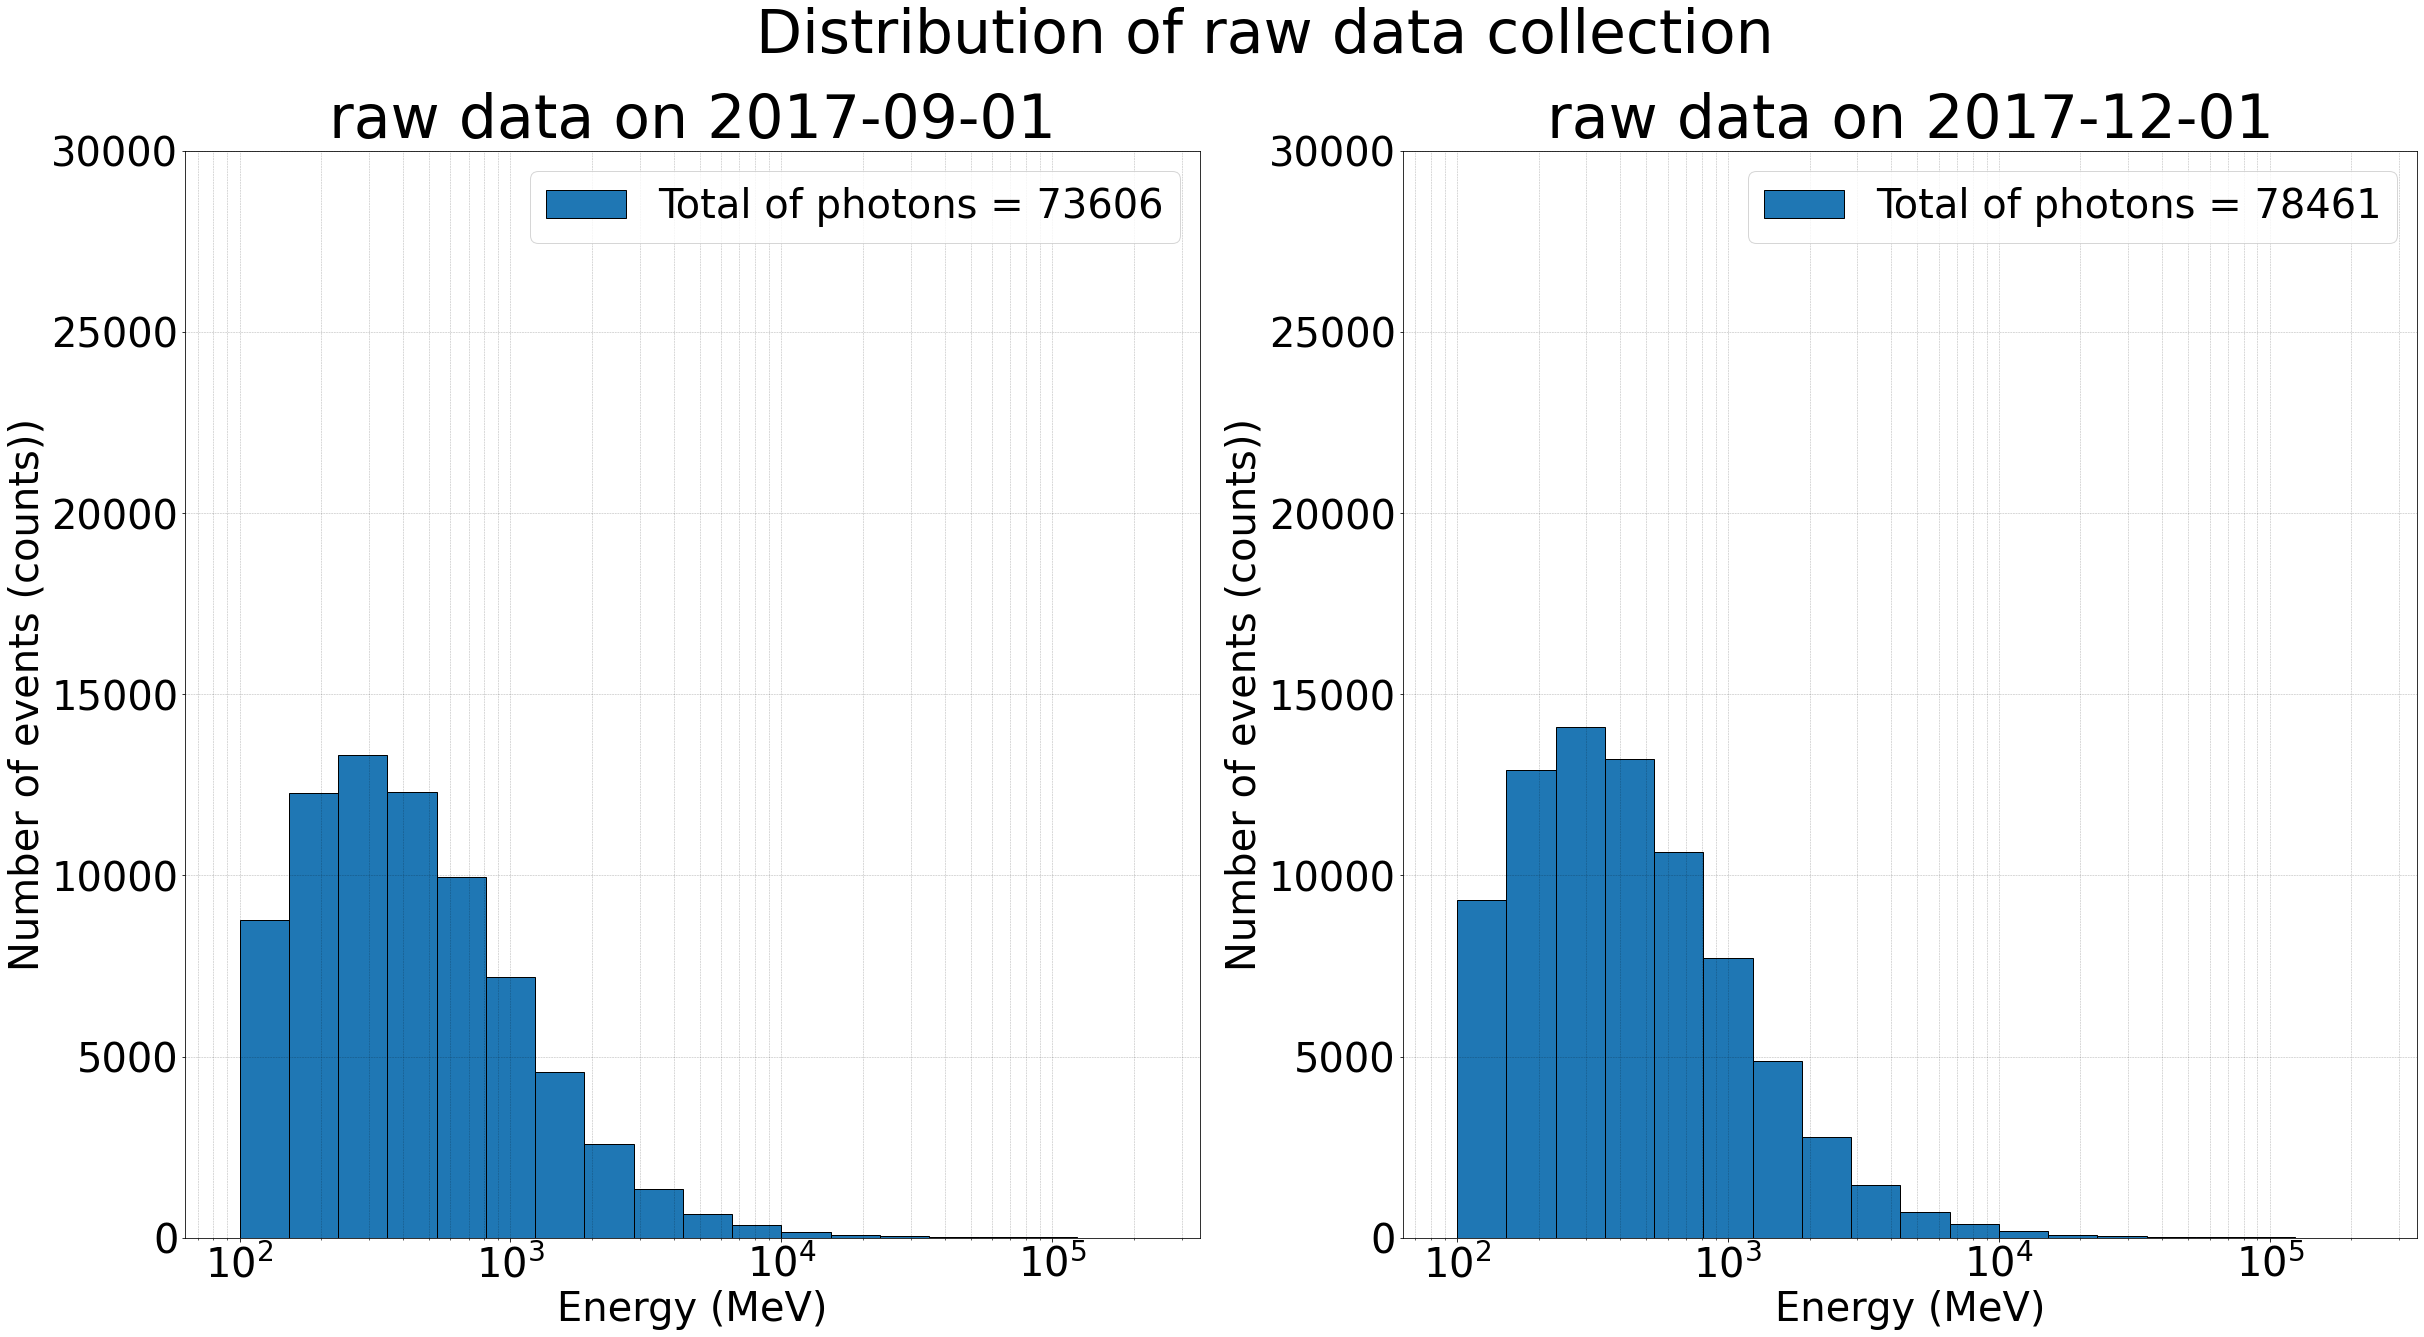

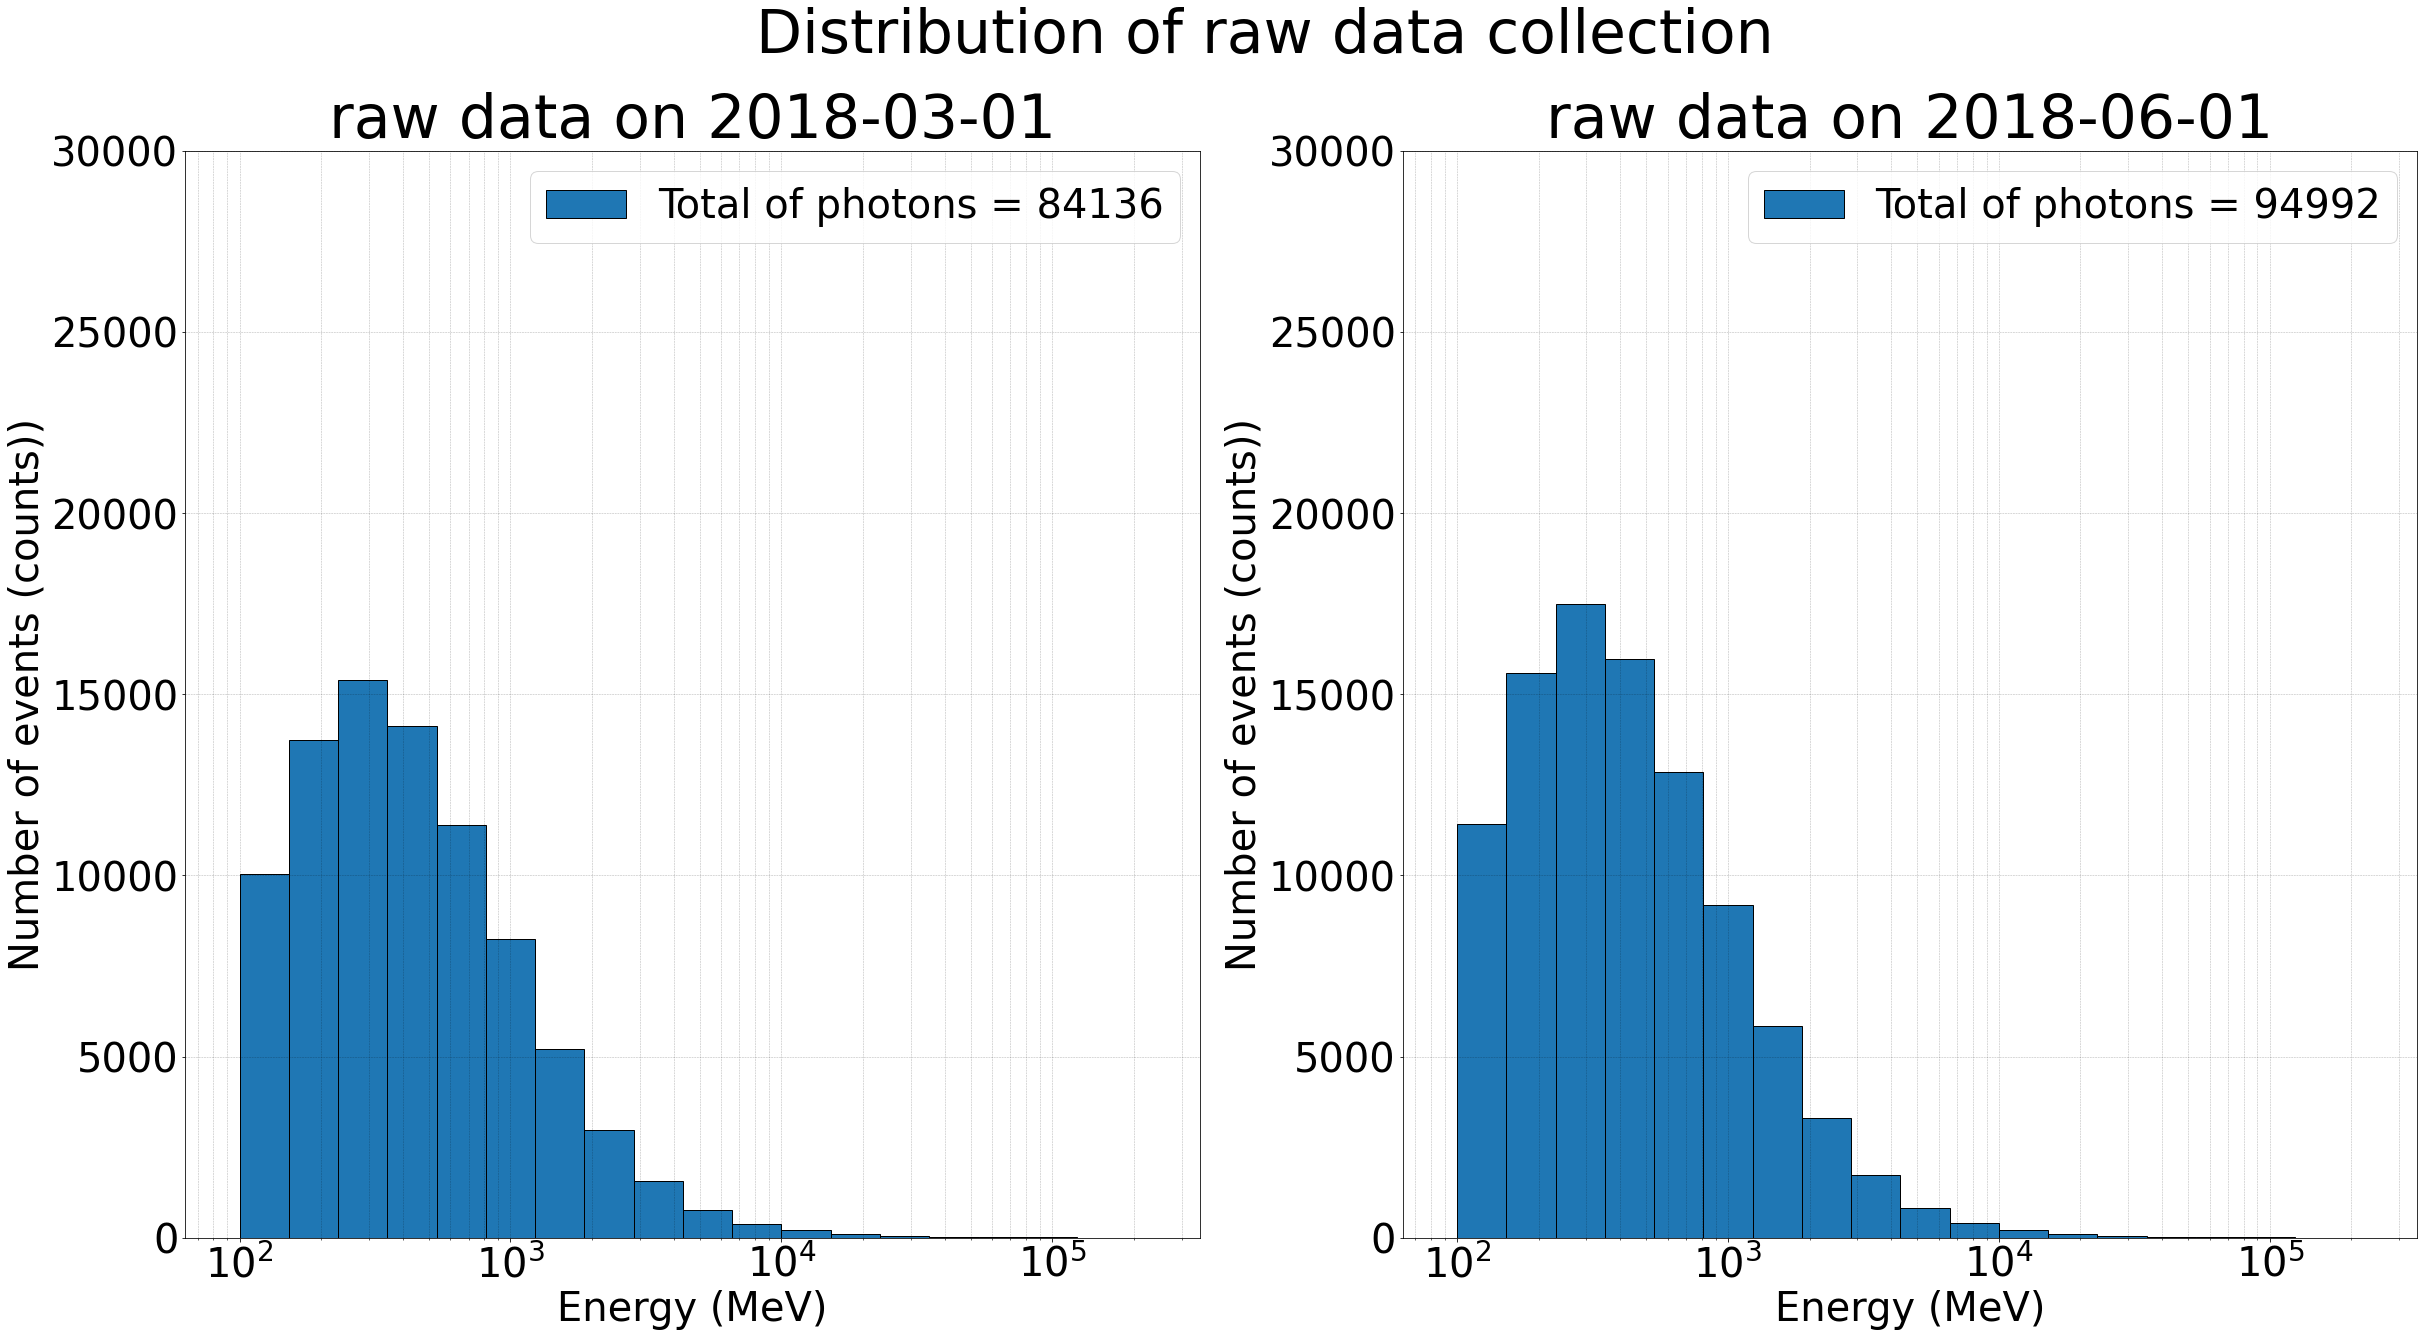

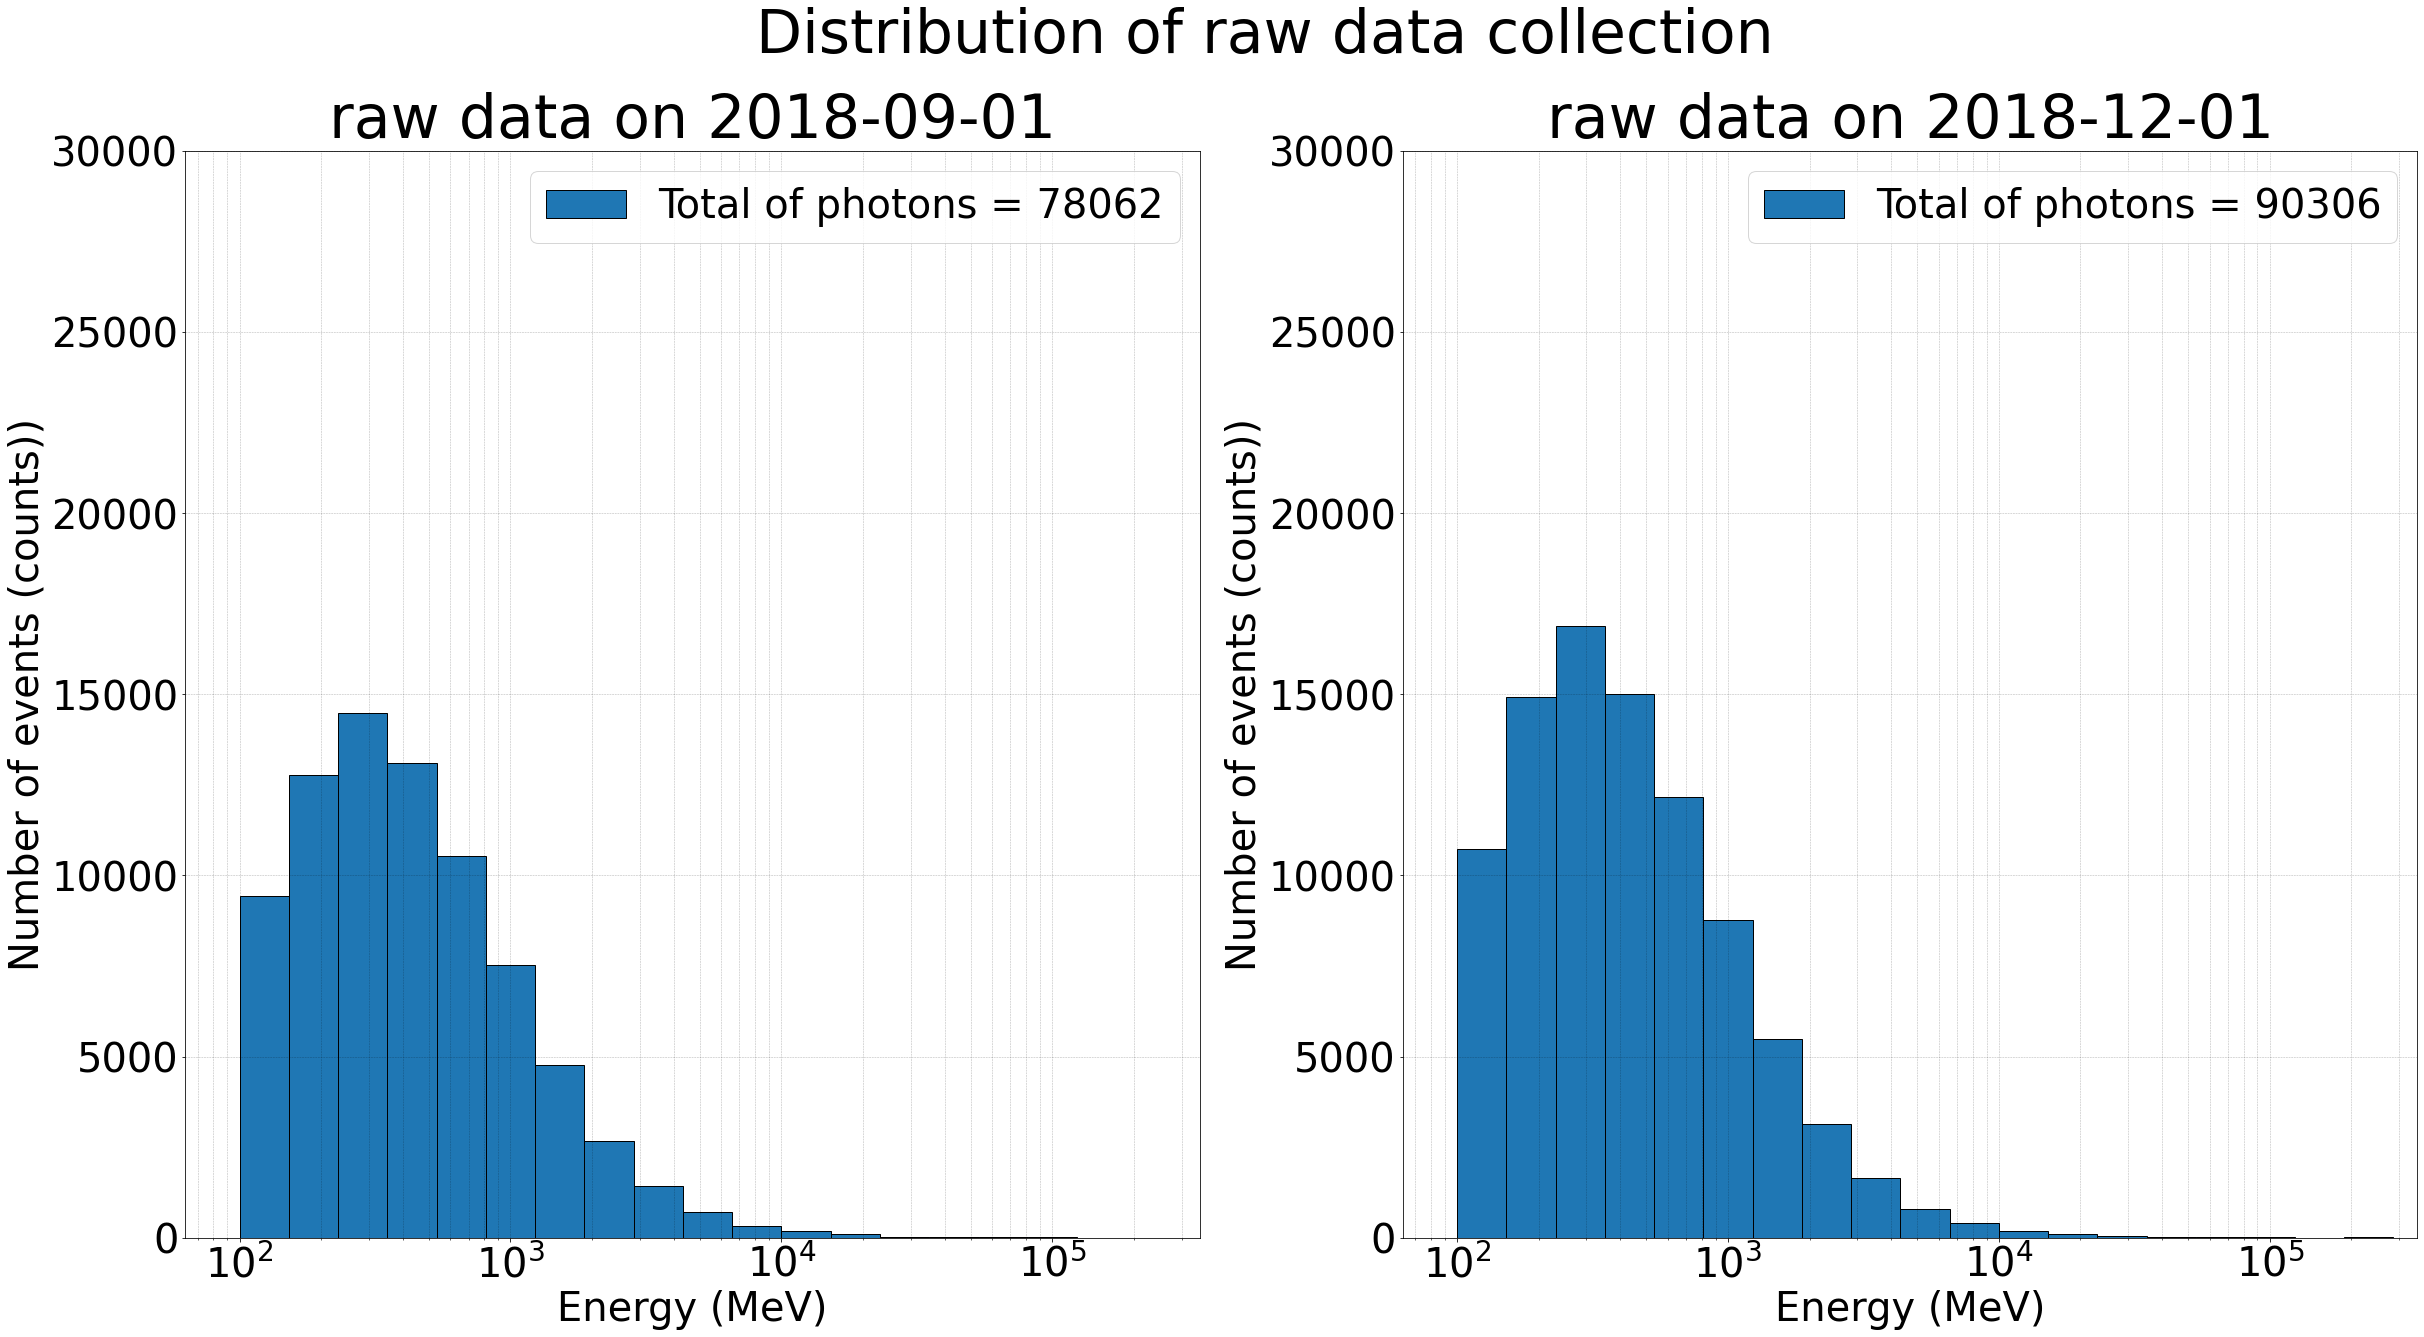

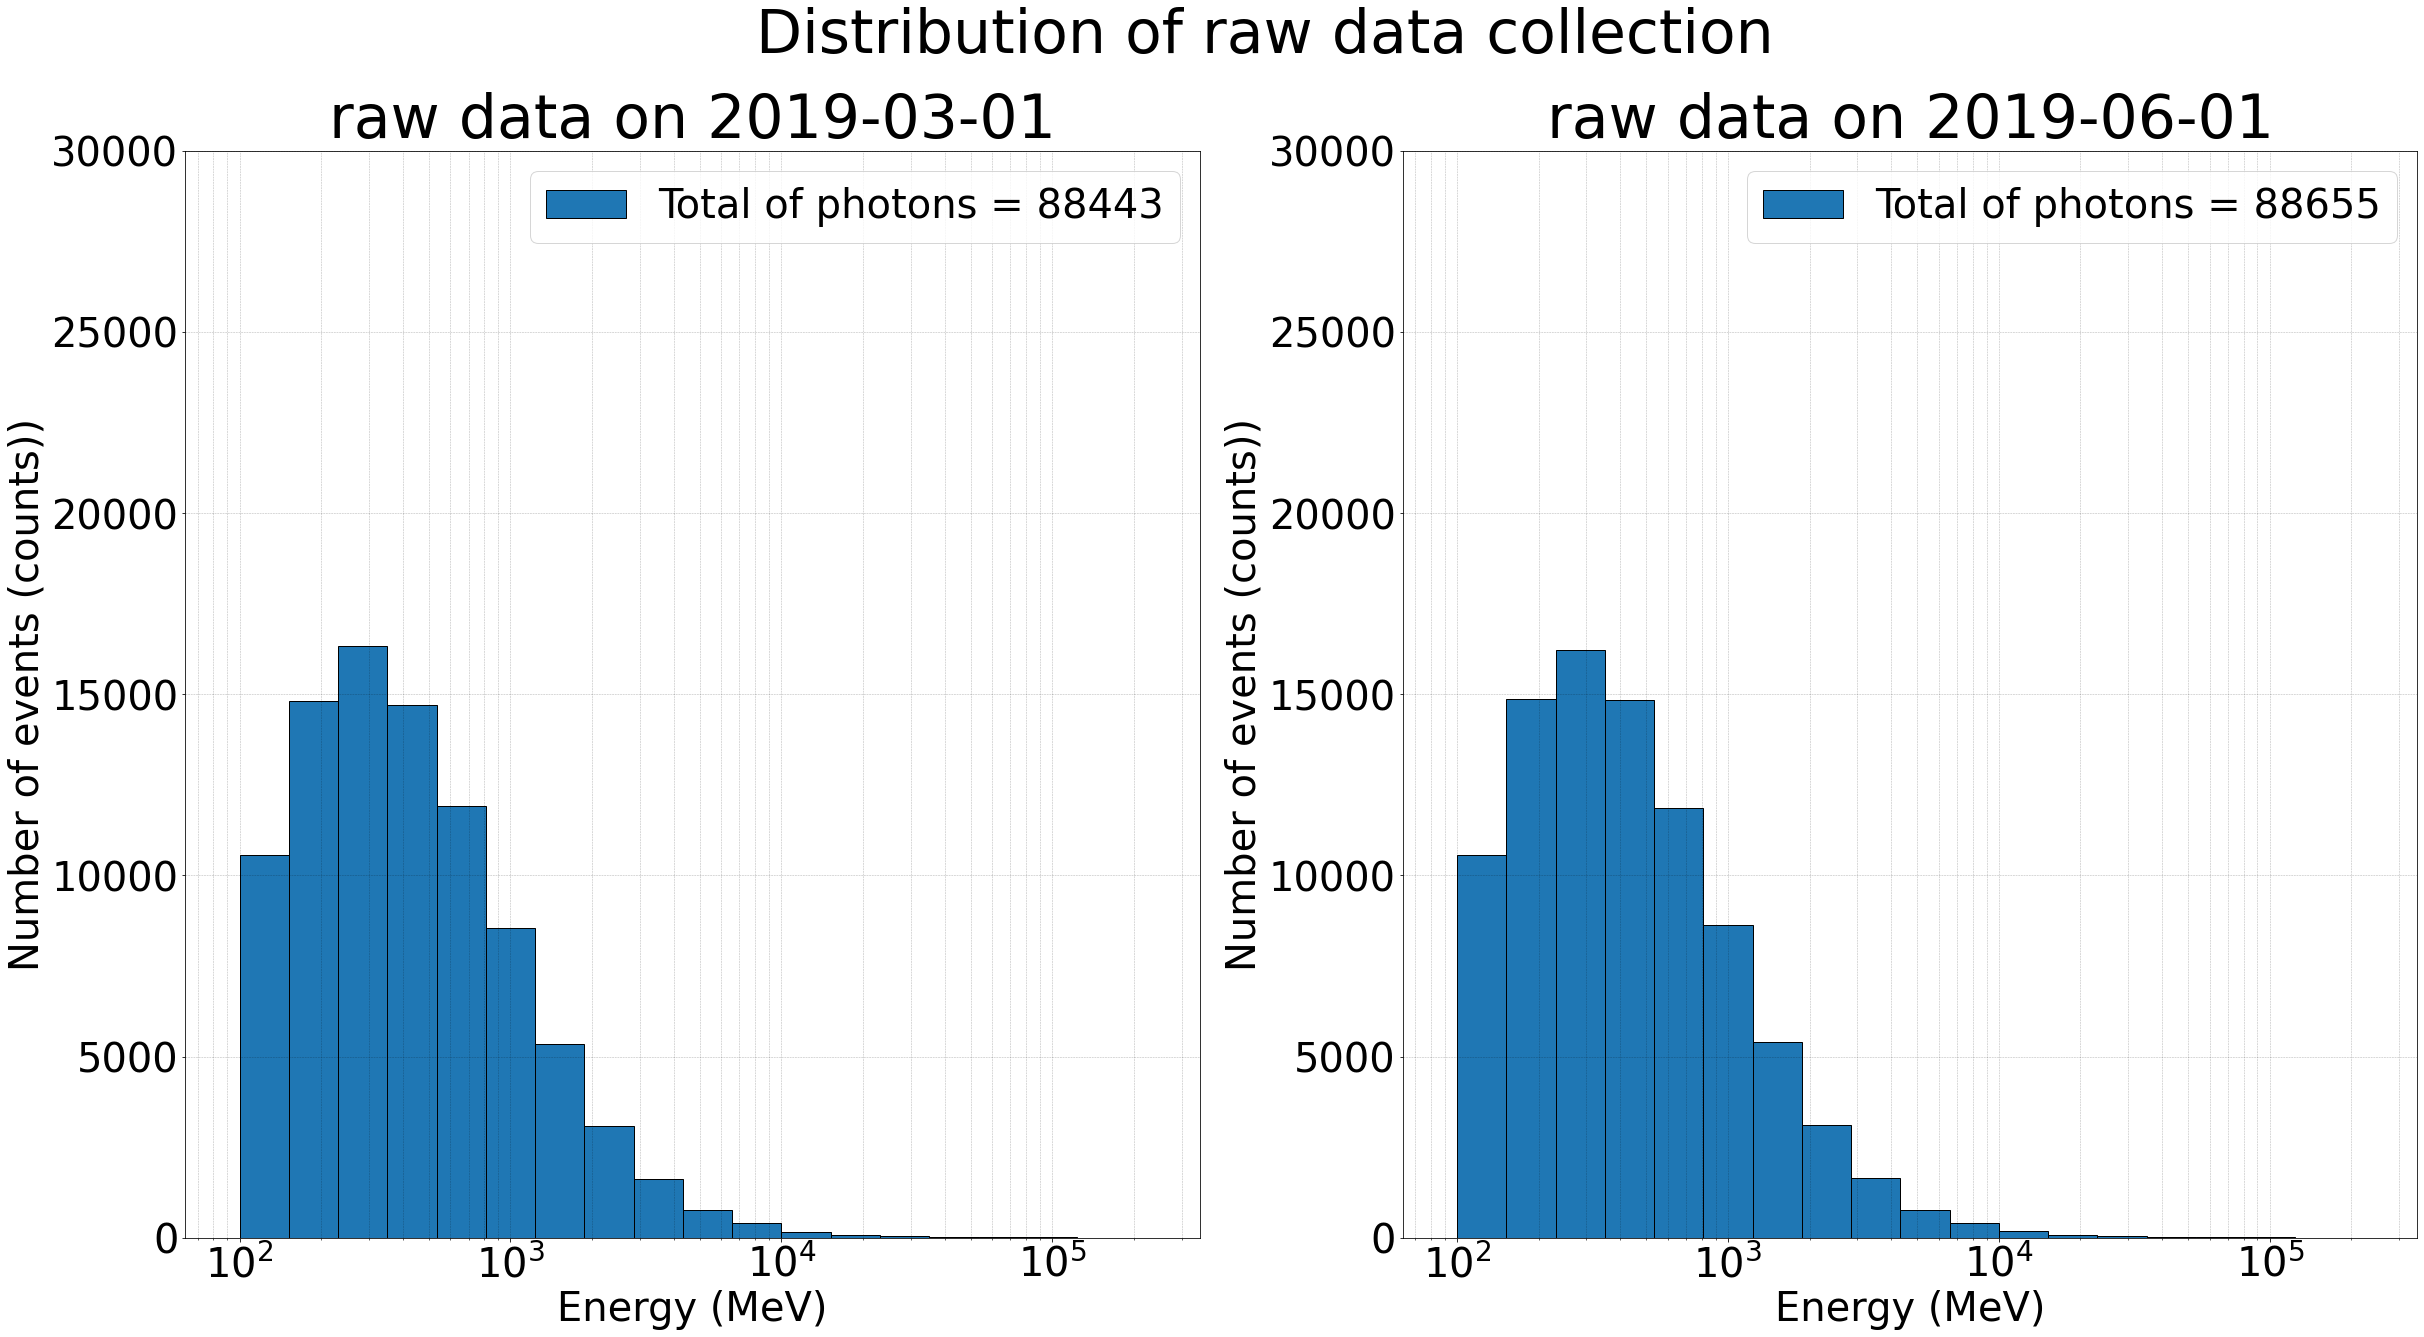

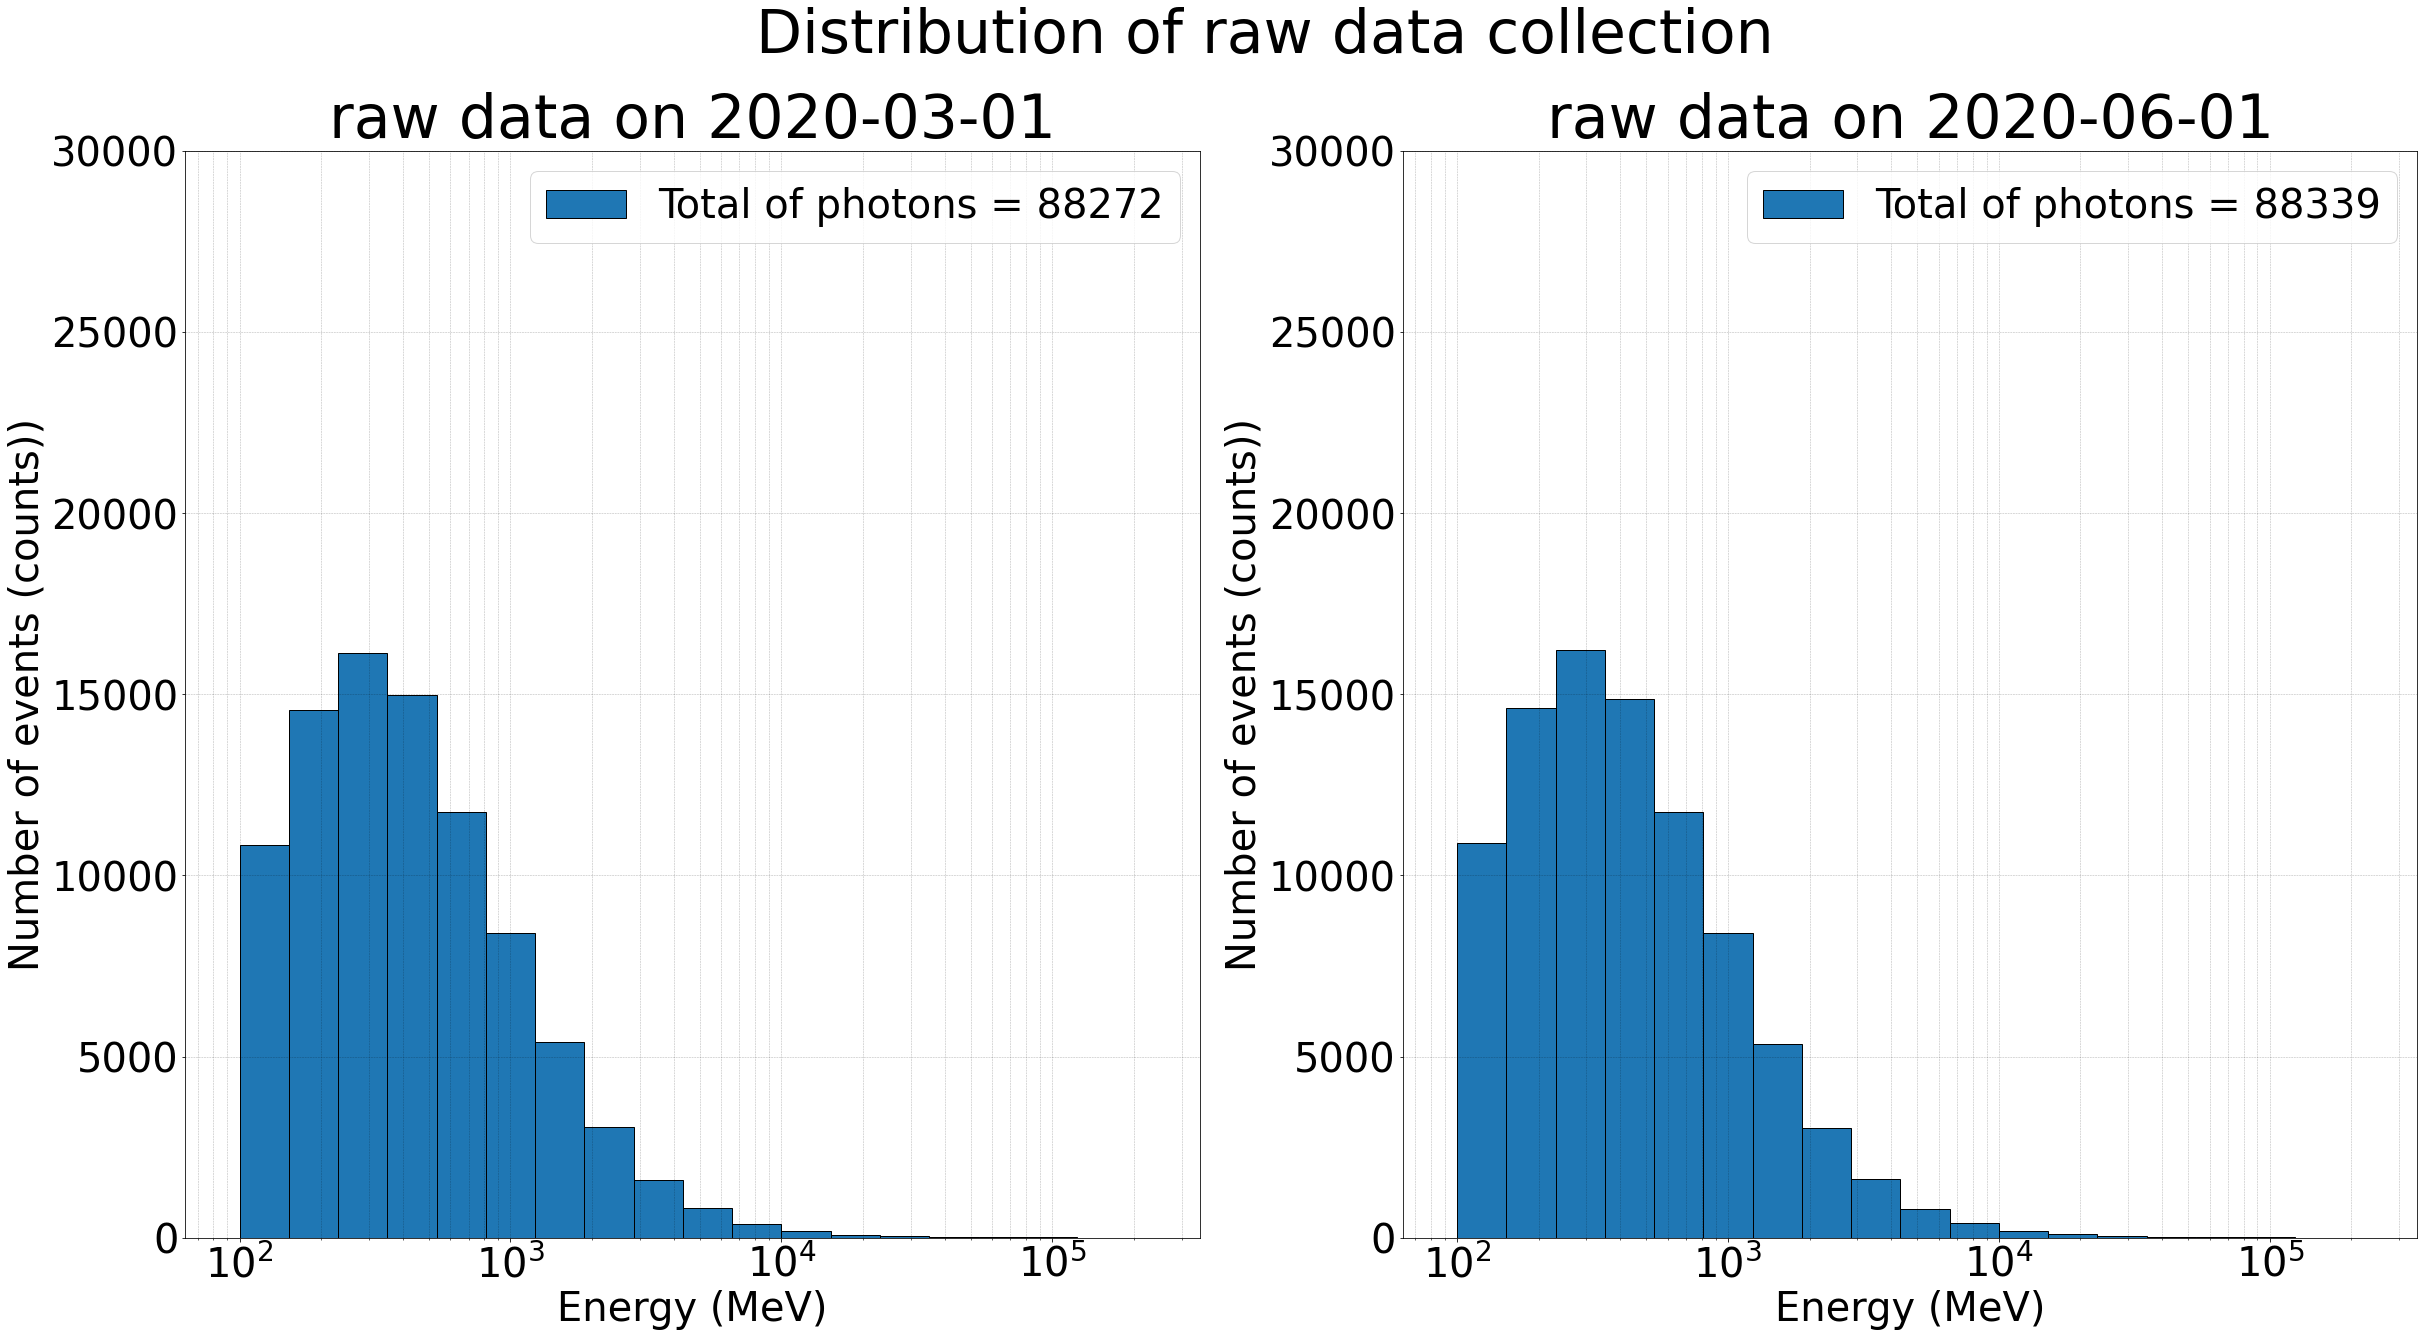

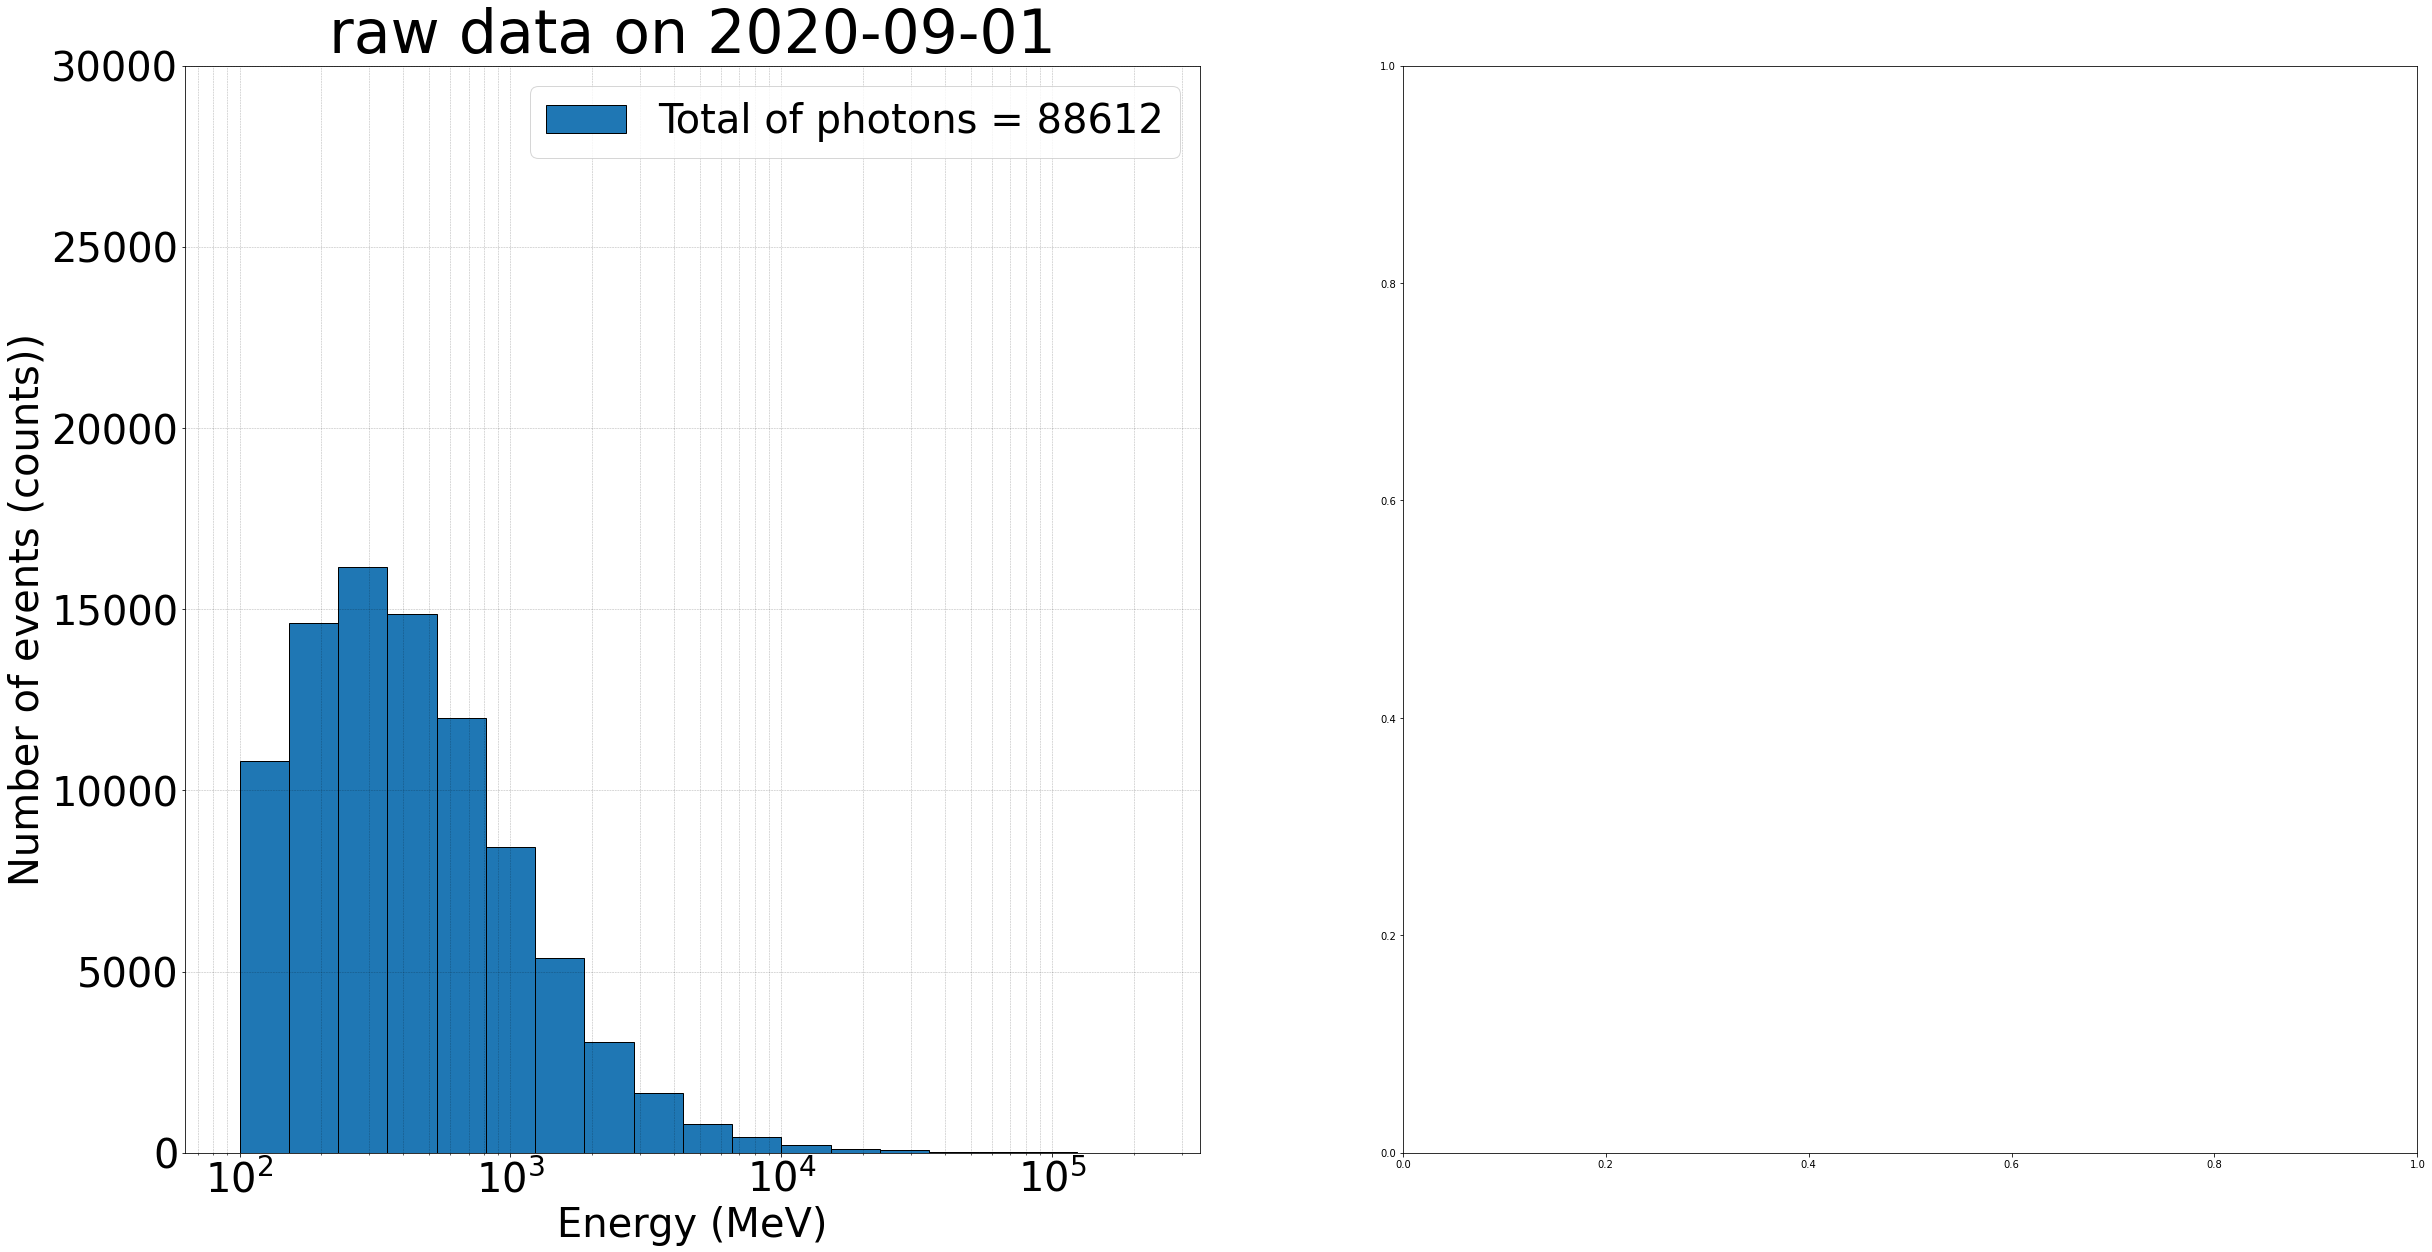

In [40]:
#raw data
for i in range(1,26):
    fig, (ax1, ax) = plt.subplots(1,2,figsize=(40,20))
    bin = np.logspace(np.log10(100),np.log10(1000000), 23)
    exec("ax1.hist(rawz%s, bins = bin,edgecolor='black',label = 'Total of photons = %s')" %(1+(2*(i-1)),N_rawdata[(2*(i-1))]))
    ax1.set_xscale("log") 
    ax1.set_xlim(0,350000)
    ax1.set_ylim(0,30000)
    ax1.set_xlabel("Energy (MeV)",fontsize=40)
    ax1.set_ylabel("Number of events (counts))",fontsize=40)
    ax1.grid(alpha=0.3, which="both", ls="--",color="black",lw =0.5)
    ax1.tick_params(axis="x", labelsize=40)
    ax1.tick_params(axis="y", labelsize=40)
    ax1.legend(loc="upper right",fontsize=40)
    ax1.set_title('raw data on %s'%start[2*(i-1)],fontsize = 60)
    
    exec("ax.hist(rawz%s, bins = bin,edgecolor='black',label = 'Total of photons = %s')" %(2+(2*(i-1)),N_rawdata[1+(2*(i-1))]))
    ax.set_xscale("log") 
    ax.set_xlim(0,350000)
    ax.set_ylim(0,30000)
    ax.set_xlabel("Energy (MeV)",fontsize=40)
    ax.set_ylabel("Number of events (counts))",fontsize=40)
    ax.grid(alpha=0.3, which="both", ls="--",color="black",lw =0.5)
    ax.tick_params(axis="x", labelsize=40)
    ax.tick_params(axis="y", labelsize=40)
    ax.legend(loc="upper right",fontsize=40)
    ax.set_title('raw data on %s' %start[2*(i-1)+1],fontsize = 60)
    fig.suptitle('Distribution of raw data collection',fontsize = 60, horizontalalignment = "center")

    exec("plt.savefig('rawdata_his_map%s.png')" %i)

In [ ]:
#filtered data
for i in range(1,26):
    fig, (ax1, ax) = plt.subplots(1,2,figsize=(40,20))
    bin = np.logspace(np.log10(100),np.log10(1000000), 23)
    exec("ax1.hist(filteredz%s, bins = bin,edgecolor='black',label = 'Total of photons = %s')" %(1+(2*(i-1)),N_filtereddata[(2*(i-1))]))
    ax1.set_xscale("log") 
    ax1.set_xlim(0,350000)
    ax1.set_ylim(0,16000)
    ax1.set_xlabel("Energy (MeV)",fontsize=40)
    ax1.set_ylabel("Number of events (counts))",fontsize=40)
    ax1.grid(alpha=0.3, which="both", ls="--",color="black",lw =0.5)
    ax1.tick_params(axis="x", labelsize=40)
    ax1.tick_params(axis="y", labelsize=40)
    ax1.legend(loc="upper right",fontsize=40)
    ax1.set_title('filtered data on %s'%start[2*(i-1)],fontsize = 60)
    
    exec("ax.hist(filteredz%s, bins = bin ,edgecolor='black',label = 'Total of photons = %s')" %(2+(2*(i-1)),N_filtereddata[1+(2*(i-1))]))
    ax.set_xscale("log") 
    ax.set_xlim(0,350000)
    ax.set_ylim(0,16000)
    ax.set_xlabel("Energy (MeV)",fontsize=40)
    ax.set_ylabel("Number of events (counts))",fontsize=40)
    ax.grid(alpha=0.3, which="both", ls="--",color="black",lw =0.5)
    ax.tick_params(axis="x", labelsize=40)
    ax.tick_params(axis="y", labelsize=40)
    ax.legend(loc="upper right",fontsize=40)
    ax.set_title('filtered data %s' %start[2*(i-1)+1],fontsize = 60)
    fig.suptitle('Distribution of filtered data collection',fontsize = 60, horizontalalignment = "center")


    exec("plt.savefig('filtereddata_his_map%s.png')" %i)

# complete

# complete

In [ ]:
#raw data
for i in range(1,26):
    exec("mean,std=norm.fit(rawz%s)"%(2*(i-1)+1))
    x = np.linspace(0,350000)
    y = norm.pdf(x, mean, std)
    
    fig, (ax1, ax) = plt.subplots(1,2,figsize=(40,20))
    bin = np.logspace(np.log10(100),np.log10(1000000), 50)
    exec("ax1.hist(rawz%s, bins = bin,,edgecolor='black',label='Total number of photons = %s\n $\mu$ = %0.2f\n $\sigma$ = %0.2f' %(N_rawdata[1+(2*(i-1)),2*(i-1)),mean,std))
    ax1.set_xscale("log") 
    ax1.set_xlim(0,350000)
    ax1.set_ylim(0,11000)
    ax1.set_xlabel("Energy (MeV)",fontsize=40)
    ax1.set_ylabel("Number of events (counts))",fontsize=40)
    ax1.grid(True, which="both", ls="--",color="black",lw =0.5)
    ax1.tick_params(axis="x", labelsize=40)
    ax1.tick_params(axis="y", labelsize=40)
    ax1.legend(loc="upper right",fontsize=40)
    ax1.set_title('raw data on %s'%start[2*(i-1)],fontsize = 60)
    
    exec("ax.hist(rawz%s, bins = bin,label = N_rawdata[%s])" %(2+(2*(i-1)),1+ 2*(i-1)))
    ax.set_xscale("log") 
    ax.set_xlim(0,350000)
    ax.set_ylim(0,11000)
    ax.set_xlabel("Energy (MeV)",fontsize=40)
    ax.set_ylabel("Number of events (counts))",fontsize=40)
    ax.grid(True, which="both", ls="--",color="black",lw =0.5)
    ax.tick_params(axis="x", labelsize=40)
    ax.tick_params(axis="y", labelsize=40)
    ax.legend(loc="upper right",fontsize=40)
    ax.set_title('raw data on %s' %start[2*(i-1)+1],fontsize = 60)
    fig.suptitle('Distribution of raw data collection',fontsize = 60, horizontalalignment = "center")


#    exec("plt.savefig('rawdata_his_map%s.png')" %i)


In [ ]:
#raw data
for i in range(1,2):
    exec("mean,std=norm.fit(rawz%s)"%(2*(i-1)+1))
    x = np.linspace(0,350000)
    y = norm.pdf(x, mean, std)
    fig, (ax1, ax) = plt.subplots(1,2,figsize=(40,20))
    bin = np.logspace(np.log10(100),np.log10(1000000), 50)
    exec("ax1.hist(rawz%s, bins = bin,label = N_rawdata[%s],density=True,edgecolor='black')" %(1+(2*(i-1)),2*(i-1)))
    exec('ax1.plot(x, y,label="$\mu$ = %s\n $\sigma$ = %s")' %(mean,std))
    ax1.set_xscale("log") 
    ax1.set_xlim(0,350000)
#    ax1.set_ylim(0,55)
    ax1.set_xlabel("Energy (MeV)",fontsize=40)
    ax1.set_ylabel("Number of events (counts))",fontsize=40)
    ax1.grid(True, which="both", ls="--",color="black",lw =0.5)
    ax1.tick_params(axis="x", labelsize=40)
    ax1.tick_params(axis="y", labelsize=40)
    ax1.legend(loc="upper right",fontsize=40)
    ax1.set_title('raw data on %s'%start[2*(i-1)],fontsize = 60)
         
    exec("mean,std=norm.fit(rawz%s)"%(2*(i-1)+2))
    y = norm.pdf(x, mean, std)
    exec("ax.hist(rawz%s, bins = bin,density=True,edgecolor='black',label = N_rawdata[%s])" %(2+(2*(i-1)),1+ 2*(i-1)))
    exec("ax.plot(x, y,label='%s,%s')" %(mean,std))
    ax.set_xscale("log") 
    ax.set_xlim(0,350000)
#    ax.set_ylim(0,55)
    ax.set_xlabel("Energy (MeV)",fontsize=40)
    ax.set_ylabel("Number of events (counts))",fontsize=40)
    ax.grid(True, which="both", ls="--",color="black",lw =0.5)
    ax.tick_params(axis="x", labelsize=40)
    ax.tick_params(axis="y", labelsize=40)
    ax.legend(loc="upper right",fontsize=40)
    ax.set_title('raw data on %s' %start[2*(i-1)+1],fontsize = 60)
    fig.suptitle('Distribution of raw data collection',fontsize = 60, horizontalalignment = "center")


#    exec("plt.savefig('rawdata_his_map%s.png')" %i)


In [ ]:
#raw data
for i in range(1,32):
    fig, (ax1, ax) = plt.subplots(1,2,figsize=(40,20))
    bin = np.logspace(np.log10(100),np.log10(1000000), 50)
    exec("ax1.hist(z%s, bins = bin,label = N_filtereddata[%s])" %(i,i-1))
    ax1.set_xscale("log") 
    ax1.set_xlim(0,350000)
    ax1.set_ylim(0,35)
    ax1.set_xlabel("Energy (MeV)",fontsize=40)
    ax1.set_ylabel("Number of events (counts))",fontsize=40)
    ax1.grid(True, which="both", ls="--",color="black",lw =0.5)
    ax1.tick_params(axis="x", labelsize=40)
    ax1.tick_params(axis="y", labelsize=40)
    ax1.legend(loc="upper right",fontsize=40)
    ax1.set_title('Distribution of filtered data collection',fontsize = 60)

    bin = 50
    exec("count, xedges, yedges = np.histogram2d(x%s, y%s, bins = bin)" %(i,i))
    count = ax.imshow(count.T, origin='lower',  cmap='inferno',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],vmin=0,vmax=5)
    ax.scatter((new_t['GLON'] +180)%360 - 180, new_t['GLAT'],edgecolor = 'white' , s=700 , facecolor='none')
    for j, txt in enumerate(new_t['Source_Name']):           
        ax.annotate(txt, (new_t['GLON'][j]+0.35, new_t['GLAT'][j]+0.05),fontsize=15,color='white')
    cbar = fig.colorbar(count, ax=ax,ticks=np.arange(0,6,1))
    cbar.set_label("counts in bins ( counts )",fontsize=50) 
    cbar.ax.tick_params(labelsize=40) 
    ax.set_title('Count of photons in a day',fontsize = 60)
    fig.suptitle('filtered data on %s'  %D_rawdata[i-1] ,fontsize = 60, horizontalalignment = "center")
    ax.set_xlabel("Galactic Longitude (deg)",fontsize=40)
    ax.set_ylabel("Galactic Latitude (deg)",fontsize=40)
    ax.set_xlim(53.5+3, 53.5-3)
    ax.set_ylim(0.3-3, 0.3+3)
    ax.grid(alpha=0.5)
    ax.tick_params(axis="x", labelsize=40)
    ax.tick_params(axis="y", labelsize=40)
    exec("plt.savefig('filtered_data_his_map%s.png')" %i)


In [ ]:
from scipy.stats import norm

mean,std=norm.fit(z3)

x = np.linspace(100, 250, 2)
y = norm.pdf(x, mean, std)
plt.plot(x, y, label="$\mu$ = %0.2e\n $\sigma$ = %0.2e" % (mean, std), color='orange')

In [ ]:
mean, var, skew, kurt = norm.stats(moments='mvsk')
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
plt.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
rv = norm()
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
r = norm.rvs(size=1000)
#plt.hist(z2)
plt.hist(z13, density=True, histtype='stepfilled', alpha=0.2)
plt.legend(loc='best', frameon=False)
plt.xlim(0,4)
plt.show()

In [ ]:
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')

In [ ]:
mean,std=norm.fit(z1)

x = np.linspace(0, 1000, 2)
y = norm.pdf(x, std, mean)
plt.plot(x, y, label="$\mu$ = %0.2e\n $\sigma$ = %0.2e" % (mean, std), color='orange')

In [49]:
plt.plot(x,y)

In [47]:
z1

array([ 144.97873 ,  560.652   ,  119.38184 ,  103.46217 ,  275.7891  ,
       1605.3563  ,  168.36273 ,  372.96817 ,  147.79526 ,  139.35043 ,
        290.81073 ,  454.3052  ,  107.811005,  183.01239 ,  236.98866 ,
        676.2594  ,  254.94305 ,  890.56335 ,  657.4601  , 1767.0233  ,
        608.0484  ,  185.1111  ,  788.1335  , 2412.861   ,  421.6249  ,
       1917.4524  ,  241.60379 ,  487.59448 ,  558.5317  ,  206.89299 ,
        592.99243 ,  197.53654 ,  662.55975 ,  963.4103  ,  412.81317 ,
        486.27203 ,  348.86606 ,  422.424   ,  951.18335 ,  510.89822 ,
        218.6181  ,  328.7797  ,  320.06323 , 1328.5863  ,  275.2947  ,
        705.9798  ,  332.24405 ,  794.85205 ,  159.15442 ,  243.12718 ,
        442.98663 ,  535.27594 ,  103.84506 ,  570.8241  ,  125.92741 ,
        367.977   ,  159.39302 ,  563.23975 , 2507.7727  ,  709.02234 ,
        909.88153 , 2405.628   ,  897.30444 , 1672.8193  ,  138.92438 ,
        211.73021 ,  152.58356 ,  126.44306 ,  145.01009 ,  253.